In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "house-prices-advanced-regression-techniques"

In [2]:
library(ggplot2)
library(moments)

In [3]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# ANALYSE EXPLORATOIRE

## 1. Chargement des données

In [4]:
train <- read.csv("../input/house-prices-advanced-regression-techniques/train.csv", stringsAsFactors = F)
test <- read.csv("../input/house-prices-advanced-regression-techniques/test.csv", stringsAsFactors = F)

In [5]:
dim(train)

[1] 1460   81

In [6]:
dim(test)

[1] 1459   80

In [7]:
print(names(train))

 [1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "X1stFlrSF"    
[45] "X2ndFlrSF"     "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"

In [8]:
head(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [9]:
test$SalePrice <- NA

In [10]:
data <- rbind(train, test)

In [11]:
dim(data)

[1] 2919   81

In [12]:
str(data)

'data.frame':	2919 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  NA NA NA NA ...
 $ LotShape     : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "2Story" "1Story" "2Story" "2Story" ...


In [13]:
summary(data)

       Id           MSSubClass       MSZoning          LotFrontage    
 Min.   :   1.0   Min.   : 20.00   Length:2919        Min.   : 21.00  
 1st Qu.: 730.5   1st Qu.: 20.00   Class :character   1st Qu.: 59.00  
 Median :1460.0   Median : 50.00   Mode  :character   Median : 68.00  
 Mean   :1460.0   Mean   : 57.14                      Mean   : 69.31  
 3rd Qu.:2189.5   3rd Qu.: 70.00                      3rd Qu.: 80.00  
 Max.   :2919.0   Max.   :190.00                      Max.   :313.00  
                                                      NA's   :486     
    LotArea          Street             Alley             LotShape        
 Min.   :  1300   Length:2919        Length:2919        Length:2919       
 1st Qu.:  7478   Class :character   Class :character   Class :character  
 Median :  9453   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 10168                                                           
 3rd Qu.: 11570                                          

In [14]:
numericVars <- names(which(sapply(data, is.numeric)))
cat('Il y a', length(numericVars), 'varaibales numériques')

#Variables quaalitatives à valeurs numériques
qualNames <- c('MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 
            'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold')

quantVars <- names(which(sapply(data[ , !names(data) %in% qualNames], is.numeric)))
cat('\n\nIl y a', length(quantVars), 'variables quantitatives\n')
print(quantVars)

Il y a 38 varaibales numériques

Il y a 30 variables quantitatives
 [1] "Id"            "LotFrontage"   "LotArea"       "MasVnrArea"   
 [5] "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"  
 [9] "X1stFlrSF"     "X2ndFlrSF"     "LowQualFinSF"  "GrLivArea"    
[13] "BsmtFullBath"  "BsmtHalfBath"  "FullBath"      "HalfBath"     
[17] "BedroomAbvGr"  "KitchenAbvGr"  "TotRmsAbvGrd"  "Fireplaces"   
[21] "GarageCars"    "GarageArea"    "WoodDeckSF"    "OpenPorchSF"  
[25] "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"   "PoolArea"     
[29] "MiscVal"       "SalePrice"    


In [15]:
categoricalVars <- names(which(sapply(data, is.character)))
cat('Il y a', length(categoricalVars), 'variabales textuelles\n')

qualVars <- names(data[ , !names(data) %in% quantVars])
cat('\n\nIl y a', length(qualVars), 'variabales catégorielles, qualitatives\n')
print(qualVars)

Il y a 43 variabales textuelles


Il y a 51 variabales catégorielles, qualitatives
 [1] "MSSubClass"    "MSZoning"      "Street"        "Alley"        
 [5] "LotShape"      "LandContour"   "Utilities"     "LotConfig"    
 [9] "LandSlope"     "Neighborhood"  "Condition1"    "Condition2"   
[13] "BldgType"      "HouseStyle"    "OverallQual"   "OverallCond"  
[17] "YearBuilt"     "YearRemodAdd"  "RoofStyle"     "RoofMatl"     
[21] "Exterior1st"   "Exterior2nd"   "MasVnrType"    "ExterQual"    
[25] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[29] "BsmtExposure"  "BsmtFinType1"  "BsmtFinType2"  "Heating"      
[33] "HeatingQC"     "CentralAir"    "Electrical"    "KitchenQual"  
[37] "Functional"    "FireplaceQu"   "GarageType"    "GarageYrBlt"  
[41] "GarageFinish"  "GarageQual"    "GarageCond"    "PavedDrive"   
[45] "PoolQC"        "Fence"         "MiscFeature"   "MoSold"       
[49] "YrSold"        "SaleType"      "SaleCondition"


In [16]:
cat('Nombre de modalités par variable qualitative\n\n')
print(sapply(data[qualVars], function(x) length(unique(x))))

Nombre de modalités par variable qualitative

   MSSubClass      MSZoning        Street         Alley      LotShape 
           16             6             2             3             4 
  LandContour     Utilities     LotConfig     LandSlope  Neighborhood 
            4             3             5             3            25 
   Condition1    Condition2      BldgType    HouseStyle   OverallQual 
            9             8             5             8            10 
  OverallCond     YearBuilt  YearRemodAdd     RoofStyle      RoofMatl 
            9           118            61             6             8 
  Exterior1st   Exterior2nd    MasVnrType     ExterQual     ExterCond 
           16            17             5             4             5 
   Foundation      BsmtQual      BsmtCond  BsmtExposure  BsmtFinType1 
            6             5             5             5             7 
 BsmtFinType2       Heating     HeatingQC    CentralAir    Electrical 
            7             6    

In [17]:
cat("Nombre de modalités de chaque variable qualitatives avec l'occurence de chacune d'elle \n\n")
for (i in 1:length(qualVars)){
    print(qualVars[i])
    cat('\n',qualVars[i], ':', nrow(unique(data[qualVars[i]])) , 'modalités')
    print(table(data[qualVars[i]],  useNA = "ifany"))
    cat("\n")
}

Nombre de modalités de chaque variable qualitatives avec l'occurence de chacune d'elle 

[1] "MSSubClass"

 MSSubClass : 16 modalités
  20   30   40   45   50   60   70   75   80   85   90  120  150  160  180  190 
1079  139    6   18  287  575  128   23  118   48  109  182    1  128   17   61 

[1] "MSZoning"

 MSZoning : 6 modalités
C (all)      FV      RH      RL      RM    <NA> 
     25     139      26    2265     460       4 

[1] "Street"

 Street : 2 modalités
Grvl Pave 
  12 2907 

[1] "Alley"

 Alley : 3 modalités
Grvl Pave <NA> 
 120   78 2721 

[1] "LotShape"

 LotShape : 4 modalités
 IR1  IR2  IR3  Reg 
 968   76   16 1859 

[1] "LandContour"

 LandContour : 4 modalités
 Bnk  HLS  Low  Lvl 
 117  120   60 2622 

[1] "Utilities"

 Utilities : 3 modalités
AllPub NoSeWa   <NA> 
  2916      1      2 

[1] "LotConfig"

 LotConfig : 5 modalités
 Corner CulDSac     FR2     FR3  Inside 
    511     176      85      14    2133 

[1] "LandSlope"

 LandSlope : 3 modalités
 Gtl  Mod  S

## 2. Visualisation des données

### 2. 1. Statistique univariée

#### 2. 1. 1. Variables quantitatives

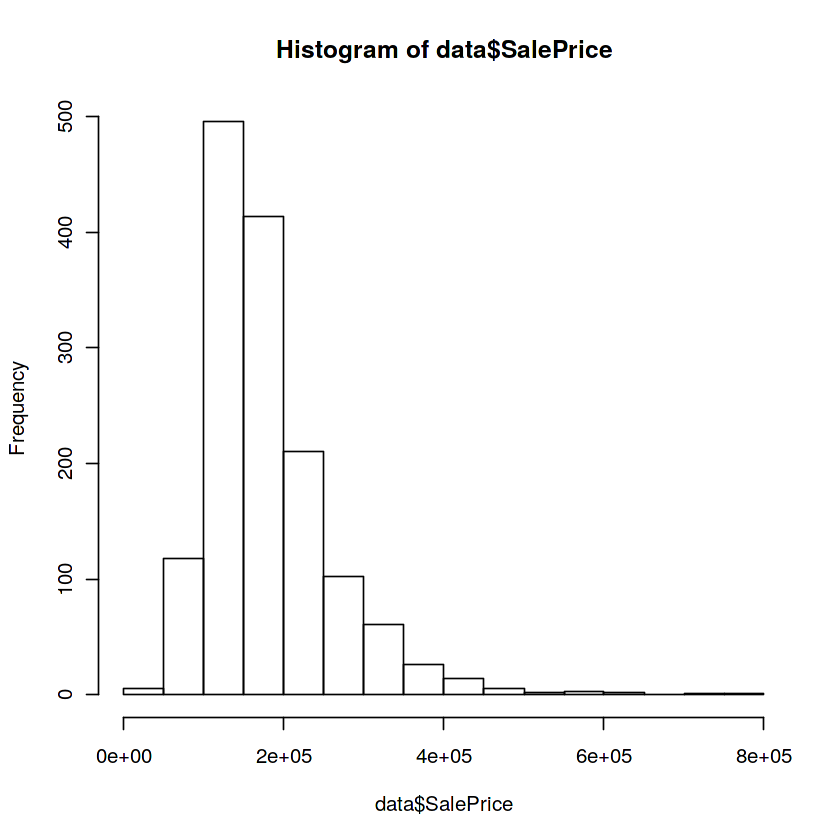

In [18]:
hist(data$SalePrice)

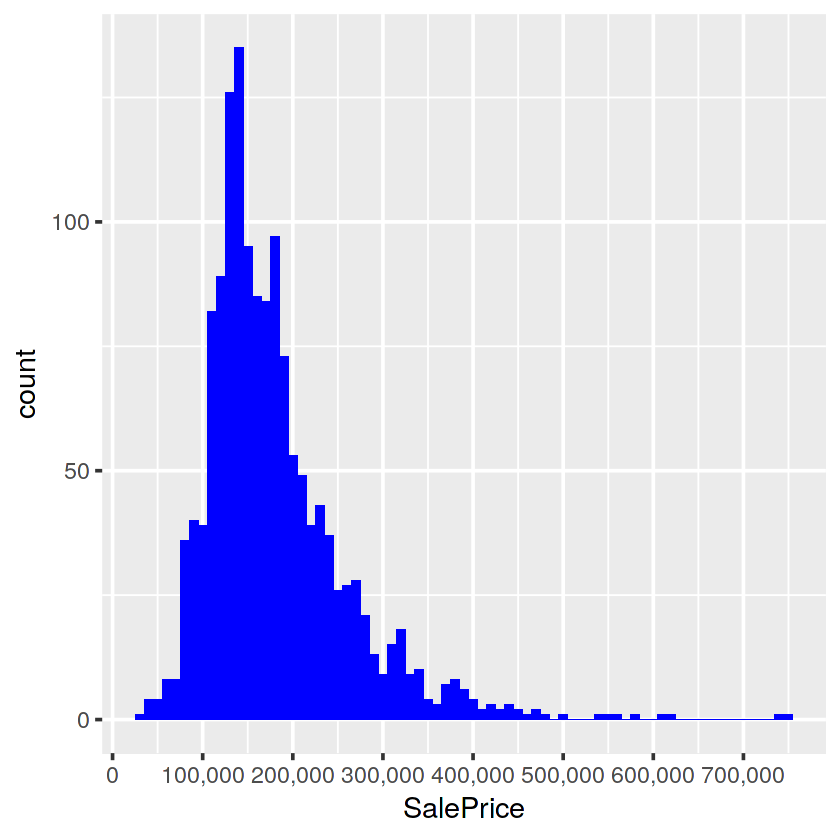

In [19]:
theme_set(theme_gray(base_size = 17))
ggplot(data=data[!is.na(data$SalePrice),], aes(x=SalePrice)) +
        geom_histogram(fill="blue", binwidth = 10000, size = 5) +
        scale_x_continuous(breaks= seq(0, 800000, by=100000), label = scales::comma)

In [20]:
summary(data$SalePrice)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  34900  129975  163000  180921  214000  755000    1459 

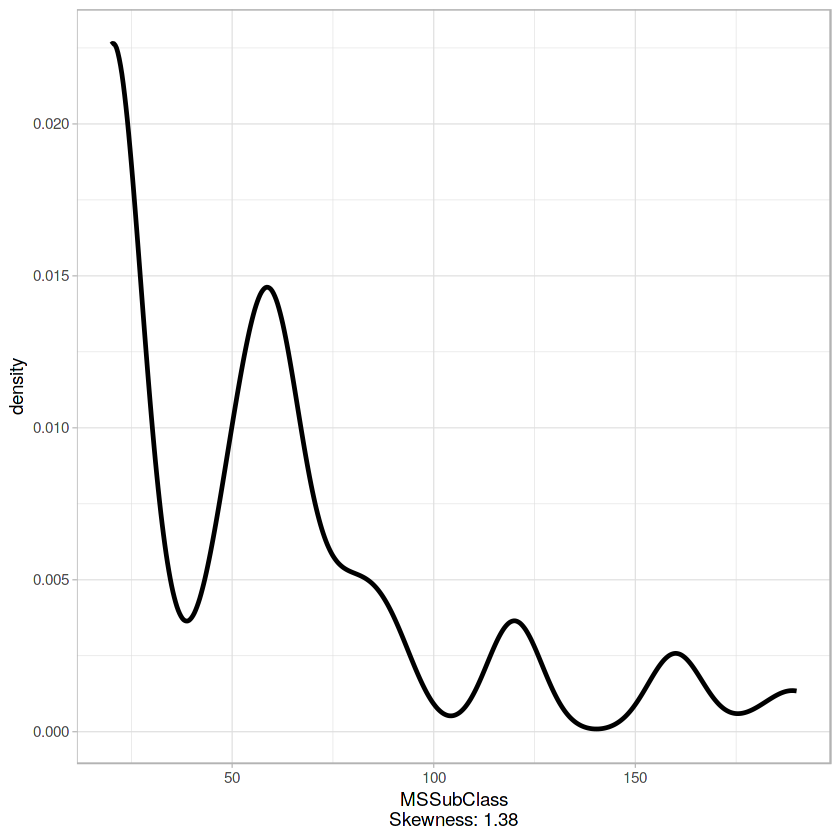

In [21]:
plotDen <- function(data_in, i){
  #data <- data.frame(x=data_in[[i]], SalePrice = data_in$SalePrice)
  p <- ggplot(data= data) + geom_line(aes(x = data_in[[i]]), stat = 'density', size = 1,alpha = 1.0) +
    xlab(paste0((colnames(data_in)[i]), '\n', 'Skewness: ',round(skewness(data_in[[i]], na.rm = TRUE), 2))) + theme_light() 
  return(p)
  
}

plotDen(data[numericVars], 2)

# Séparation des données Partie 1 

In [22]:
dataMe = data[,2:27]
dataMe$SalePrice <- data$SalePrice
head(dataMe)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,⋯,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,SalePrice
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,⋯,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,⋯,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,⋯,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,⋯,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,⋯,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,⋯,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,143000


In [23]:
dim(dataMe)

[1] 2919   27

In [24]:
#Affiche le nombre de valeurs manquantes dans chaque colonne
print(colSums(sapply(dataMe, is.na)))

  MSSubClass     MSZoning  LotFrontage      LotArea       Street        Alley 
           0            4          486            0            0         2721 
    LotShape  LandContour    Utilities    LotConfig    LandSlope Neighborhood 
           0            0            2            0            0            0 
  Condition1   Condition2     BldgType   HouseStyle  OverallQual  OverallCond 
           0            0            0            0            0            0 
   YearBuilt YearRemodAdd    RoofStyle     RoofMatl  Exterior1st  Exterior2nd 
           0            0            0            0            1            1 
  MasVnrType   MasVnrArea    SalePrice 
          24           23         1459 


## Variables quantitatives

In [25]:
numericVarsM <- names(which(sapply(dataMe, is.numeric)))
cat('Il y a', length(numericVarsM), 'varaibales numériques')

#Variables quaalitatives à valeurs numériques
qualNames <- c('MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 
            'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold')

quantVarsM <- names(which(sapply(dataMe[ , !names(dataMe) %in% qualNames], is.numeric)))
cat('\n\nIl y a', length(quantVarsM), 'variables quantitatives\n')
print(quantVarsM)

Il y a 9 varaibales numériques

Il y a 4 variables quantitatives
[1] "LotFrontage" "LotArea"     "MasVnrArea"  "SalePrice"  


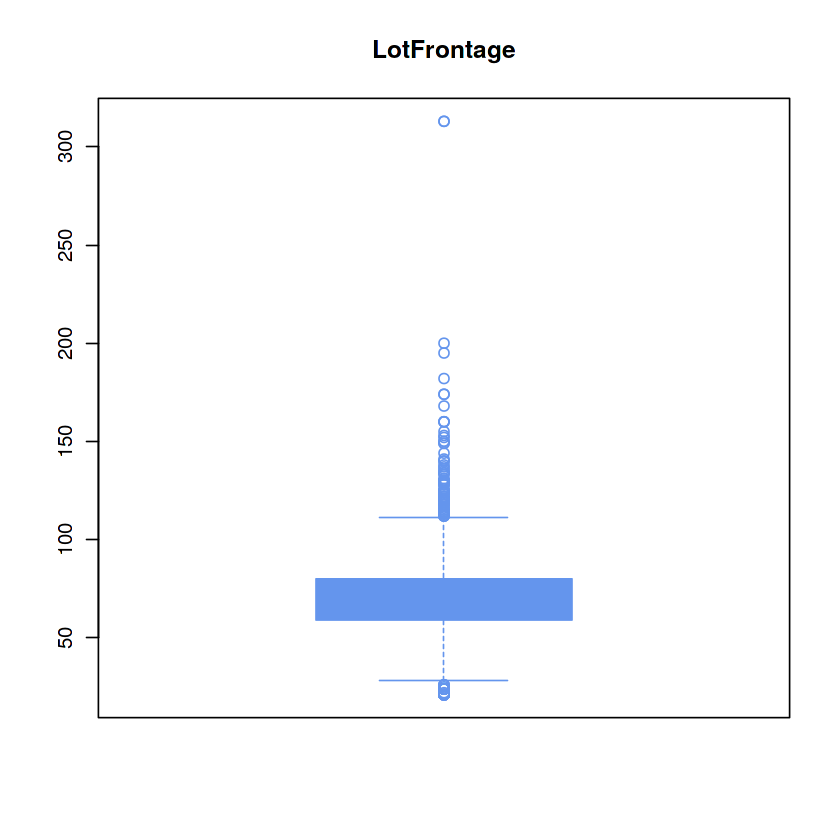

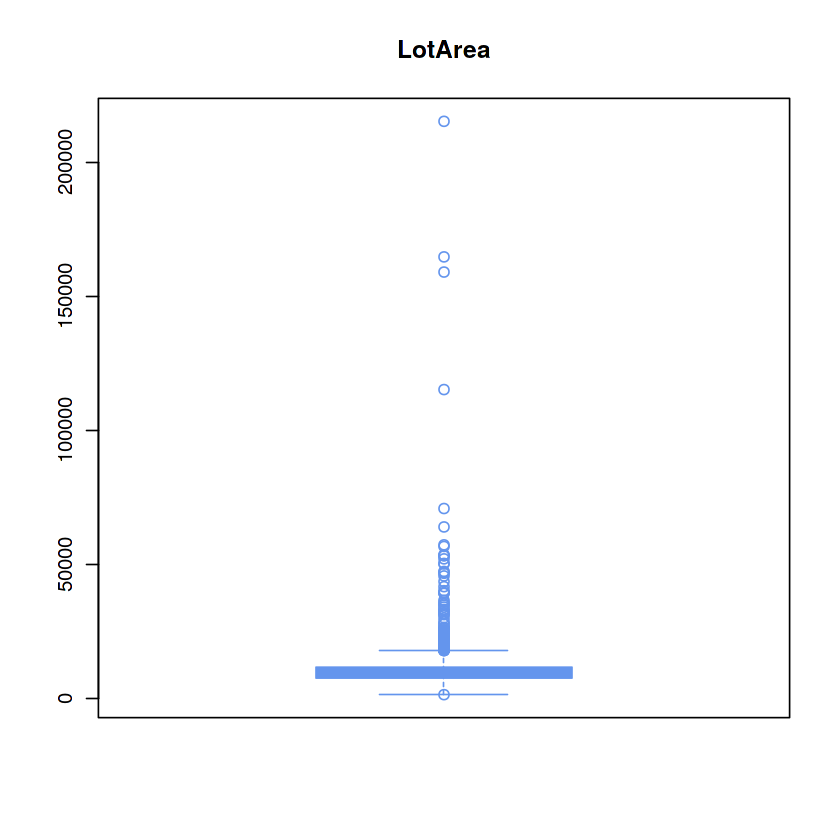

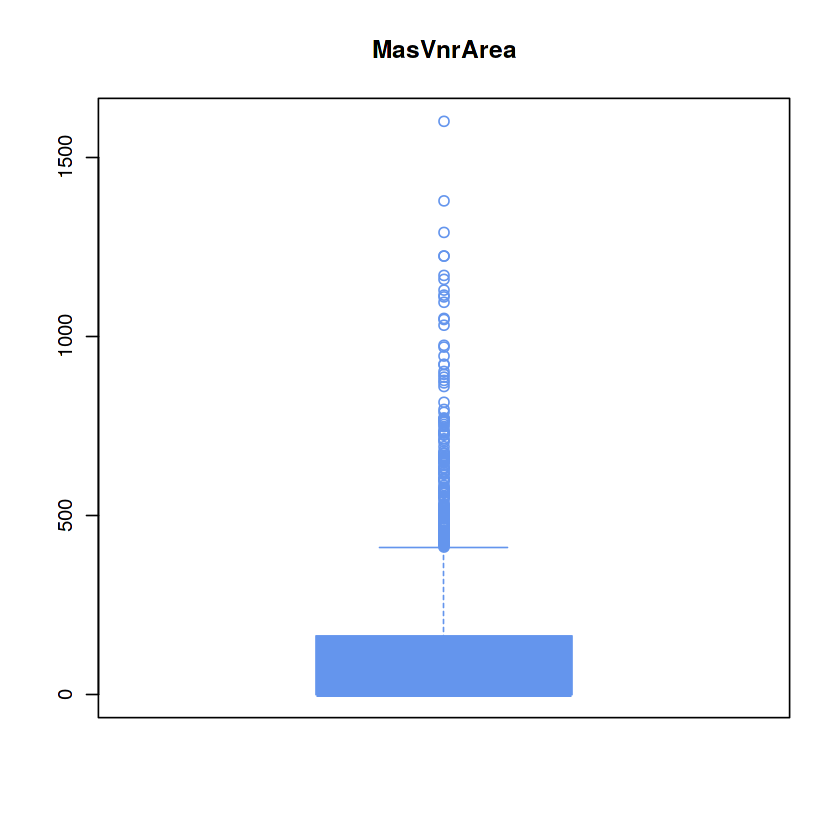

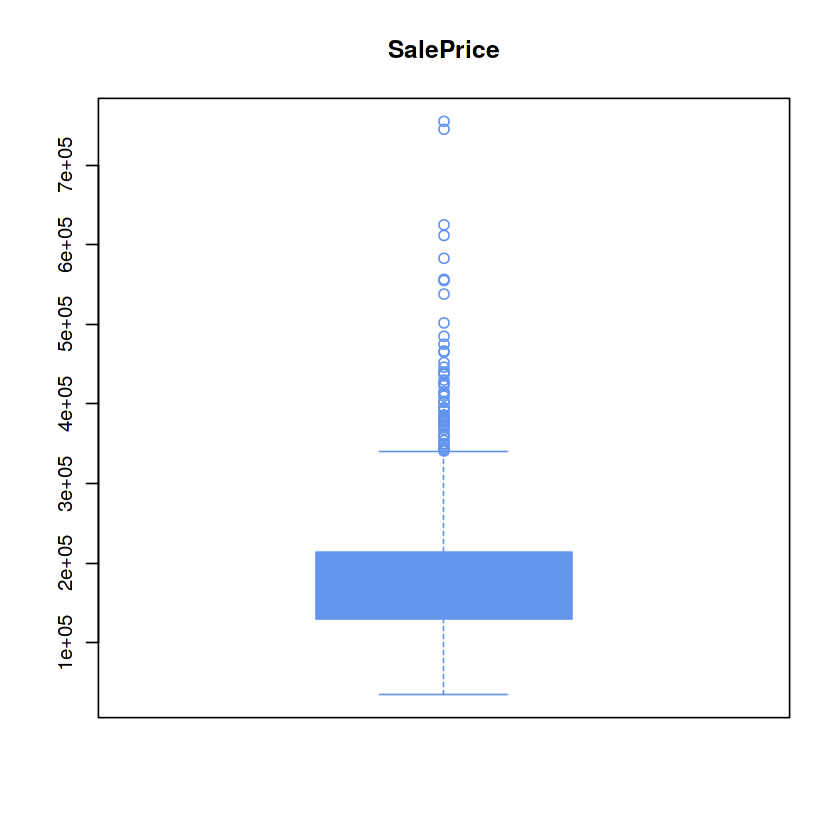

In [26]:
for (i in 1:length(quantVarsM)){
    boxplot(dataMe[quantVarsM][,i],main=names(dataMe[quantVarsM])[i], col = "cornflowerblue", border = "cornflowerblue")
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1459 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1459 rows containing non-finite values (stat_density).”


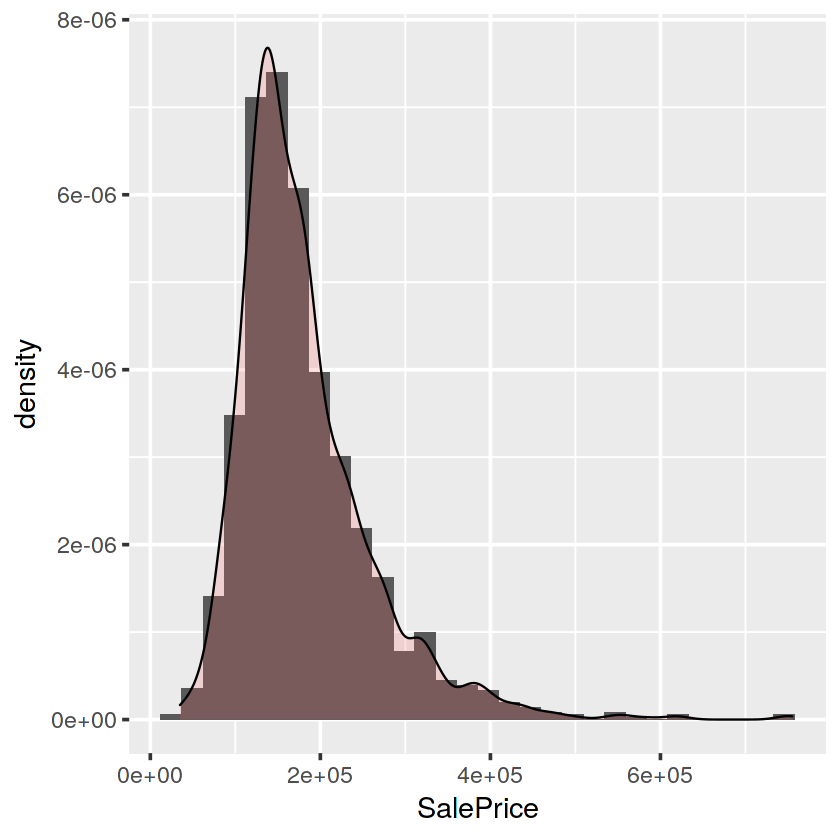

In [27]:
ggplot(dataMe[quantVarsM], aes(x=SalePrice)) + 
    geom_histogram(aes(y=..density..))+
    geom_density(alpha=.2, fill="#FF6666") 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 486 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 486 rows containing non-finite values (stat_density).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



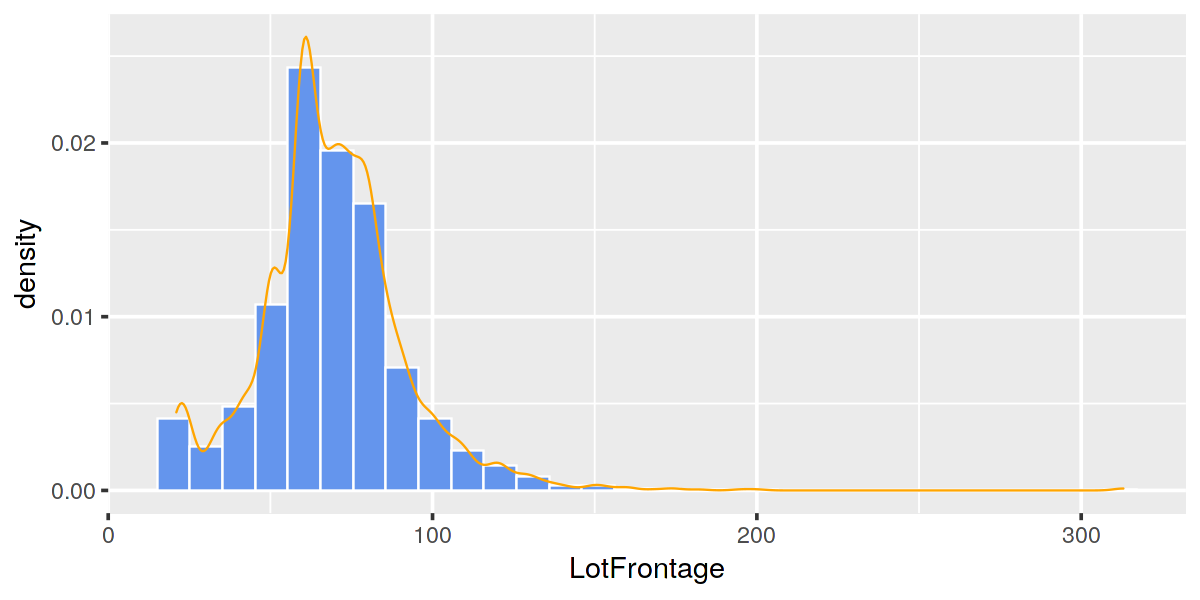

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 23 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 23 rows containing non-finite values (stat_density).”


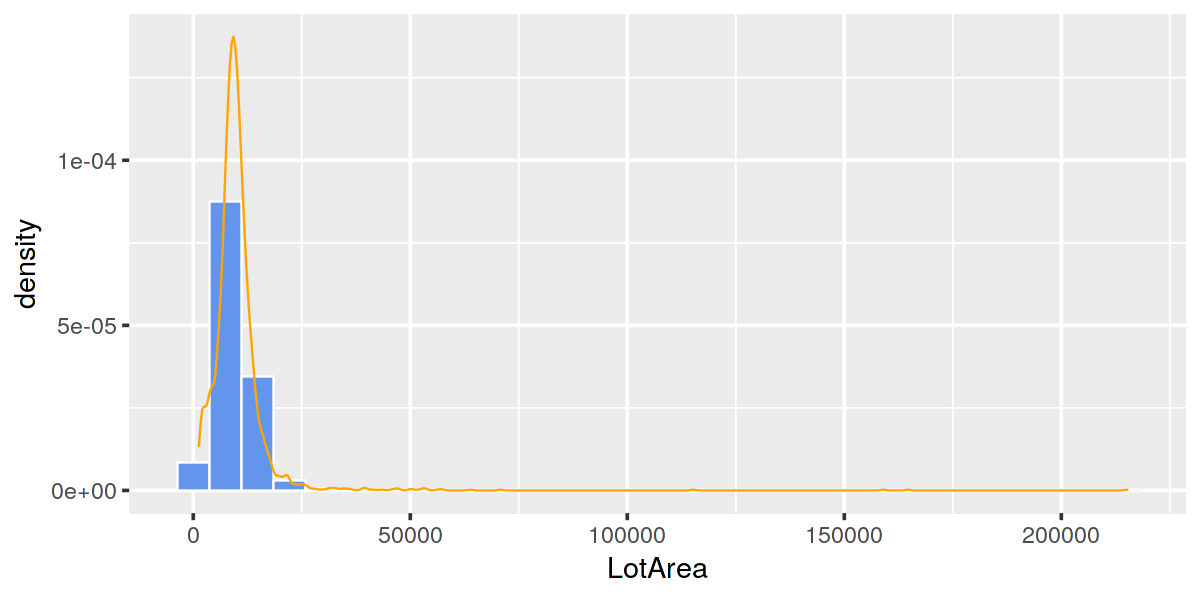

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1459 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1459 rows containing non-finite values (stat_density).”


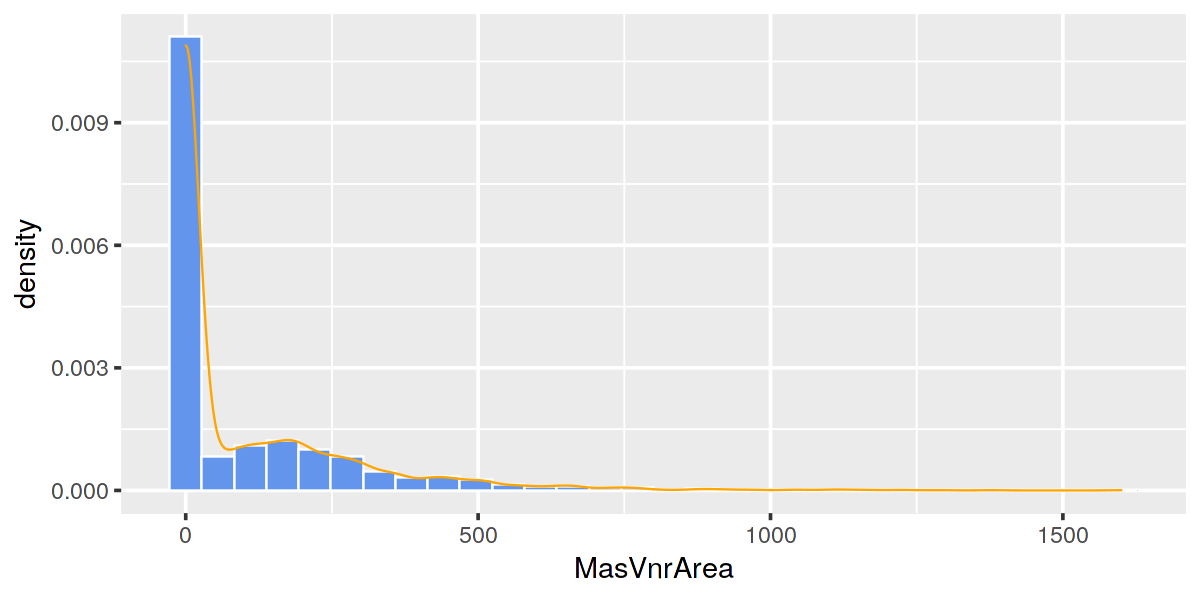

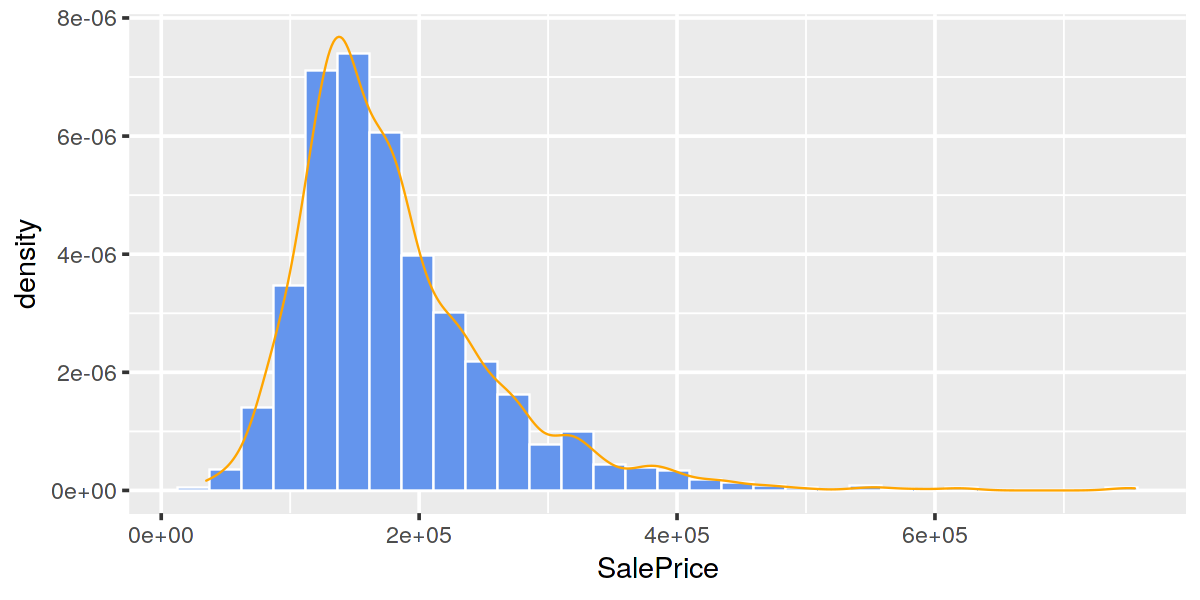

In [28]:
for (i in 1:4){
    
    h <- ggplot(dataMe[quantVarsM], aes_string(x=quantVarsM[i])) + 
             geom_histogram(aes(y=..density..), color="white", fill="cornflowerblue")+
             geom_density(alpha=.2, col = "orange") 
    options(repr.plot.width = 10, repr.plot.height = 5)
    print(h)
}

## Variables qualitatives

In [29]:
categoricalVarsM <- names(which(sapply(dataMe, is.character)))
cat('Il y a', length(categoricalVarsM), 'variabales textuelles\n')

qualVarsM <- names(dataMe[ , !names(dataMe) %in% quantVarsM])
cat('\n\nIl y a', length(qualVarsM), 'variabales catégorielles, qualitatives\n')
print(qualVarsM)

Il y a 18 variabales textuelles


Il y a 23 variabales catégorielles, qualitatives
 [1] "MSSubClass"   "MSZoning"     "Street"       "Alley"        "LotShape"    
 [6] "LandContour"  "Utilities"    "LotConfig"    "LandSlope"    "Neighborhood"
[11] "Condition1"   "Condition2"   "BldgType"     "HouseStyle"   "OverallQual" 
[16] "OverallCond"  "YearBuilt"    "YearRemodAdd" "RoofStyle"    "RoofMatl"    
[21] "Exterior1st"  "Exterior2nd"  "MasVnrType"  


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


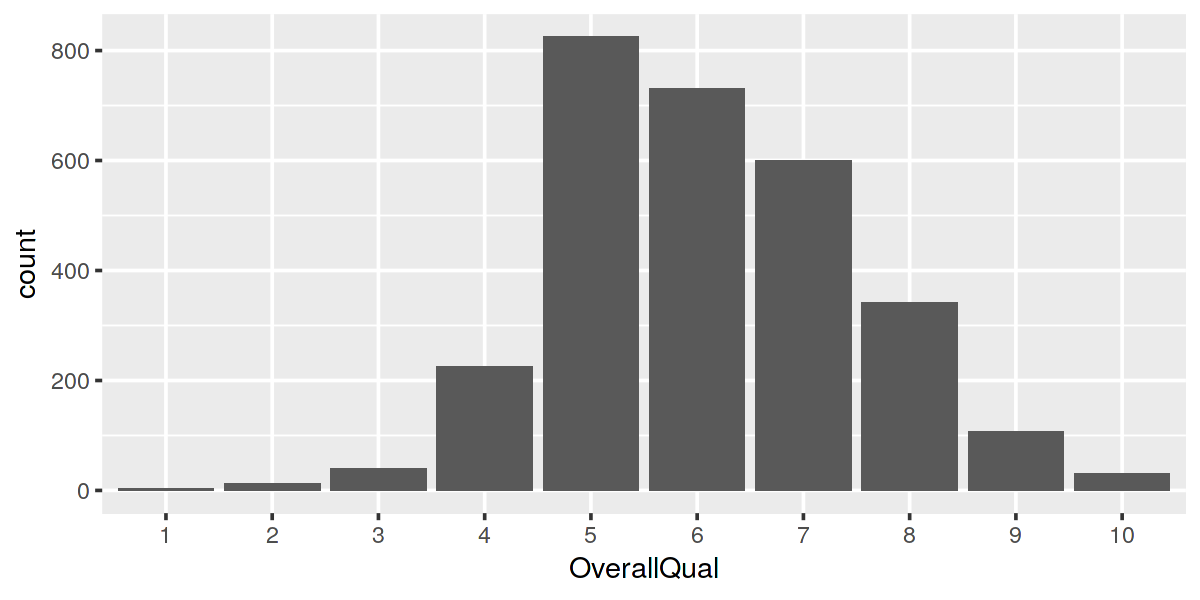

In [30]:
ggplot(data=dataMe, aes(x=as.factor(OverallQual))) +
        geom_histogram(stat= 'count')+
        labs(x='OverallQual') 


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


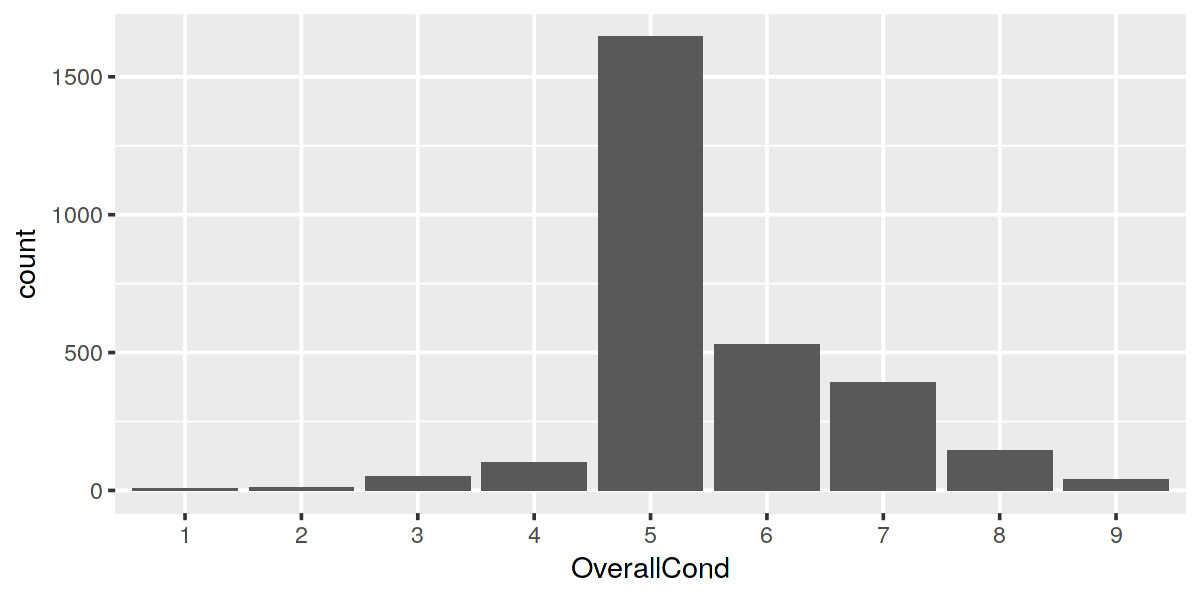

In [31]:
ggplot(data=dataMe, aes(x=as.factor(OverallCond))) +
        geom_histogram(stat= 'count')+
        labs(x='OverallCond') 
options(repr.plot.width = 16, repr.plot.height = 8)

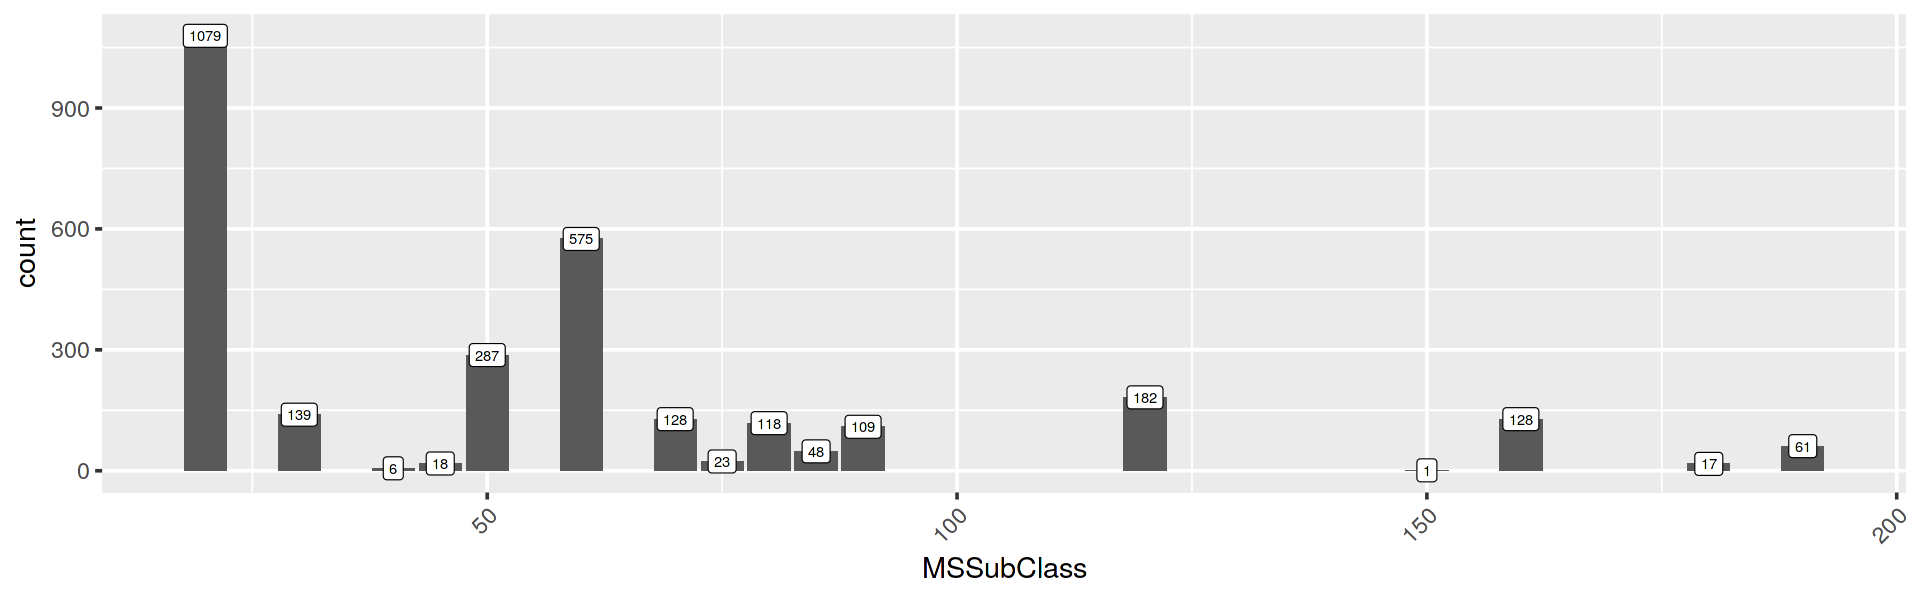

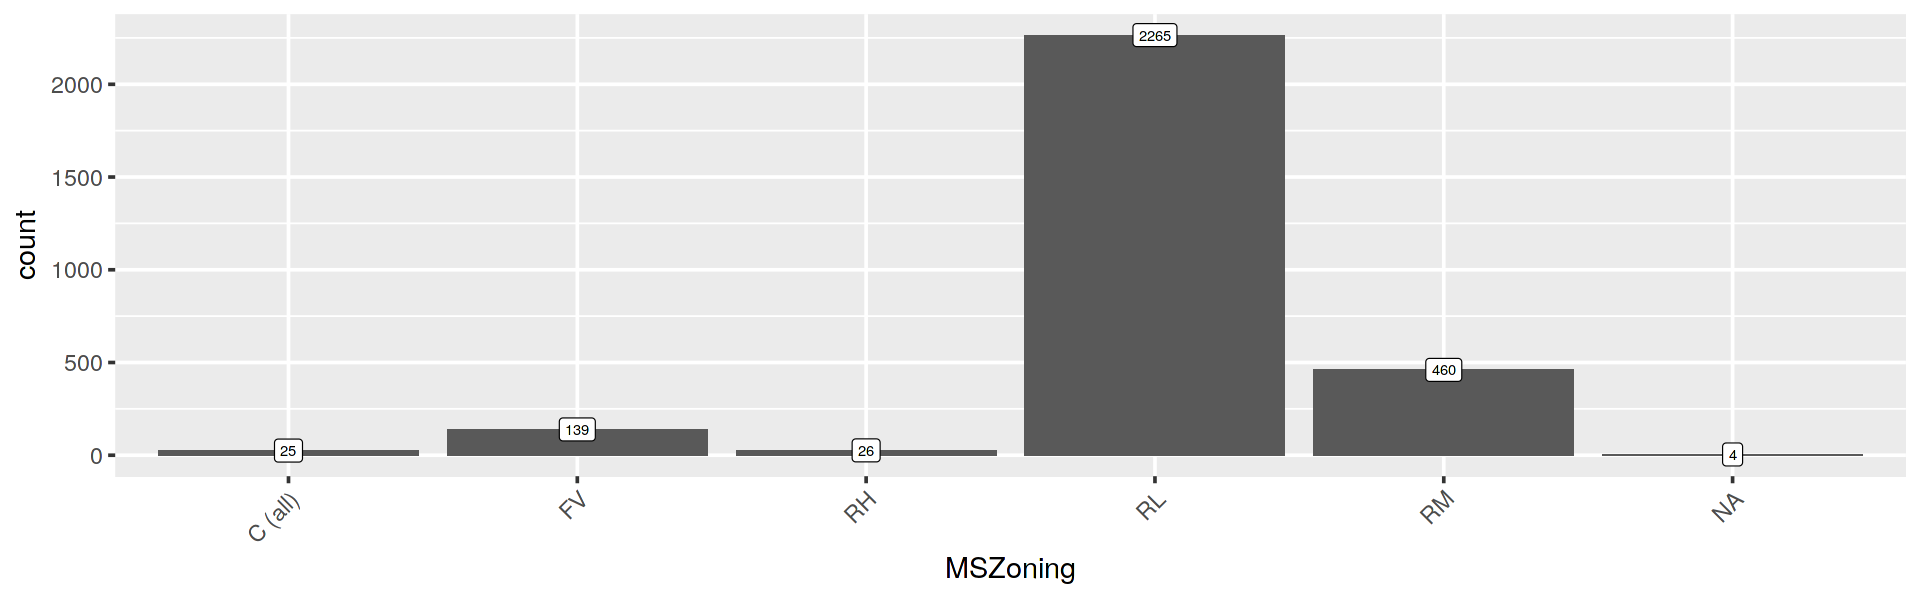

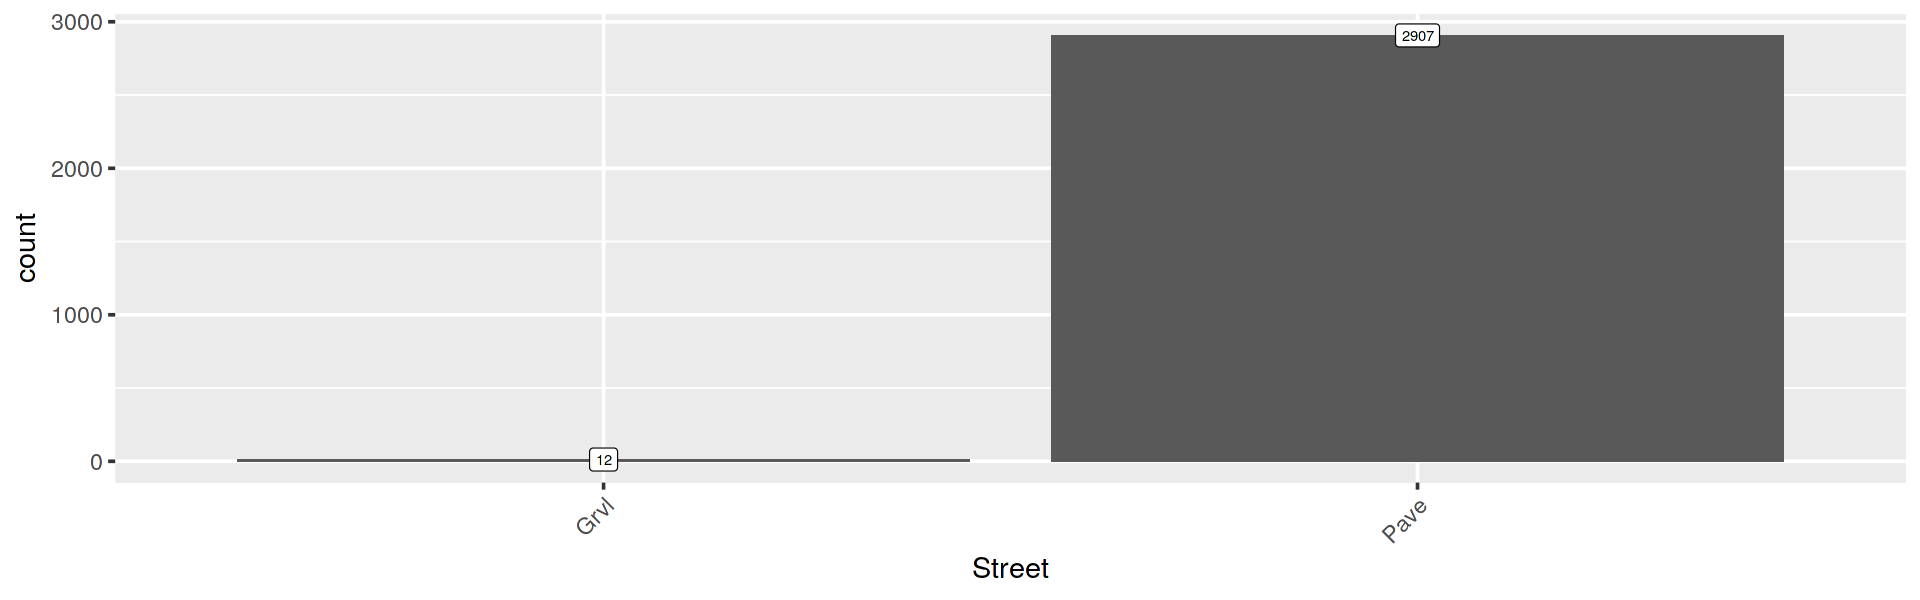

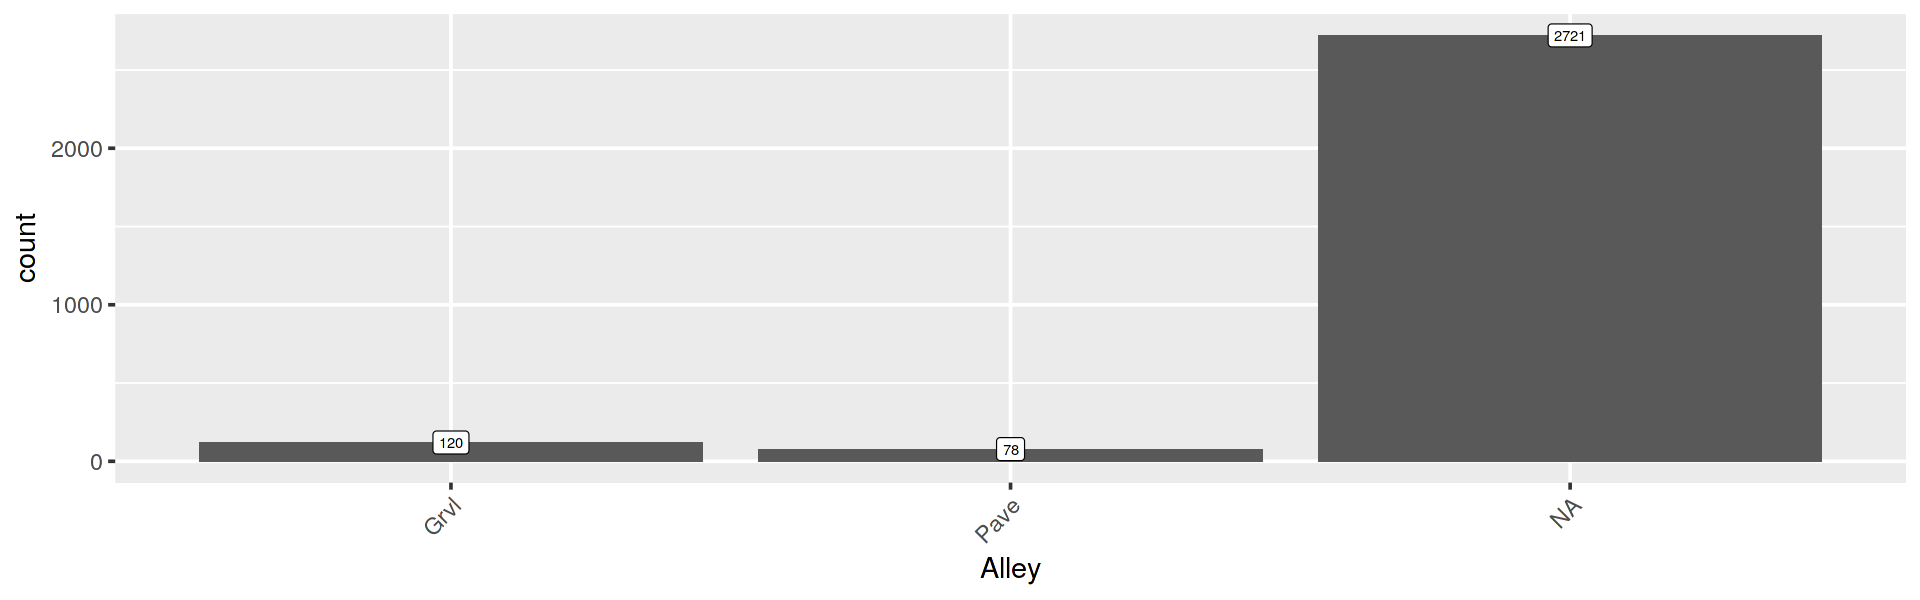

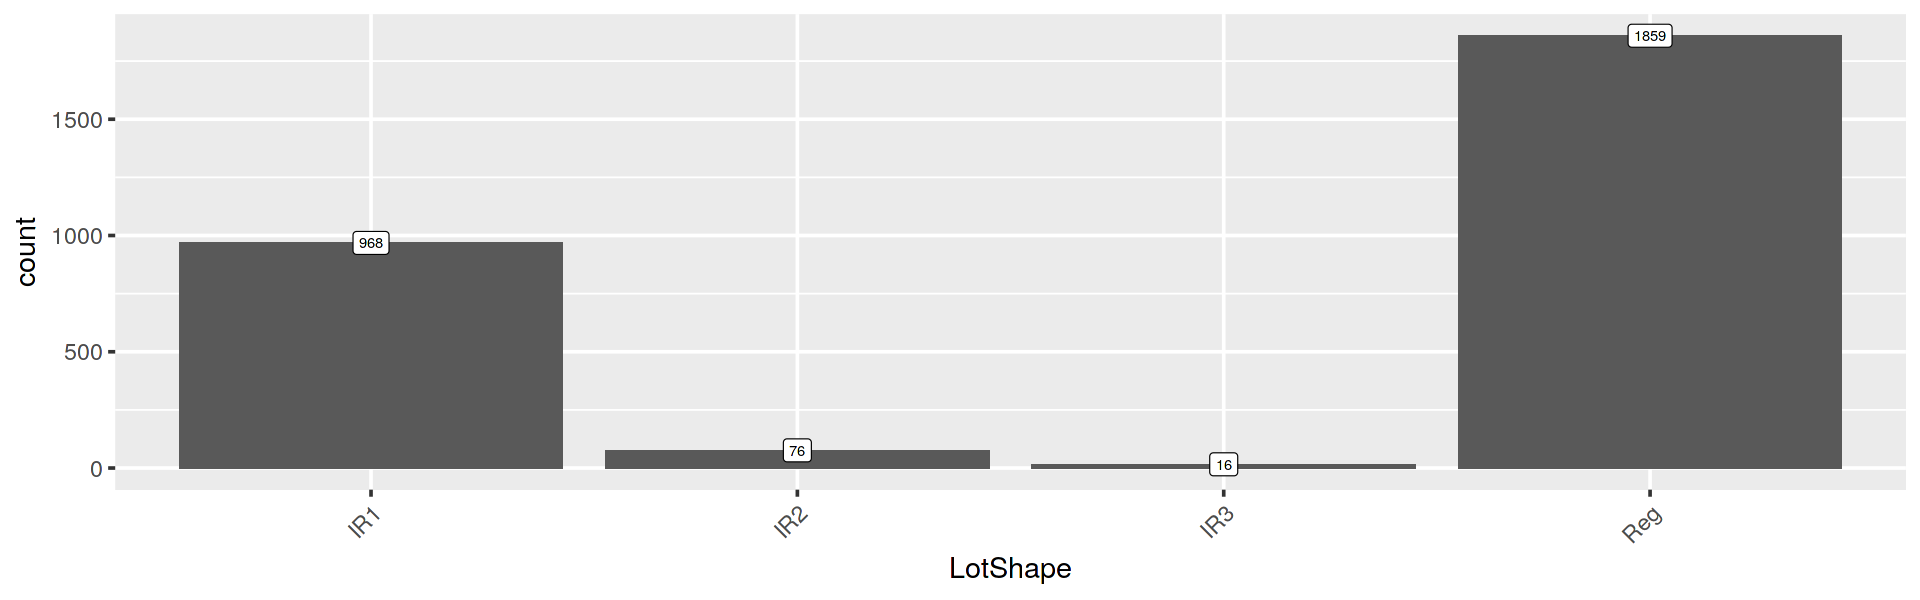

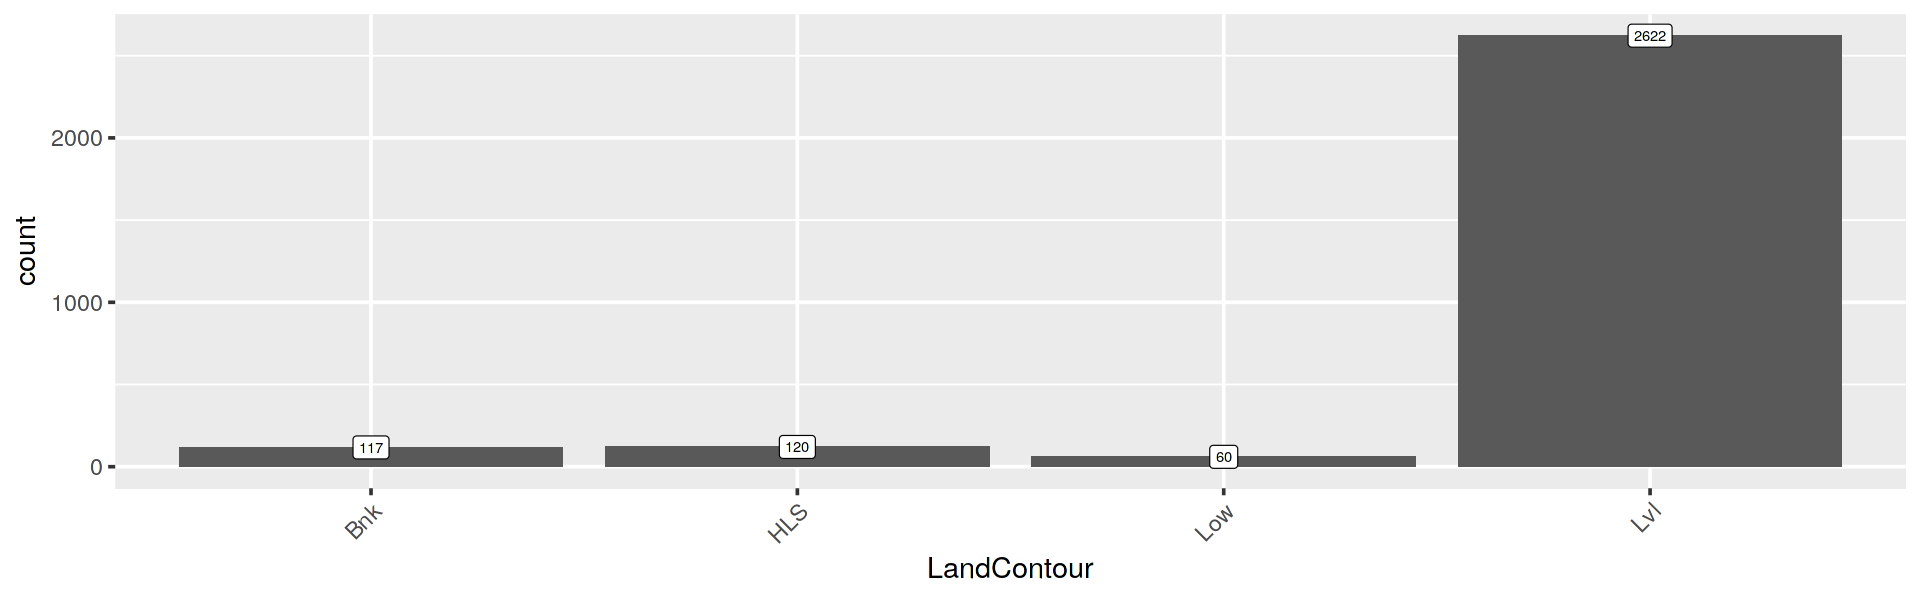

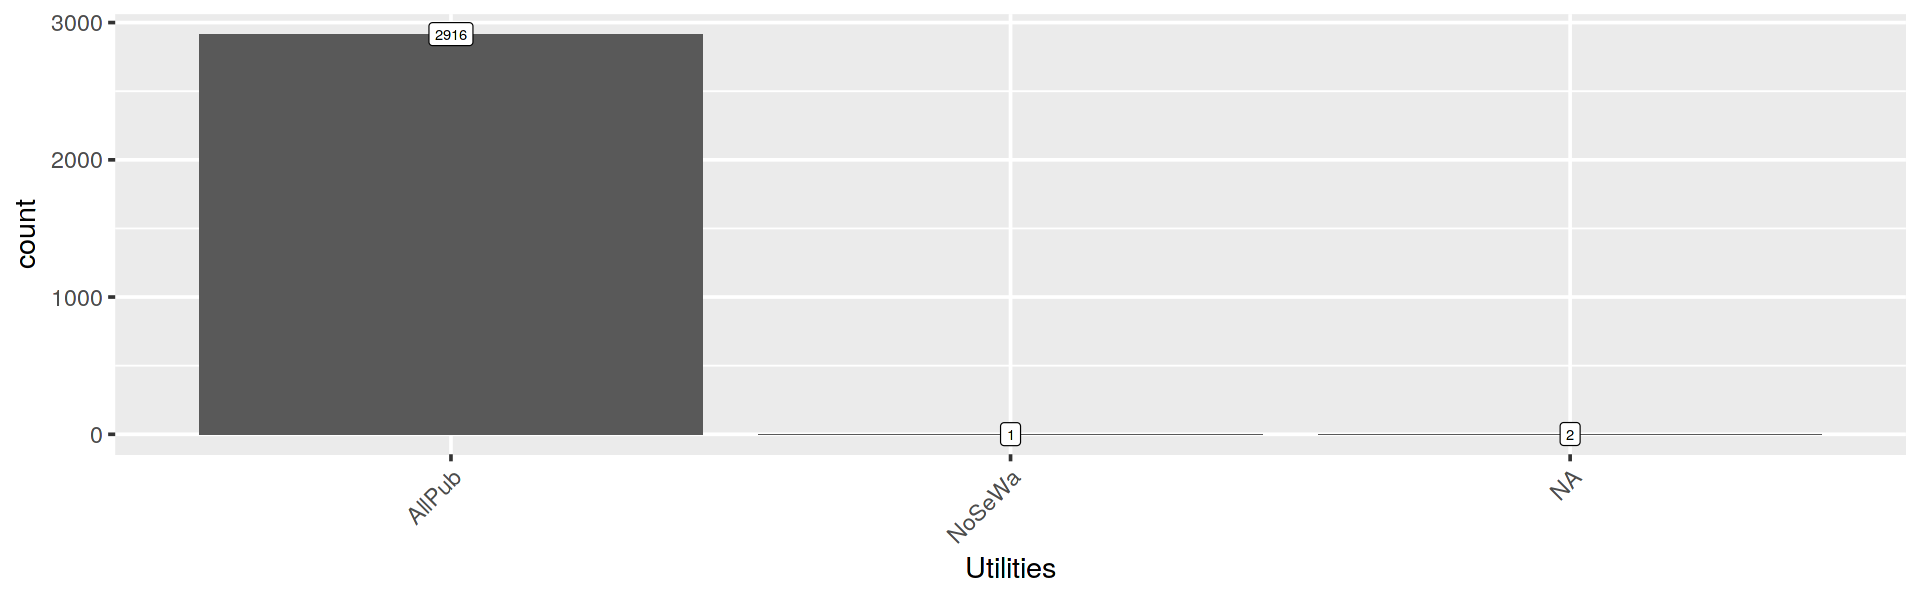

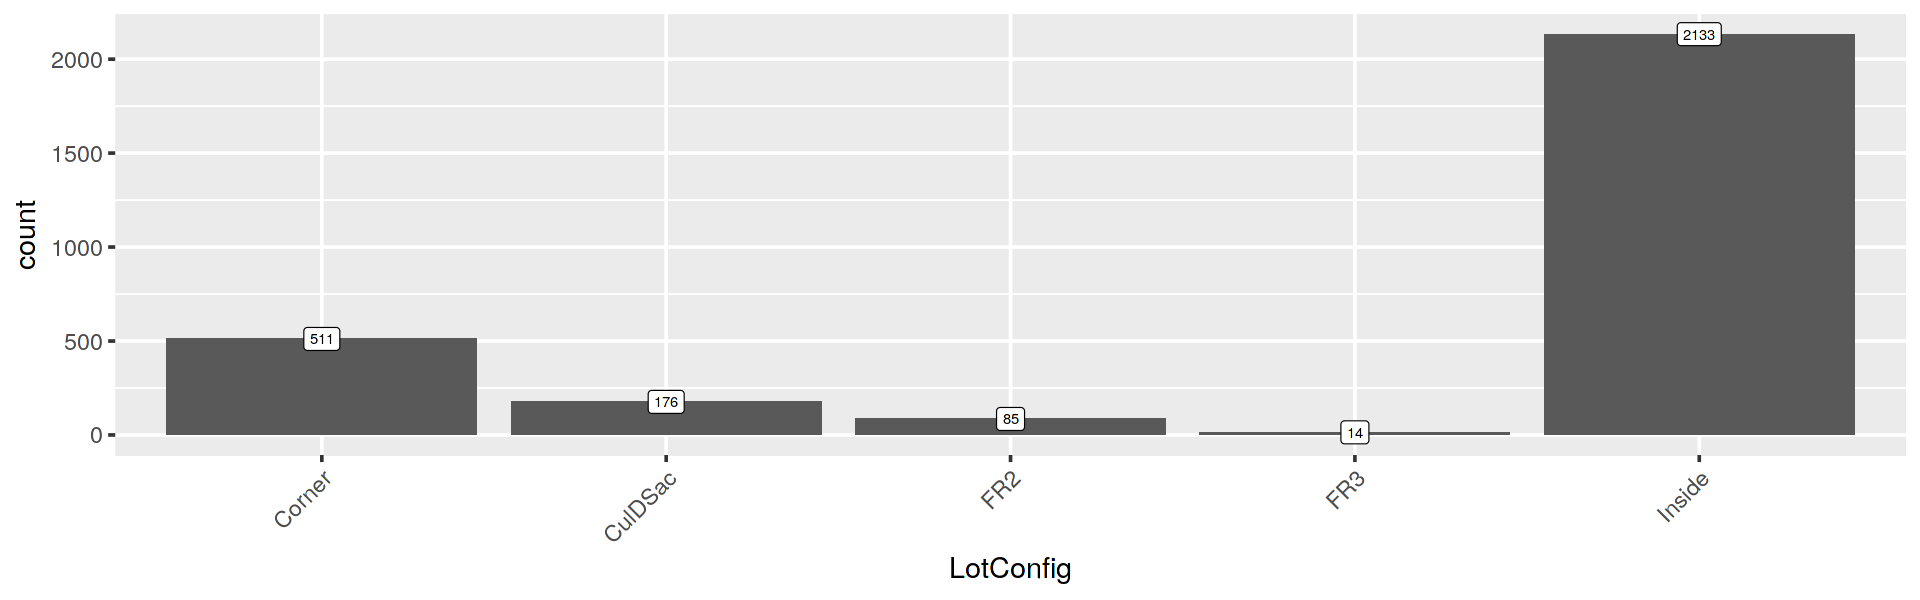

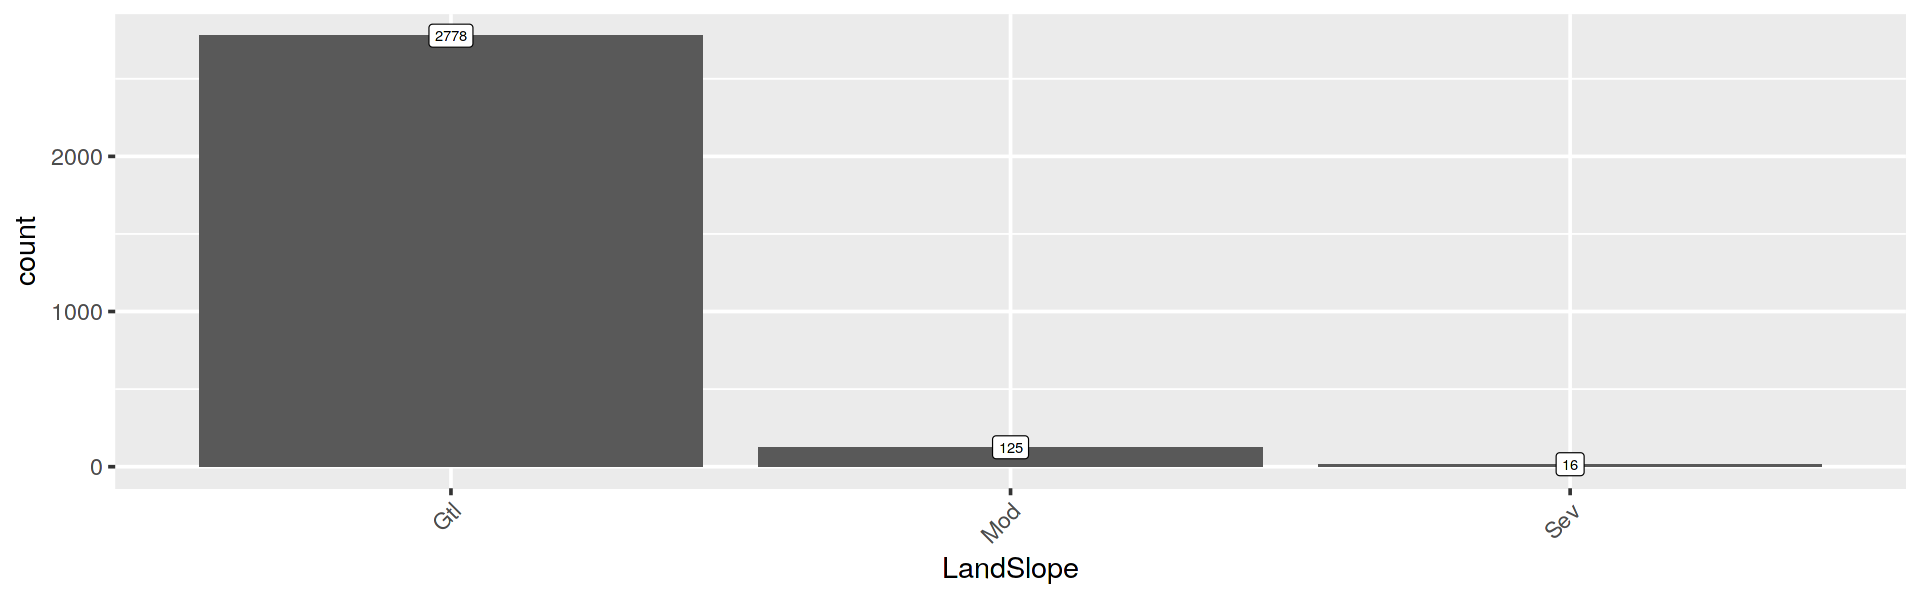

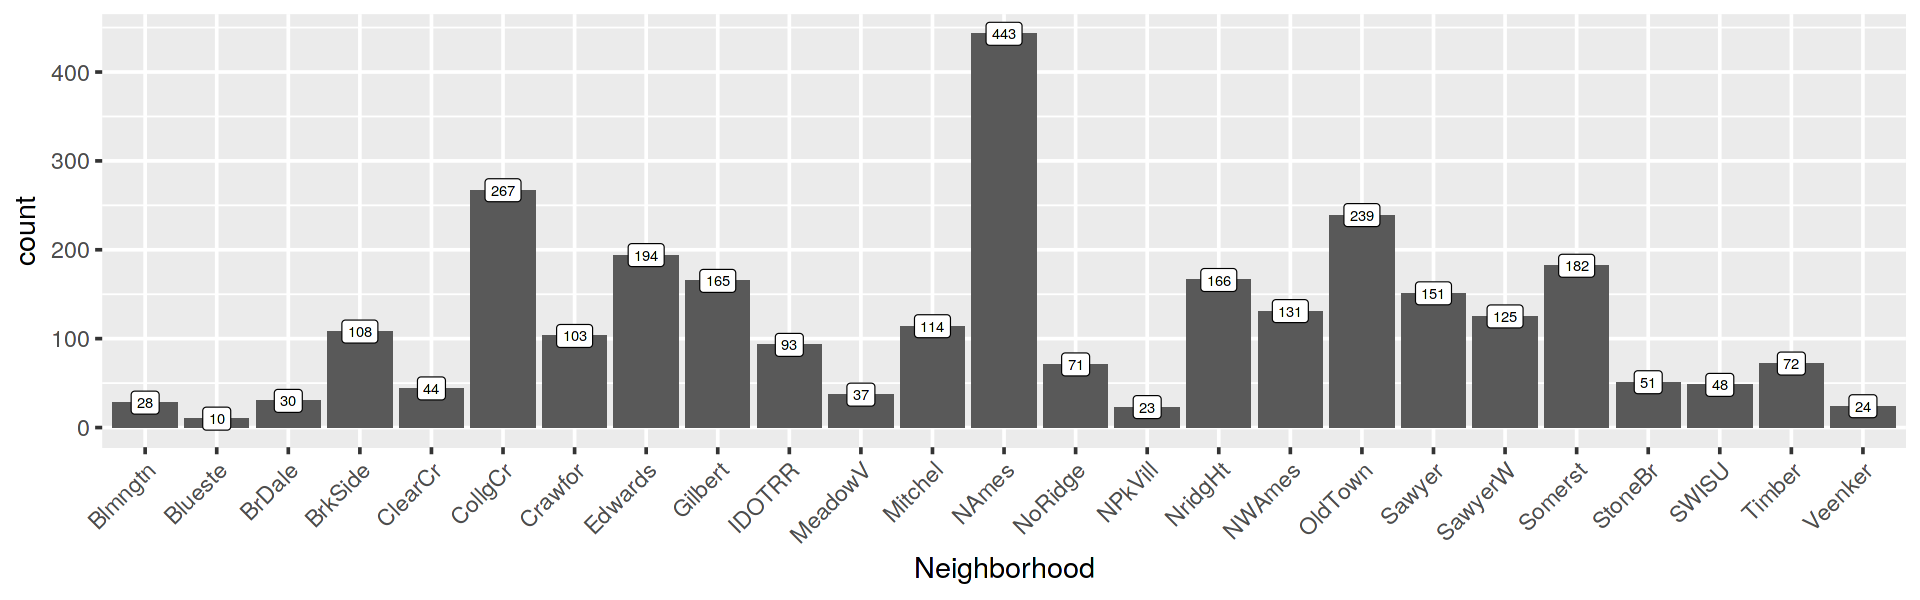

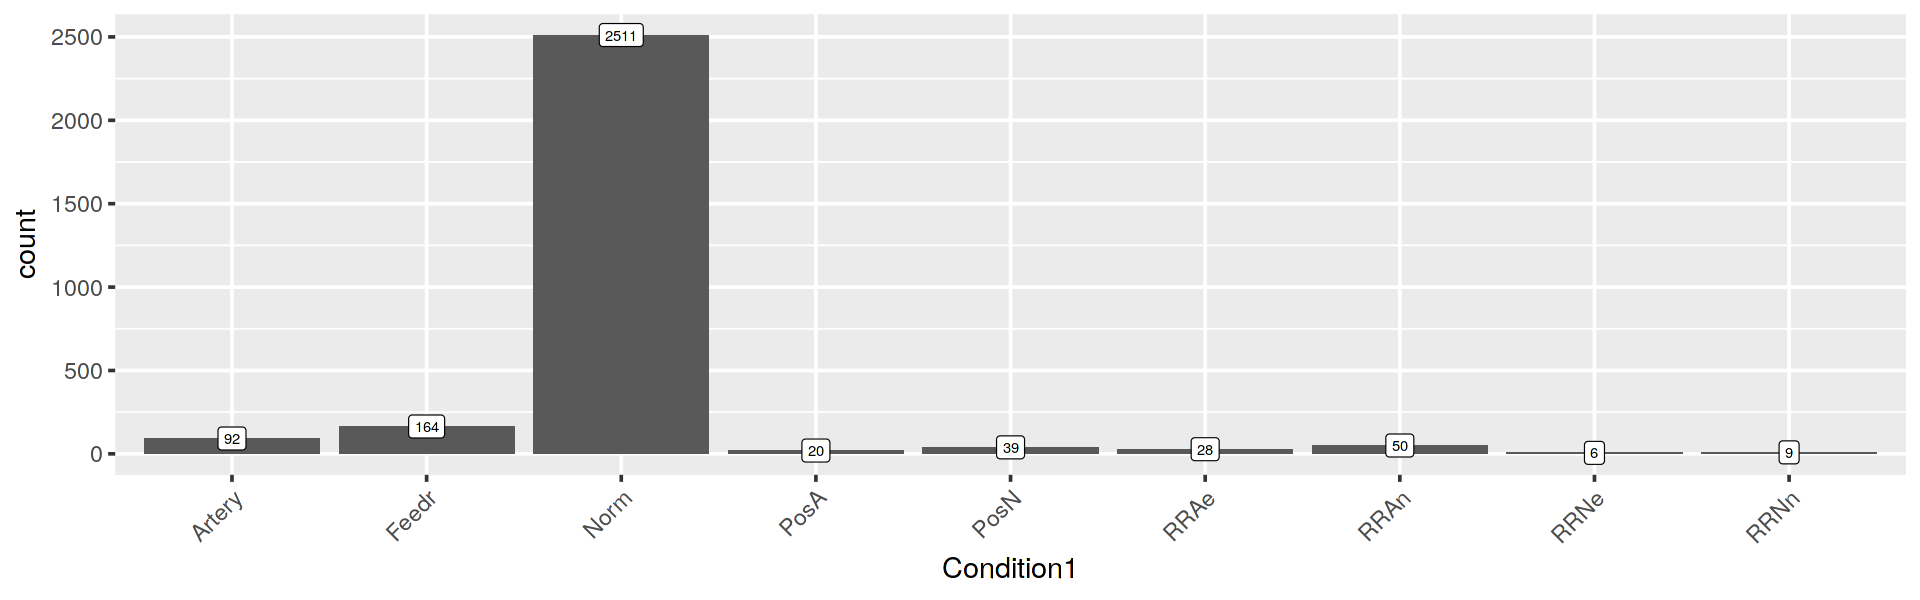

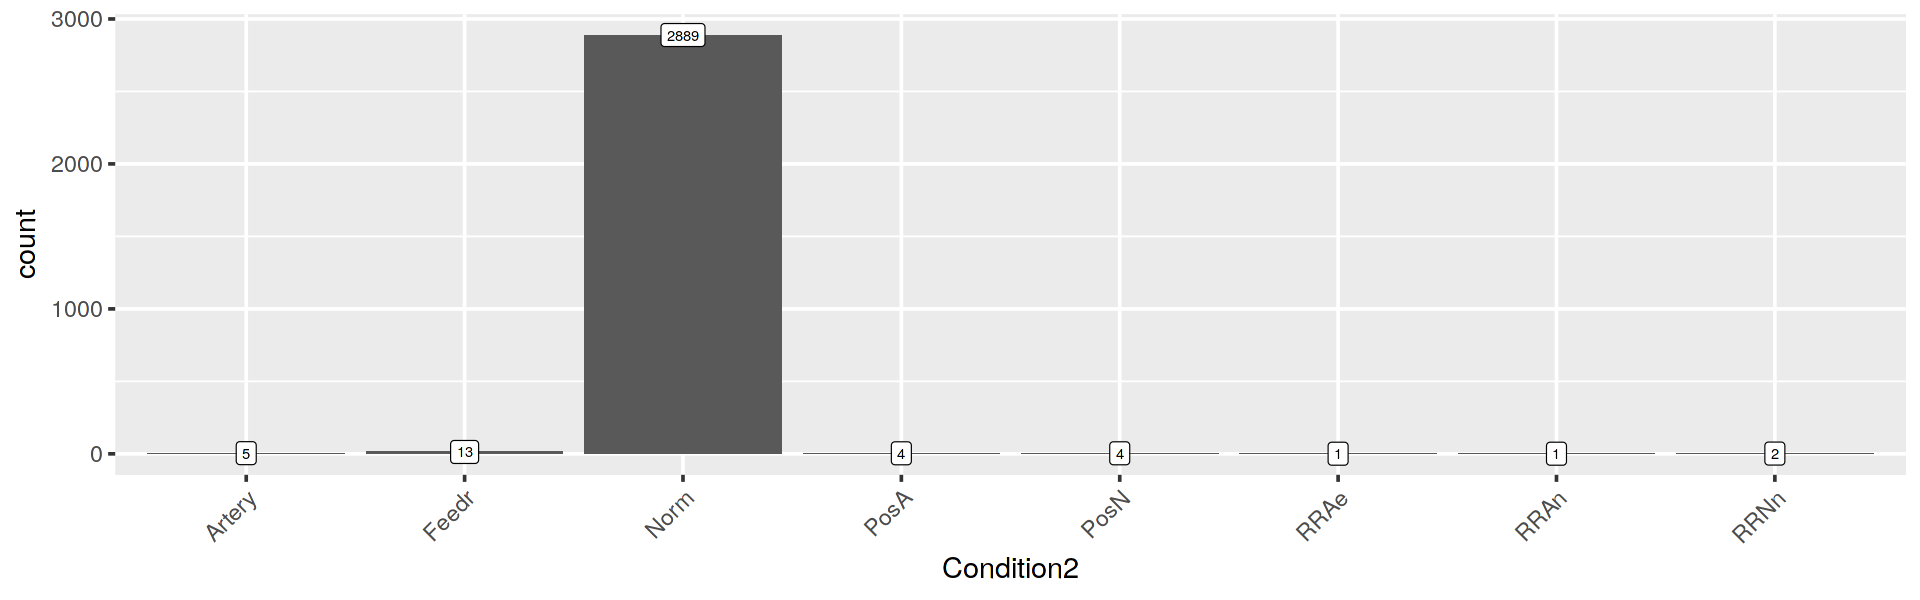

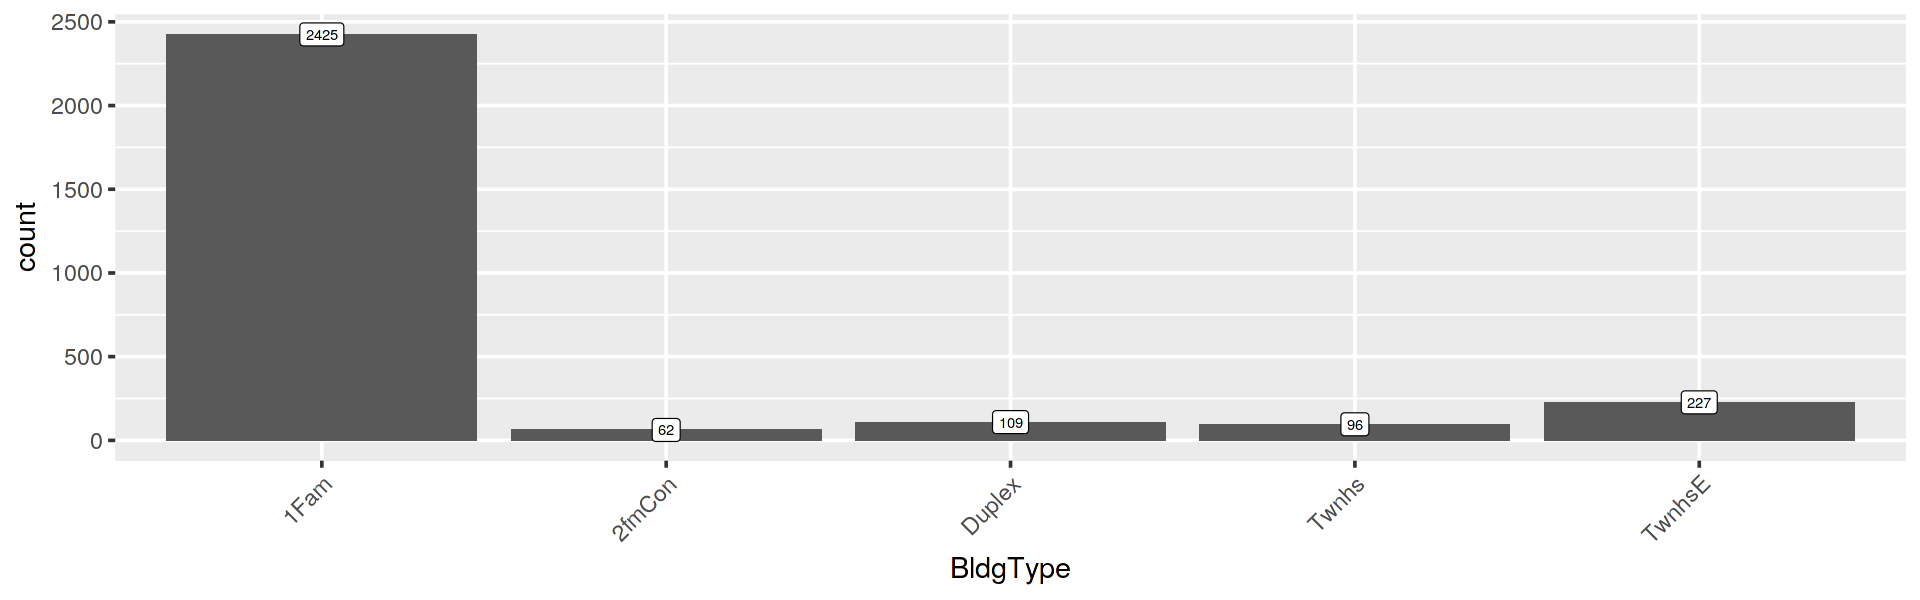

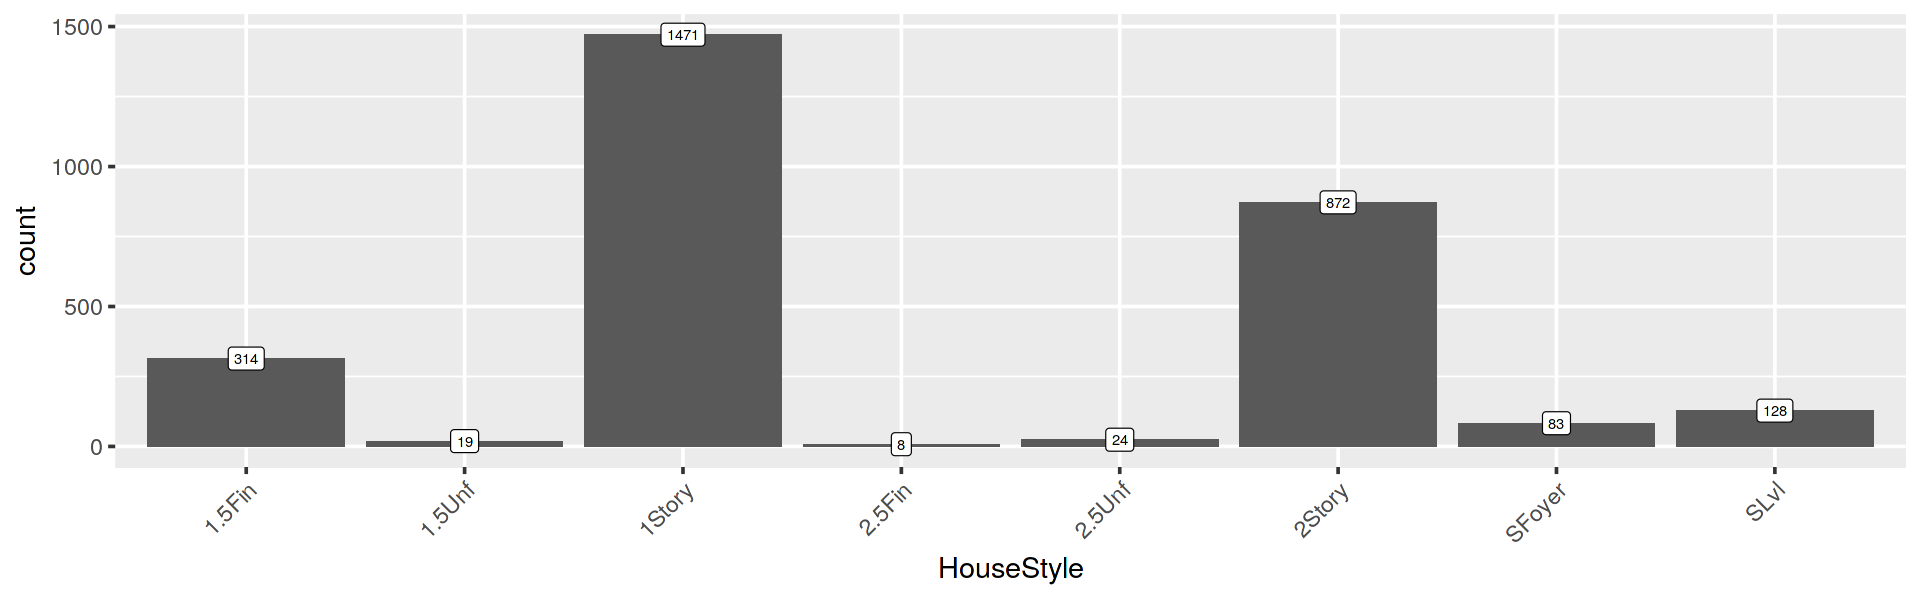

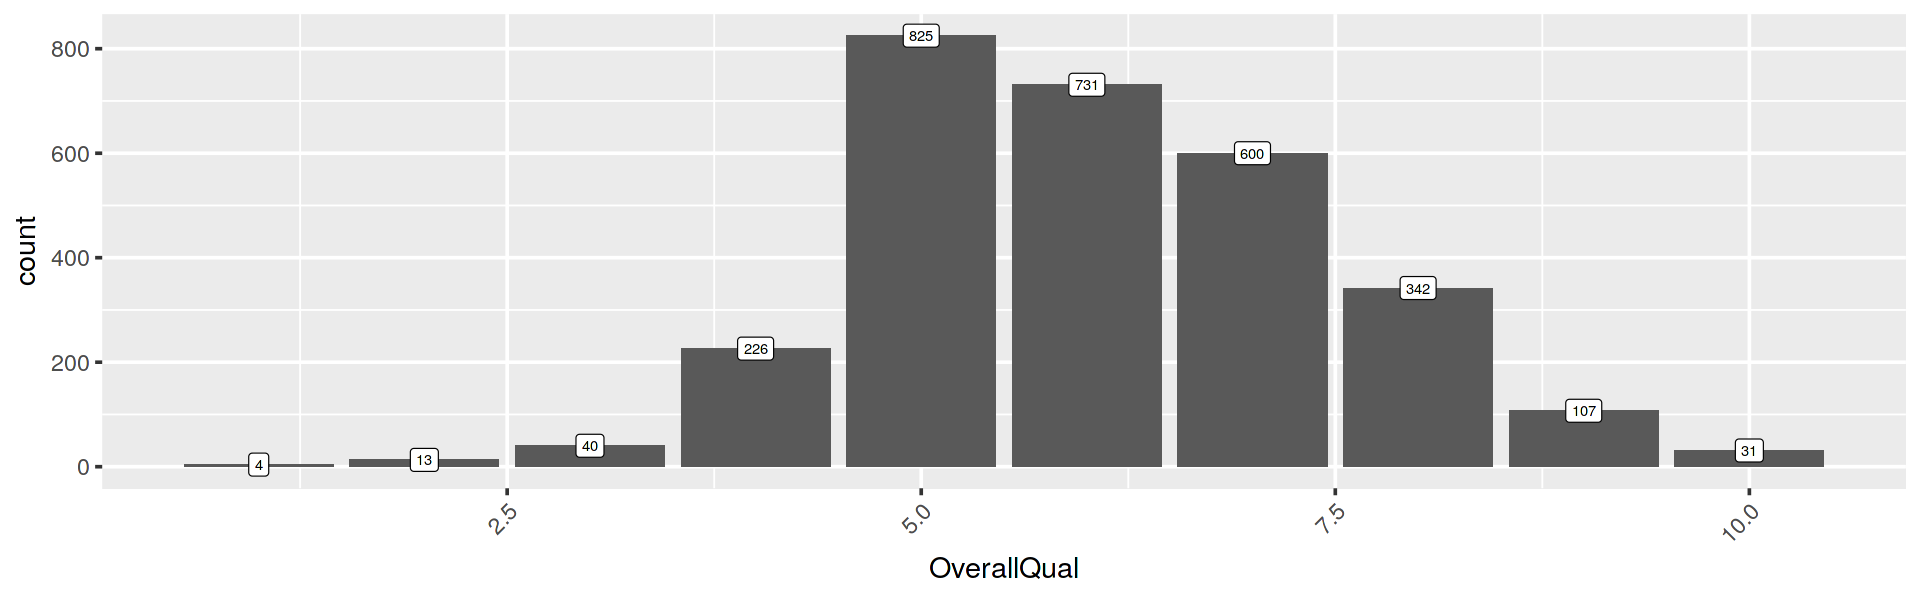

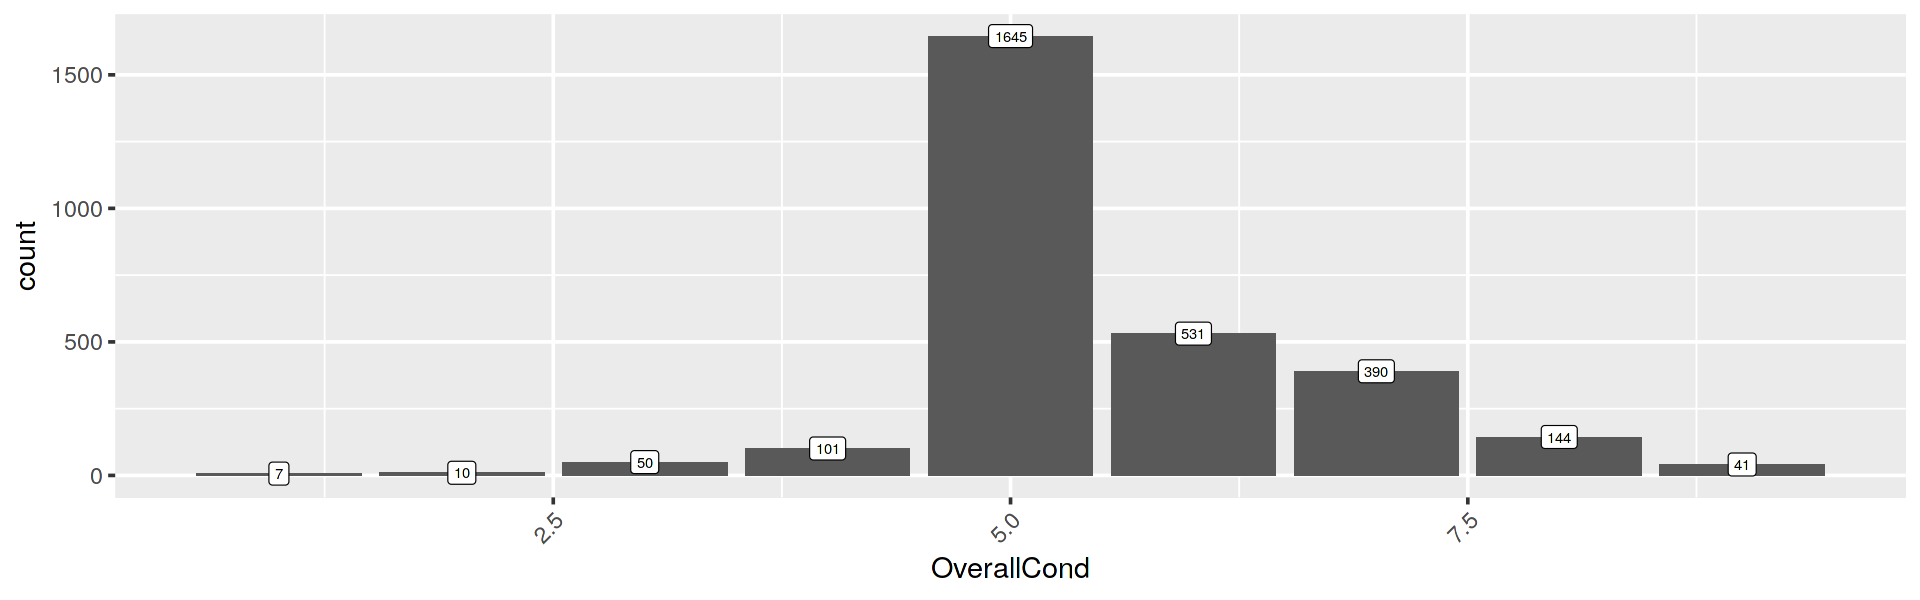

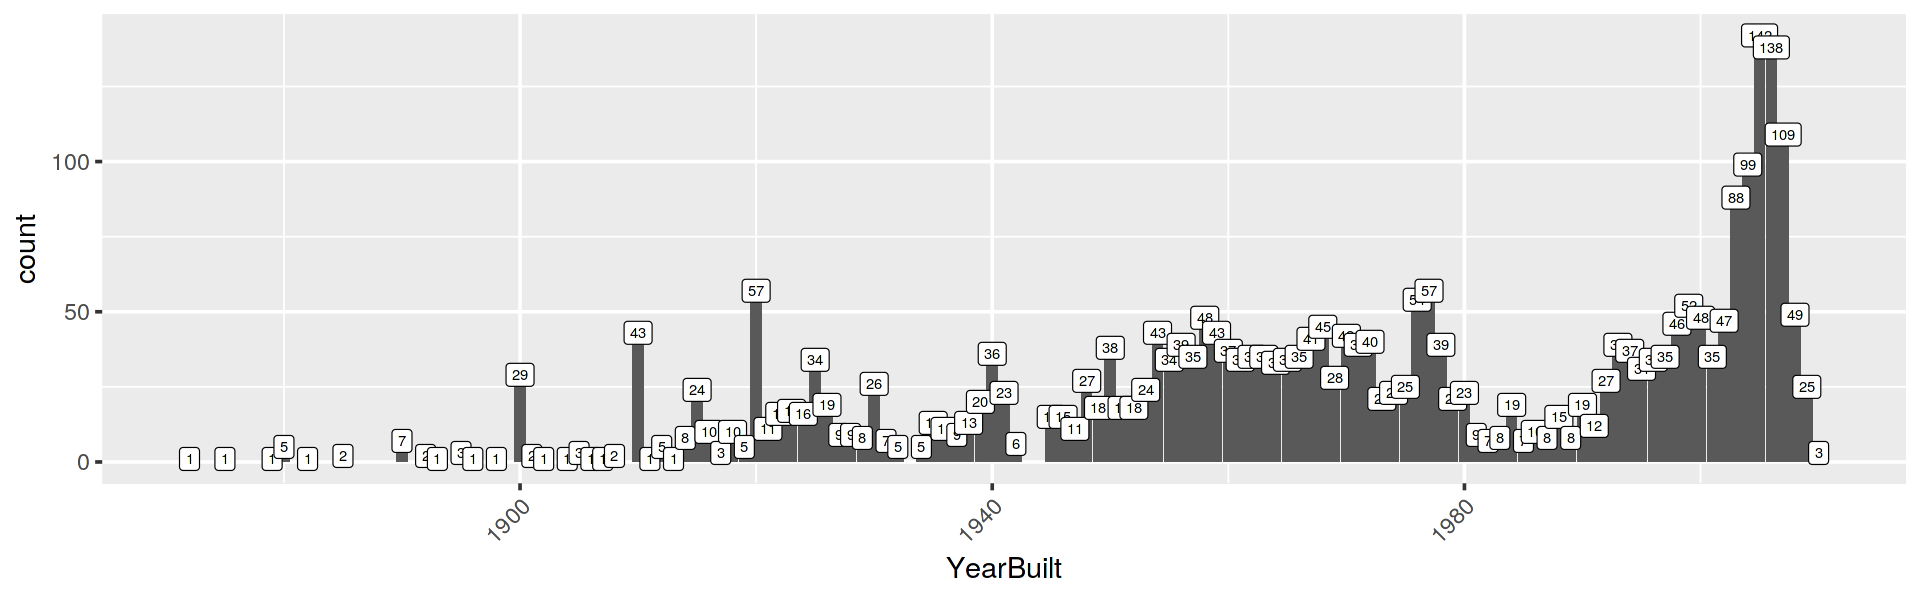

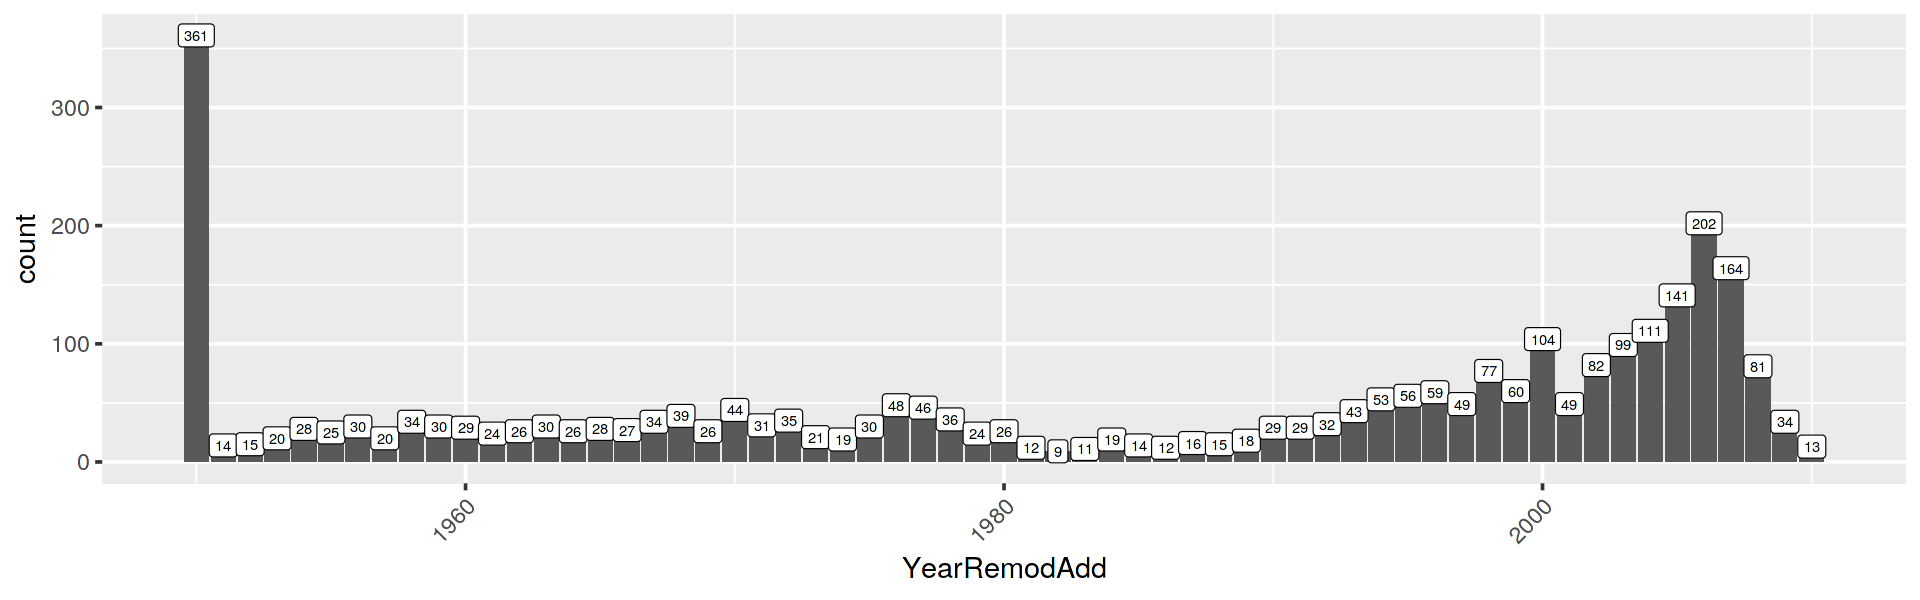

In [32]:
for (i in (1:18)){

    n <- ggplot(data=dataMe[qualVarsM], aes_string(x=qualVarsM[i])) +
            geom_bar(stat='count')+
            geom_label(stat = "count", aes(label = ..count.., y = ..count..), size=3)+
            theme(axis.text.x = element_text(angle = 45, hjust = 1))
    options(repr.plot.width = 16, repr.plot.height = 5)
    print(n)
}


#### Camembert

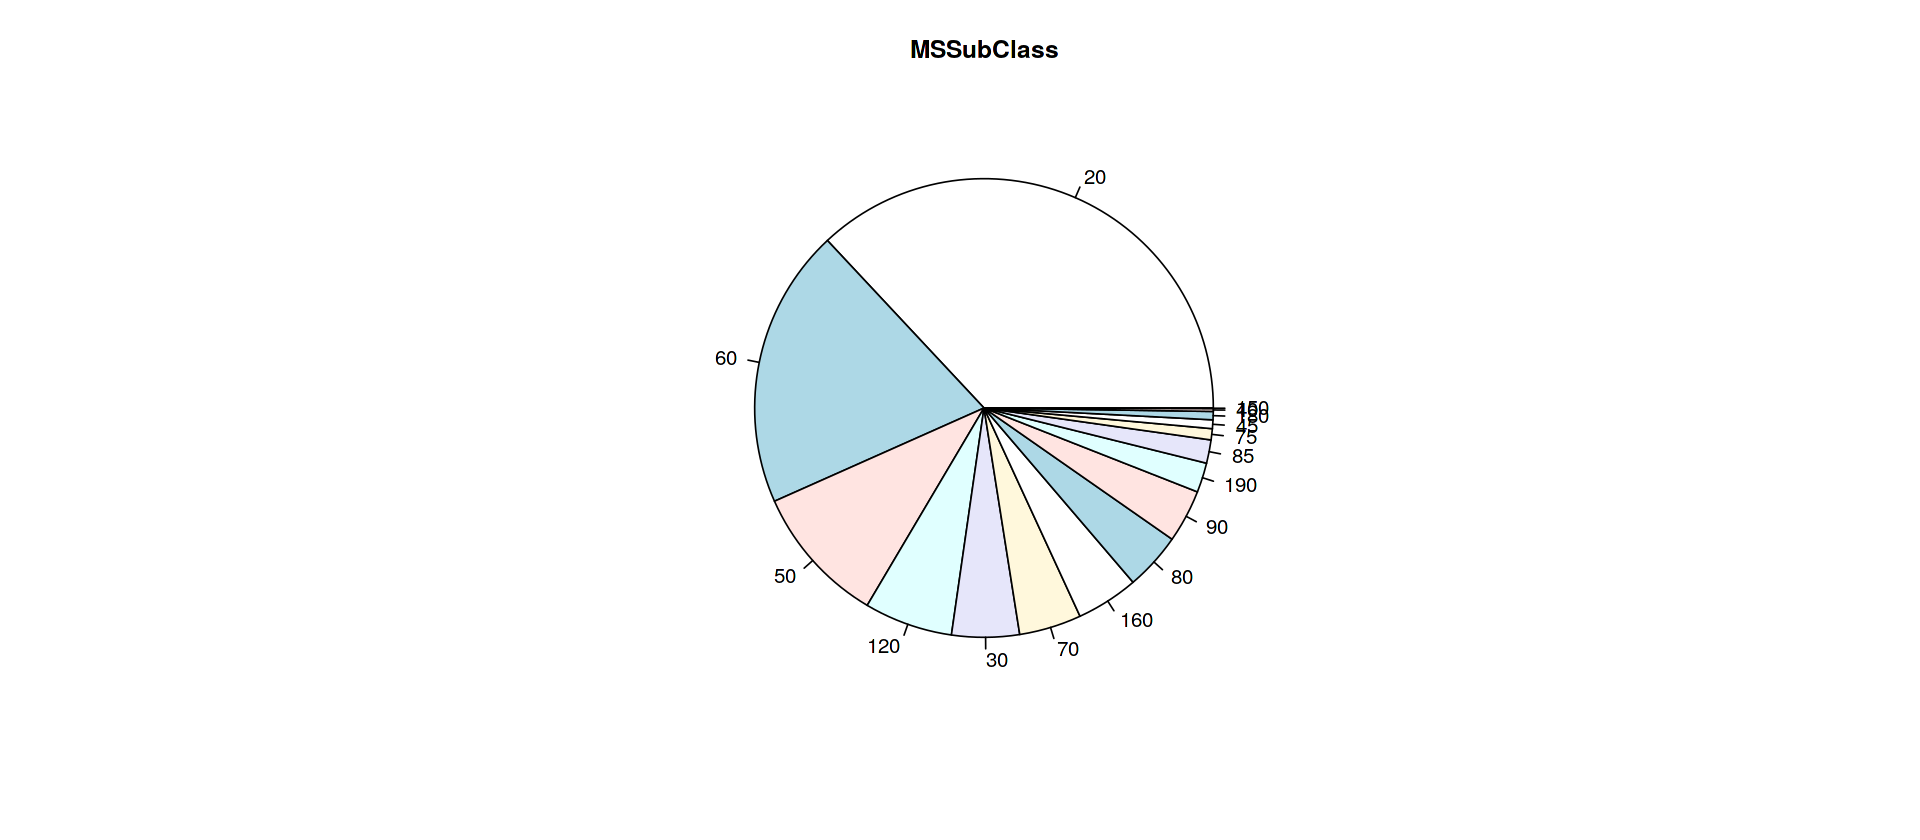

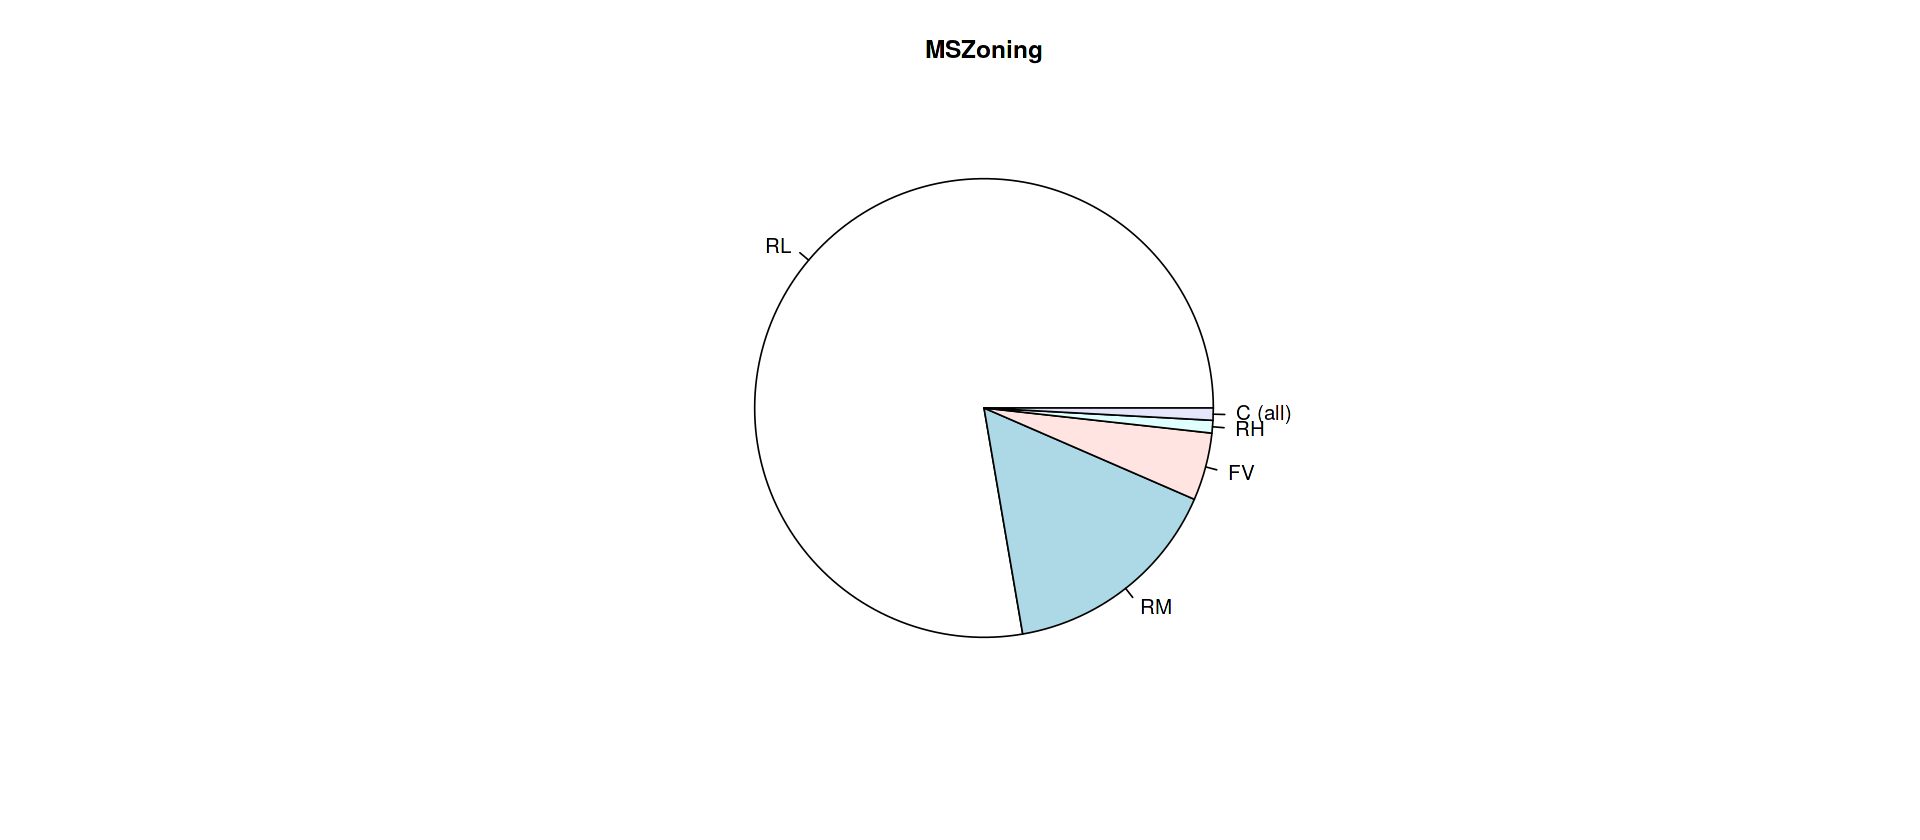

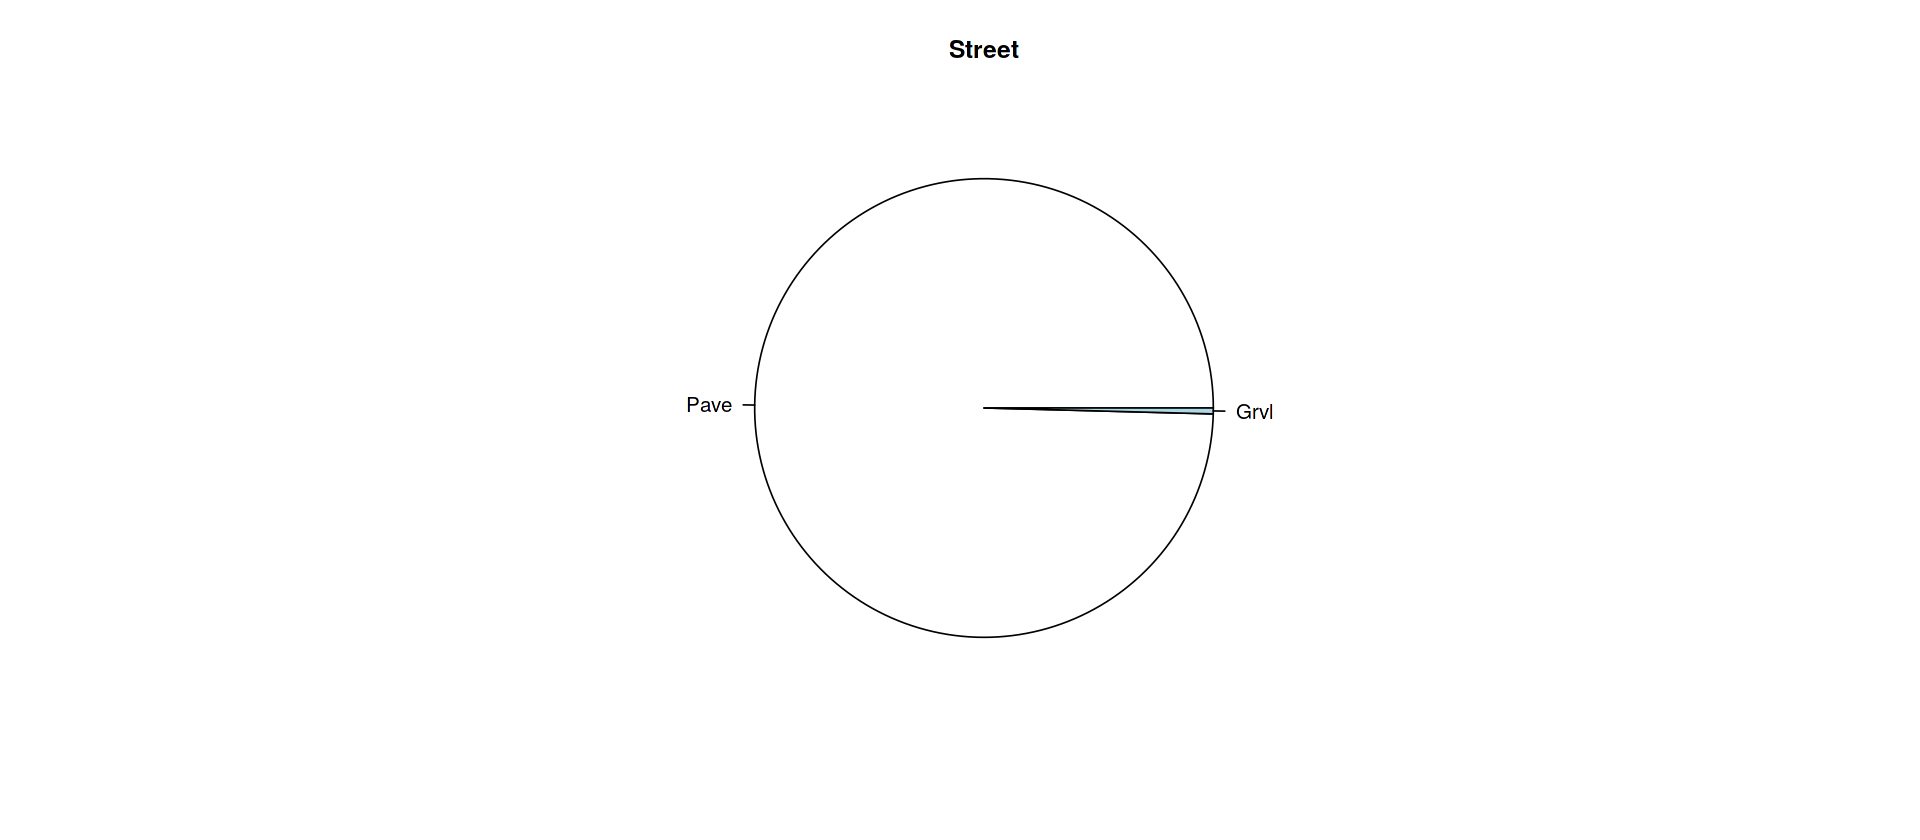

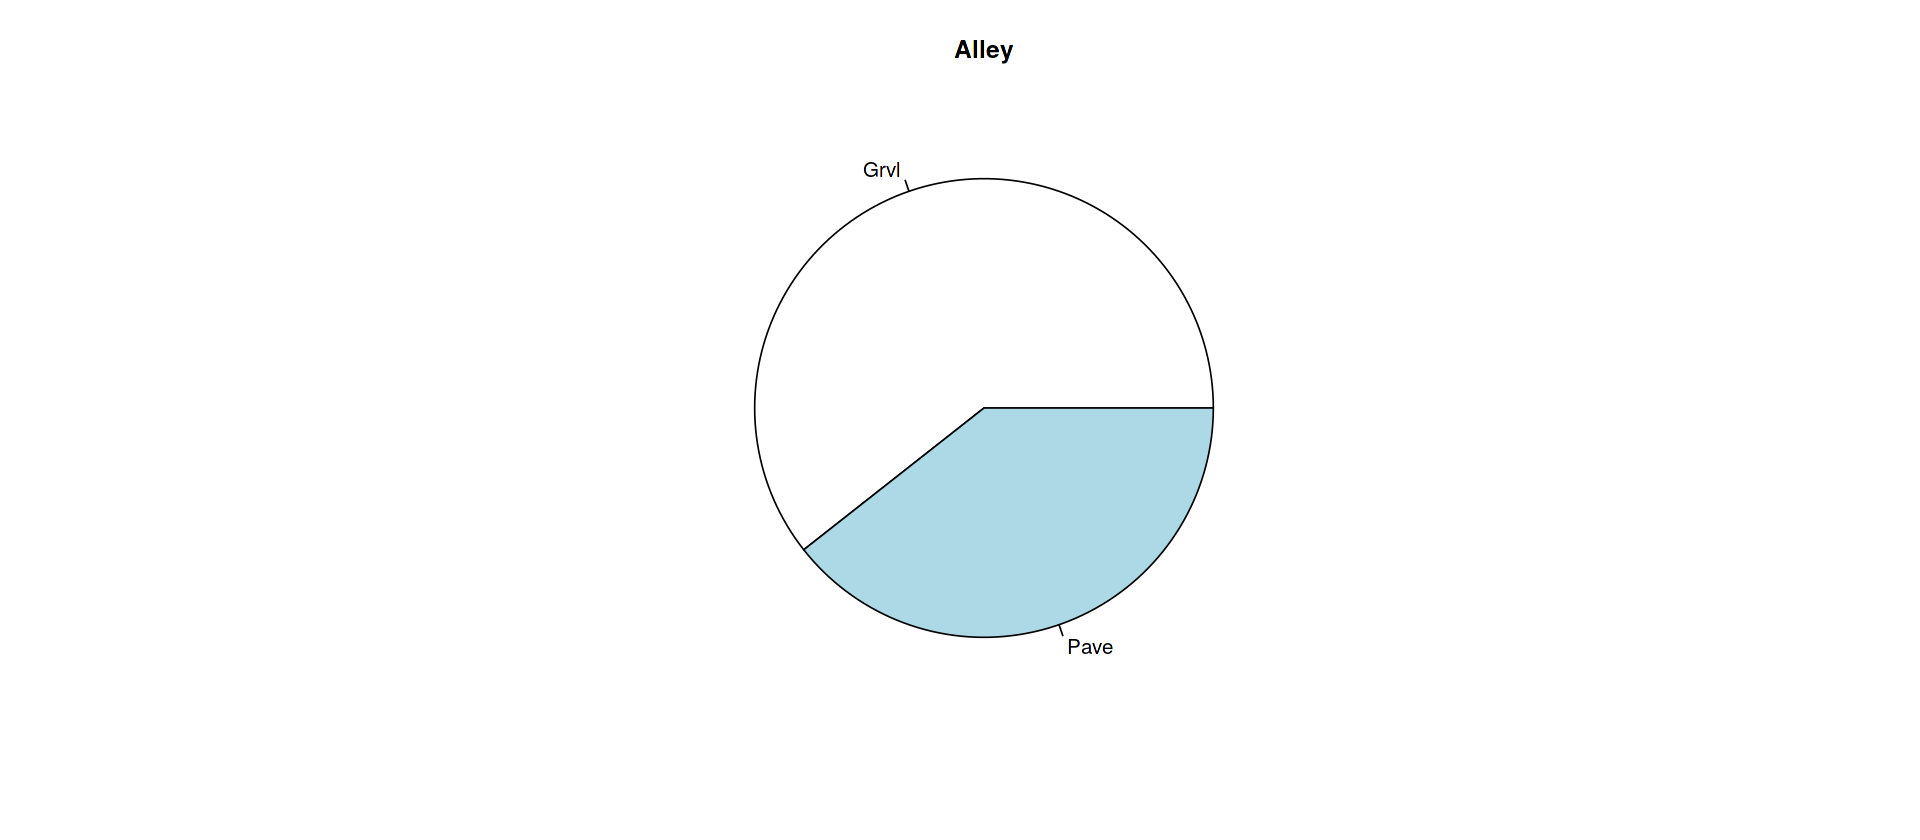

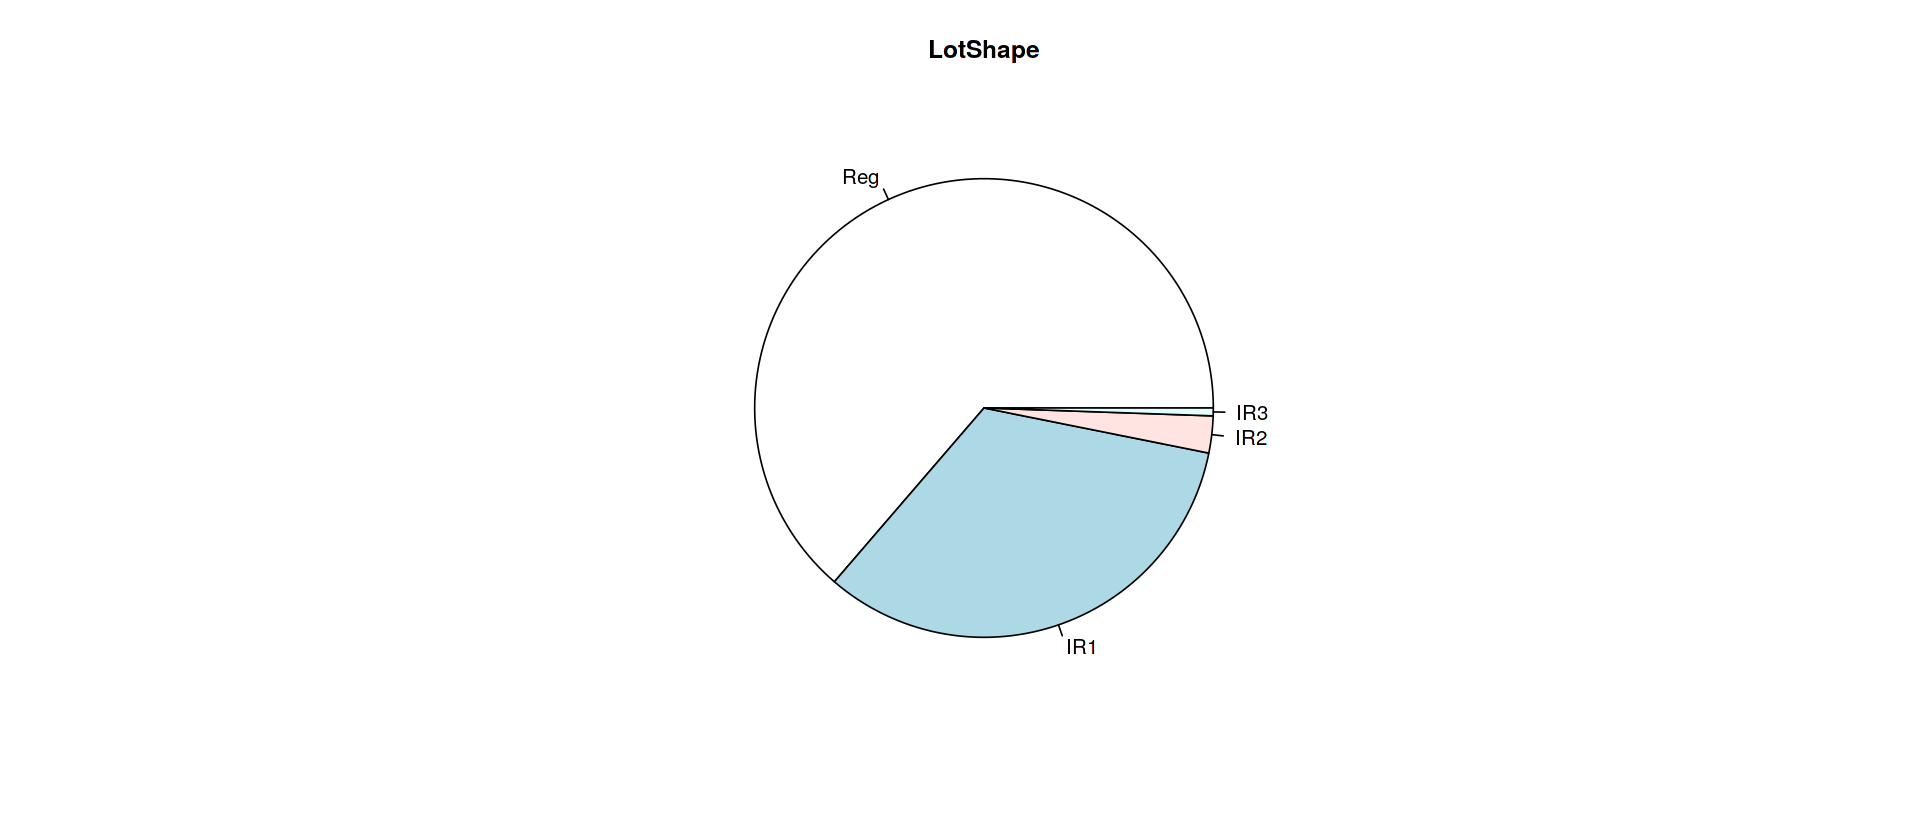

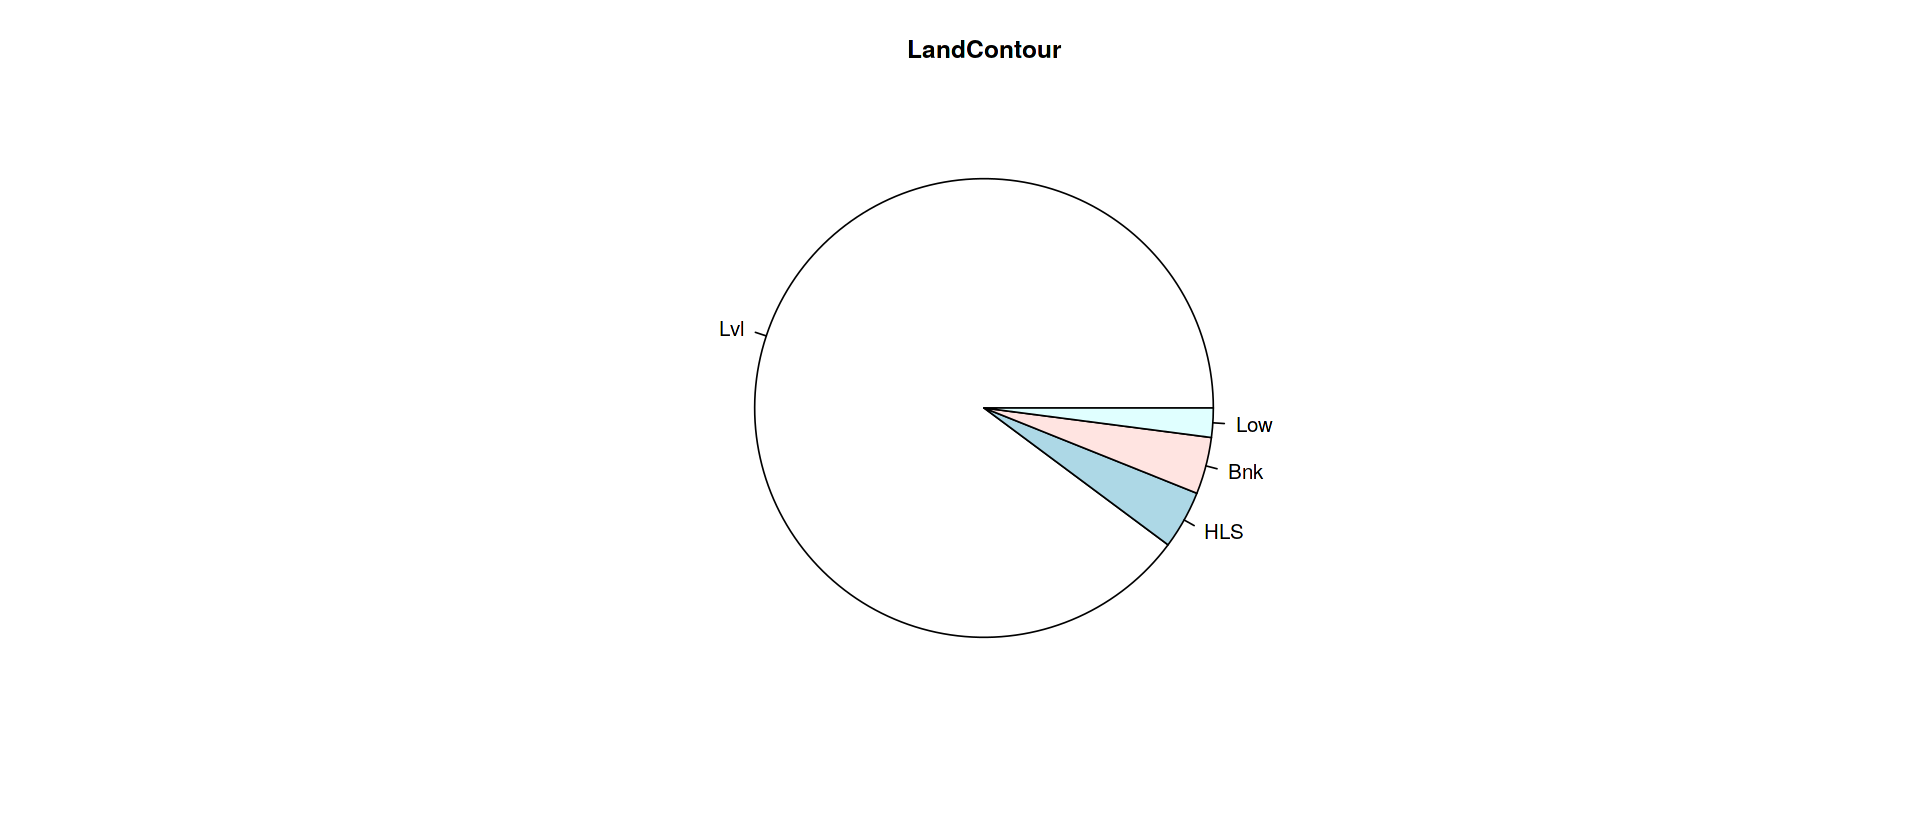

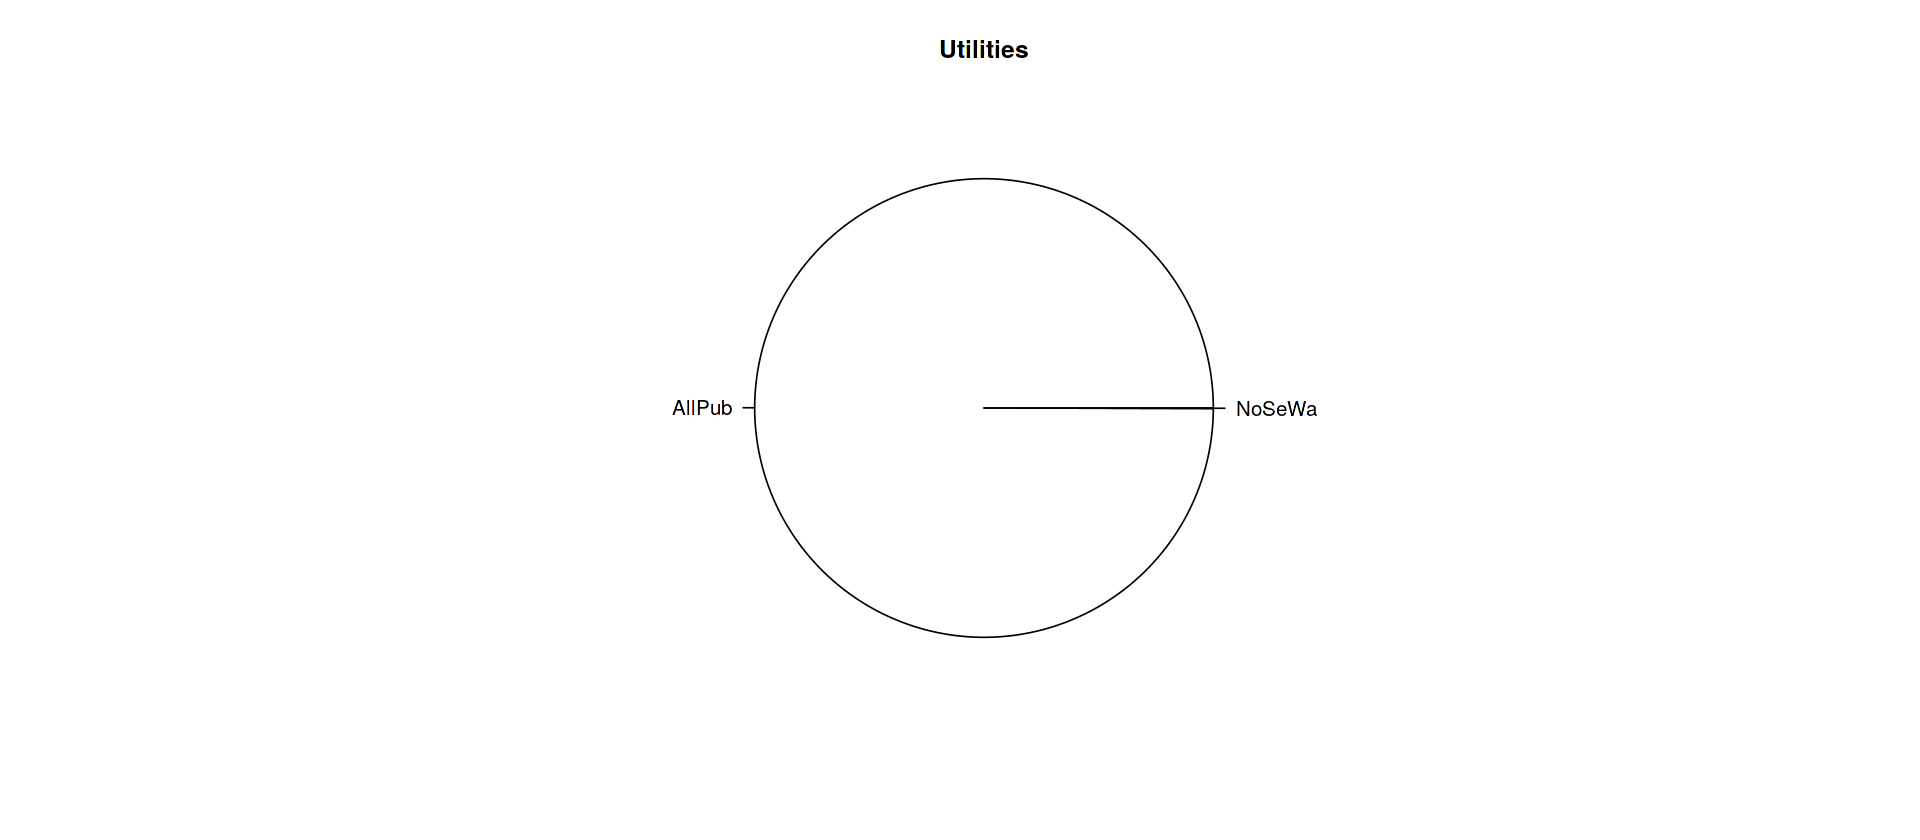

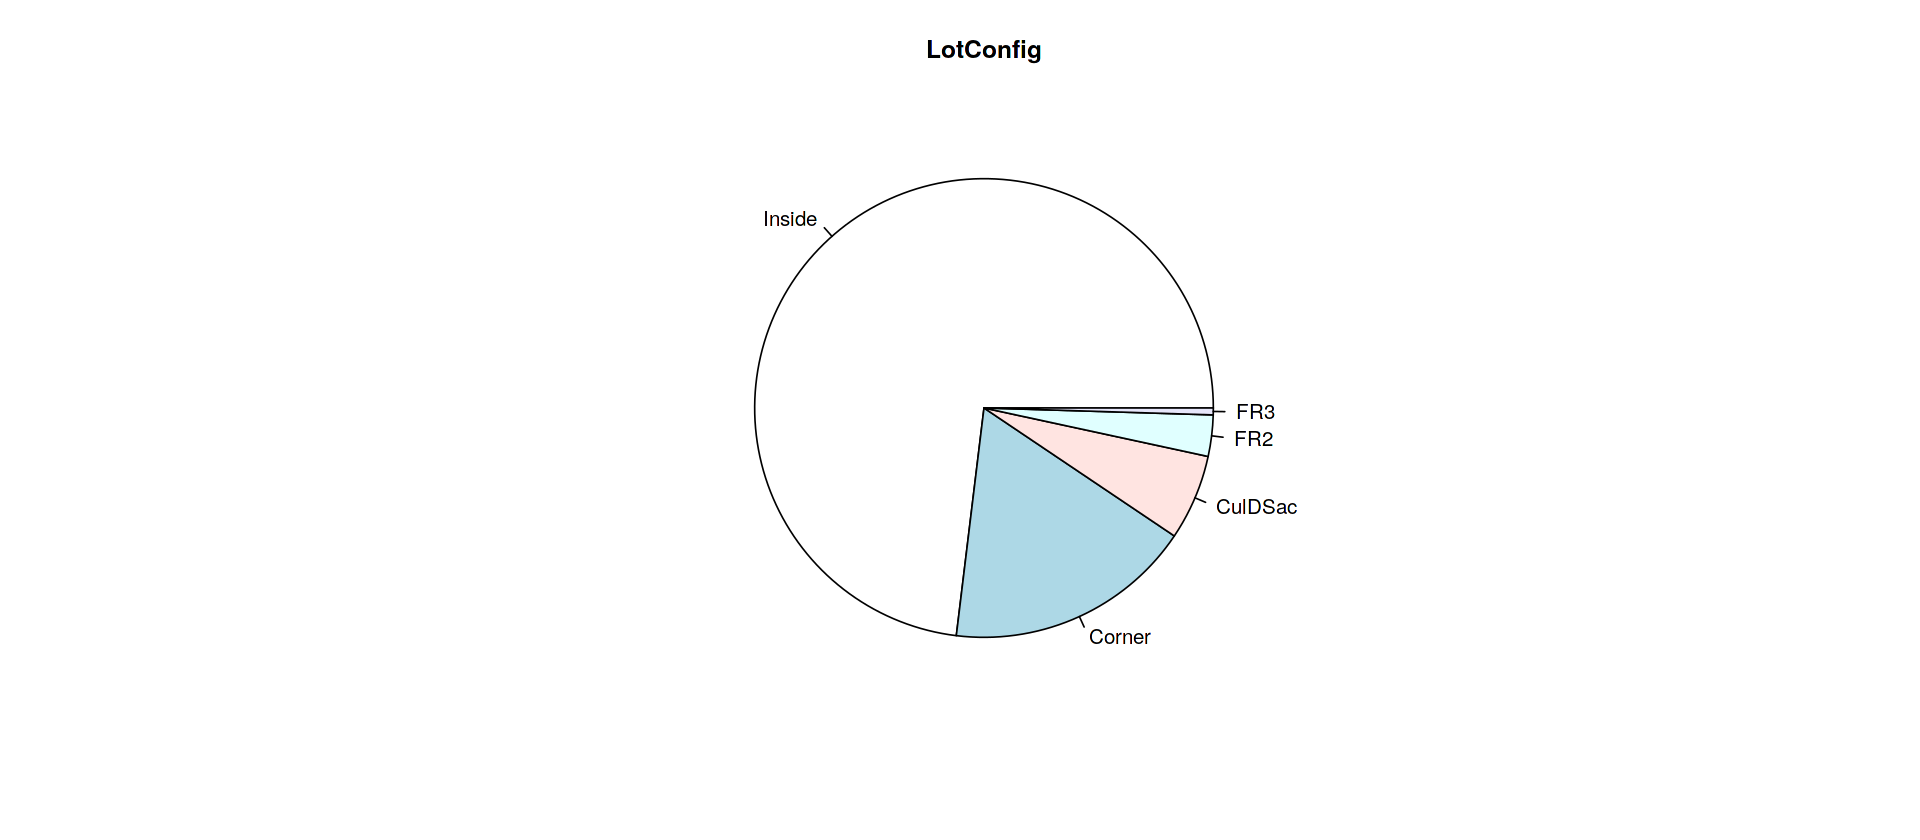

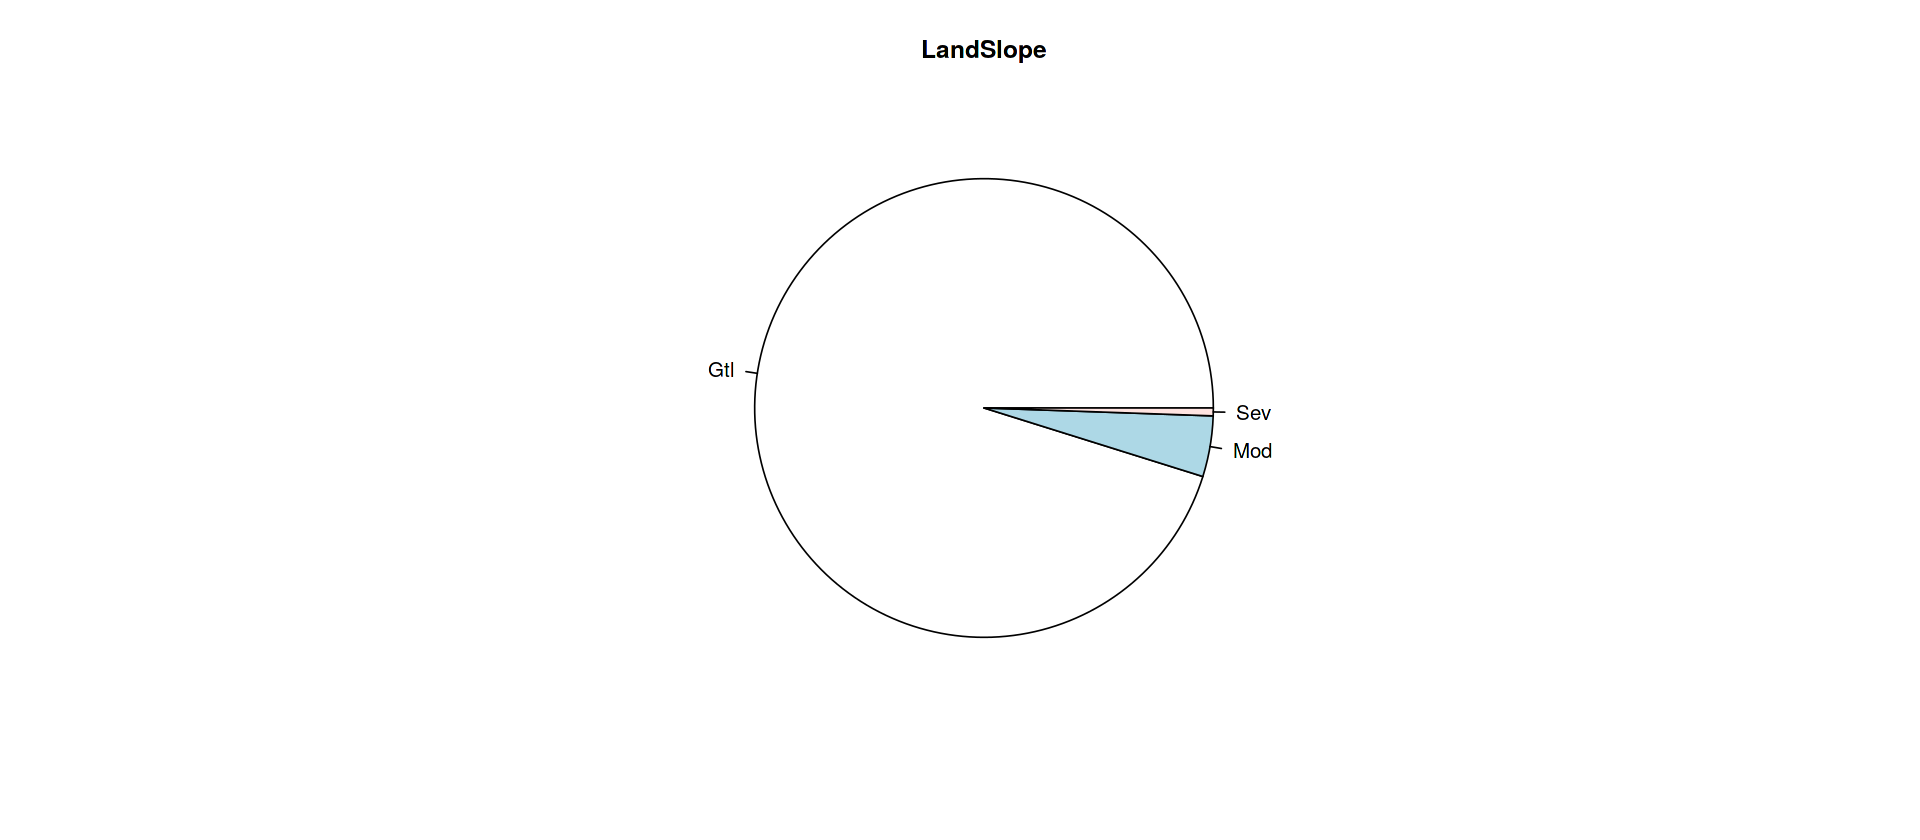

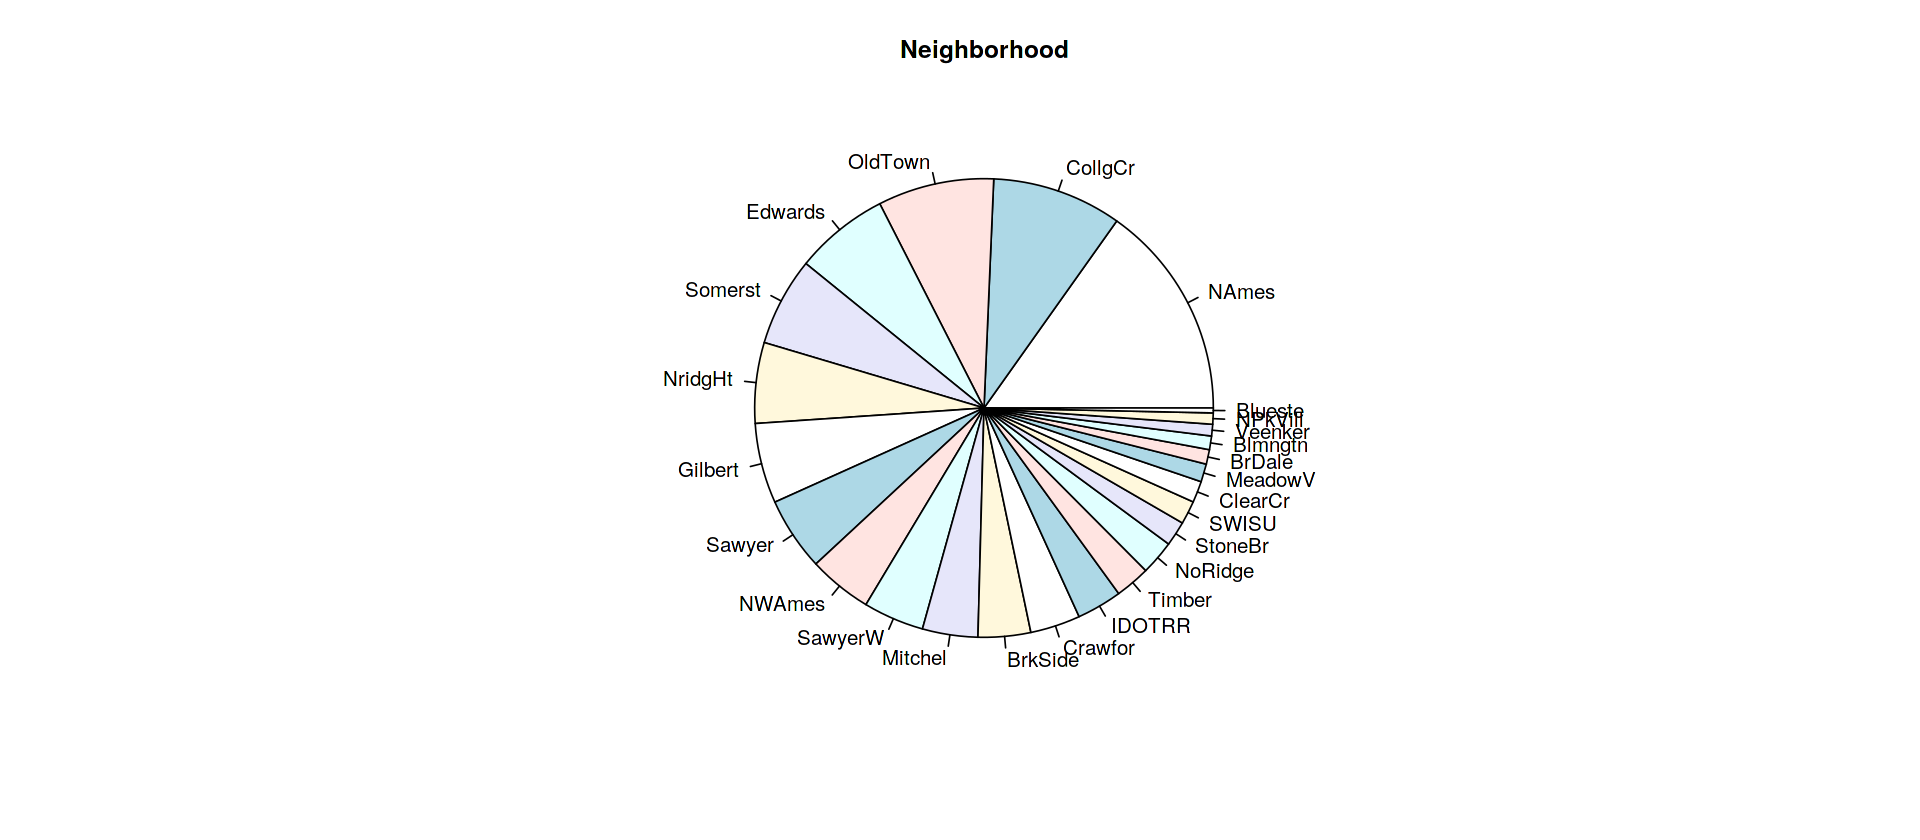

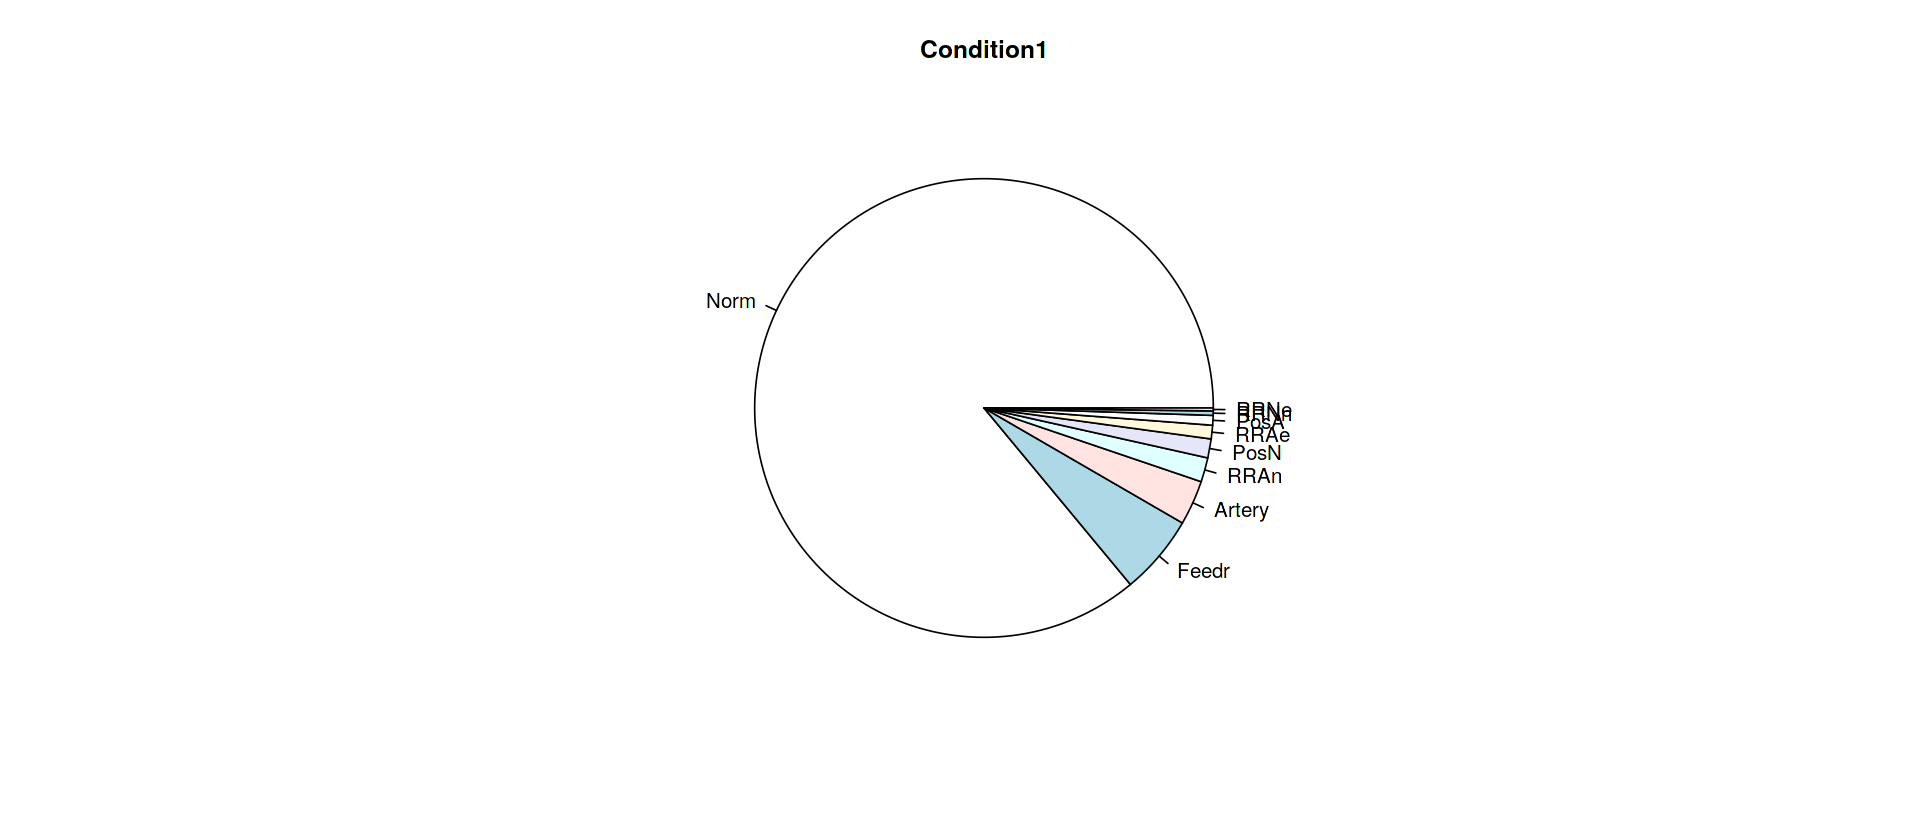

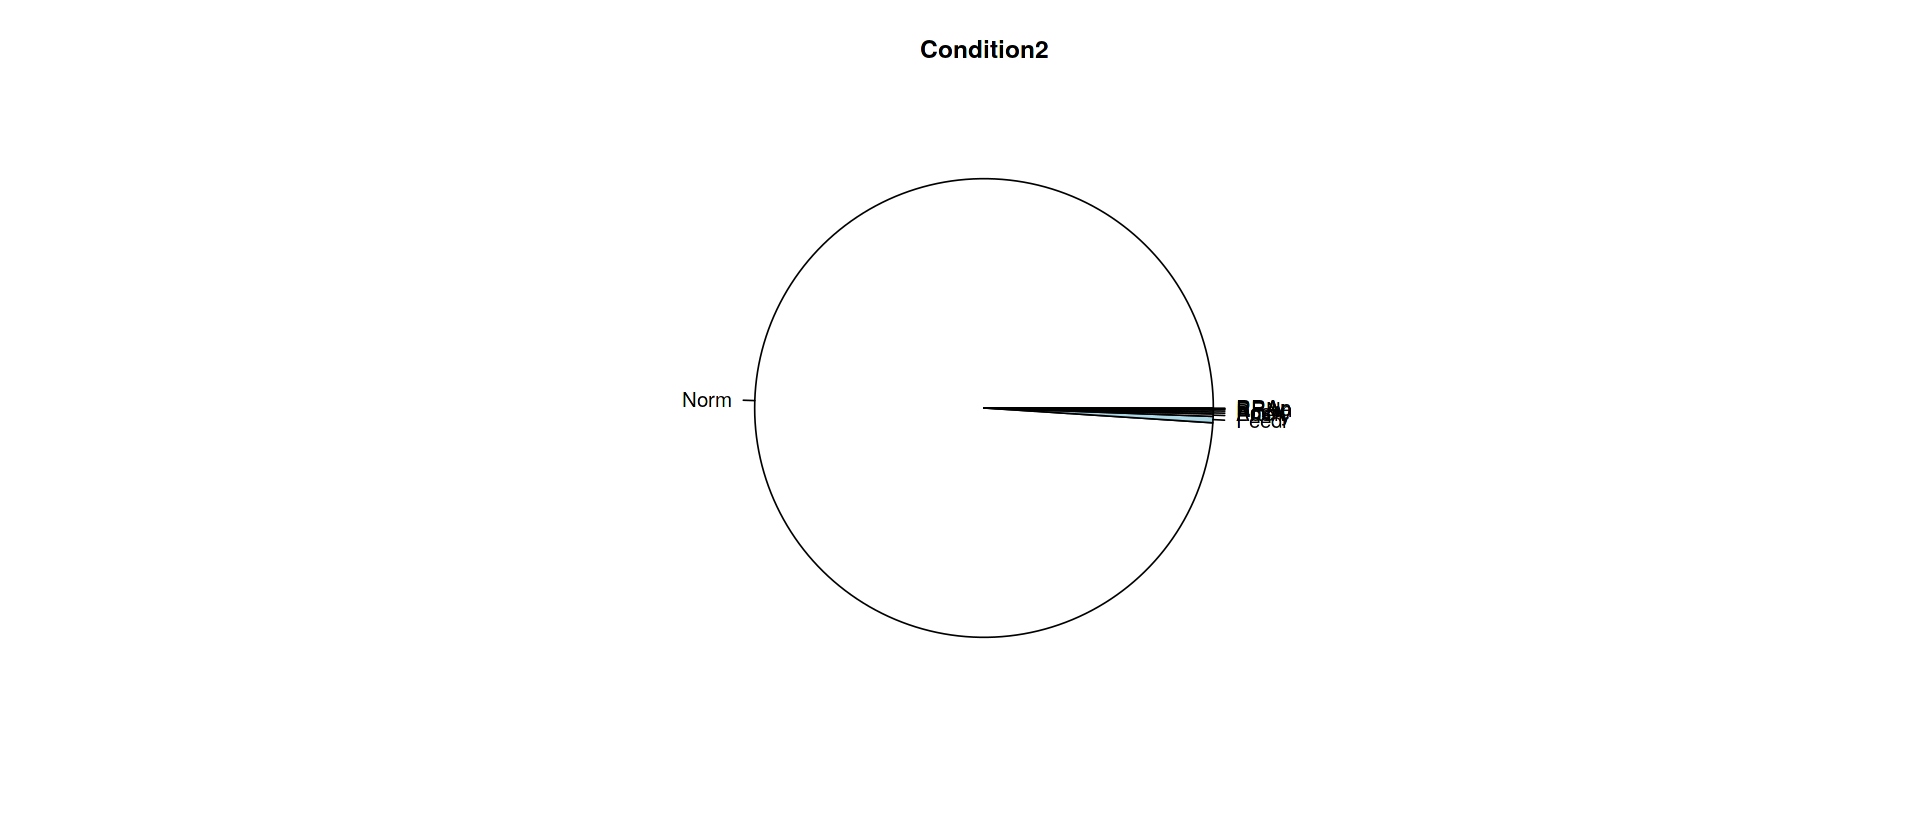

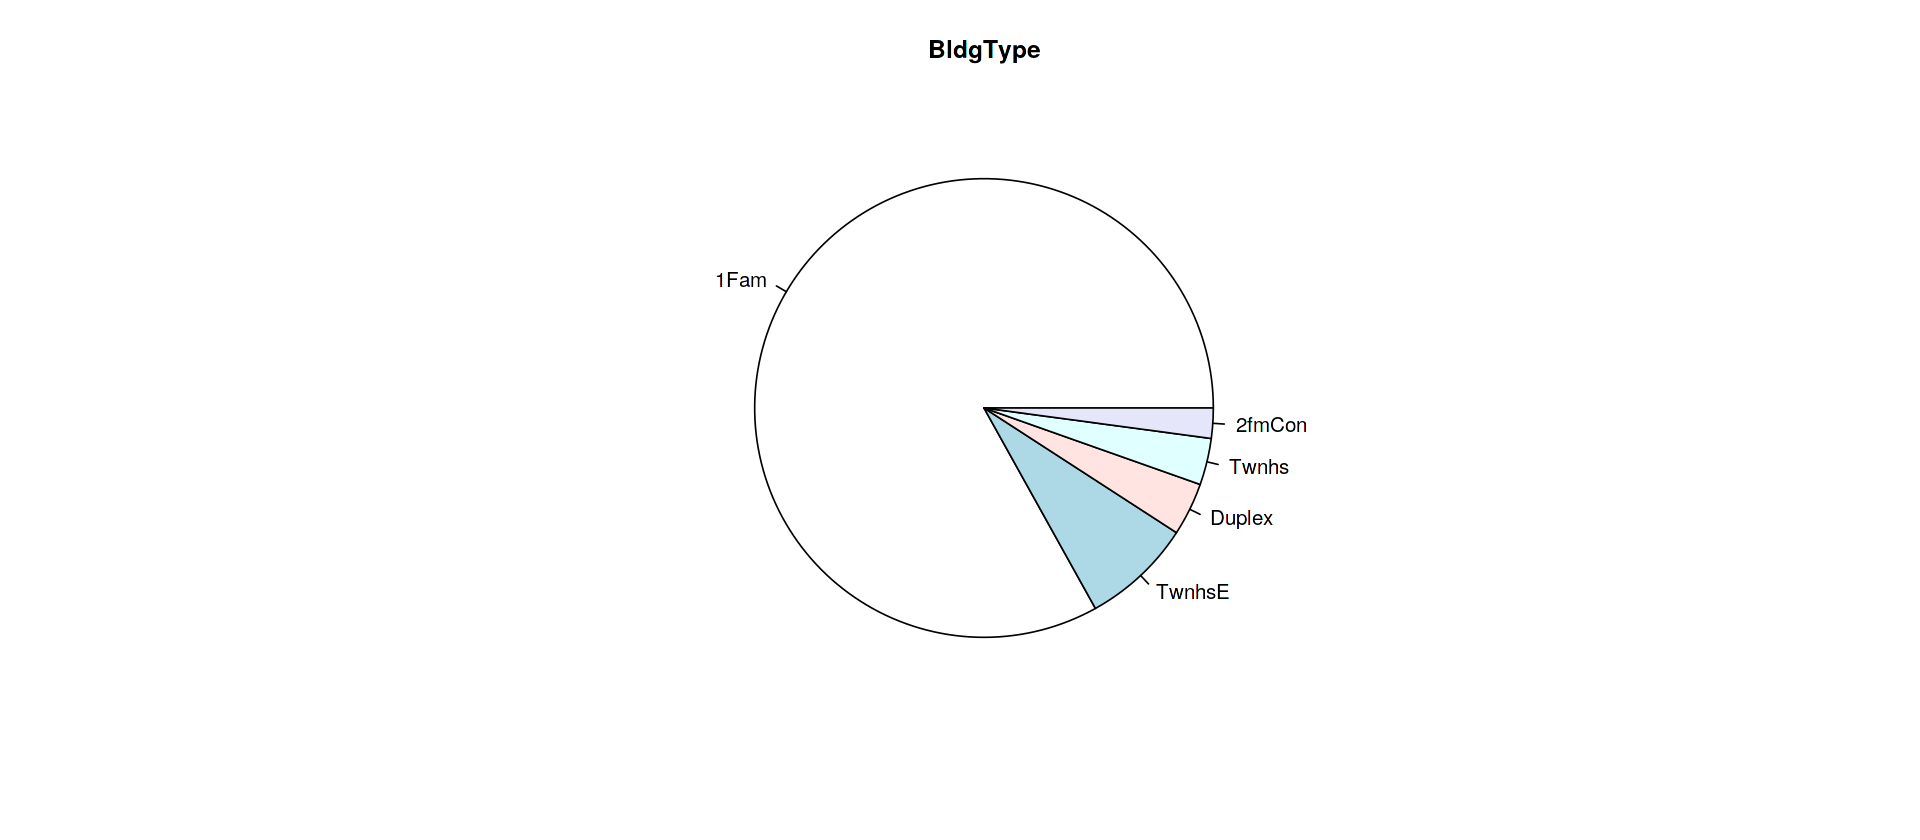

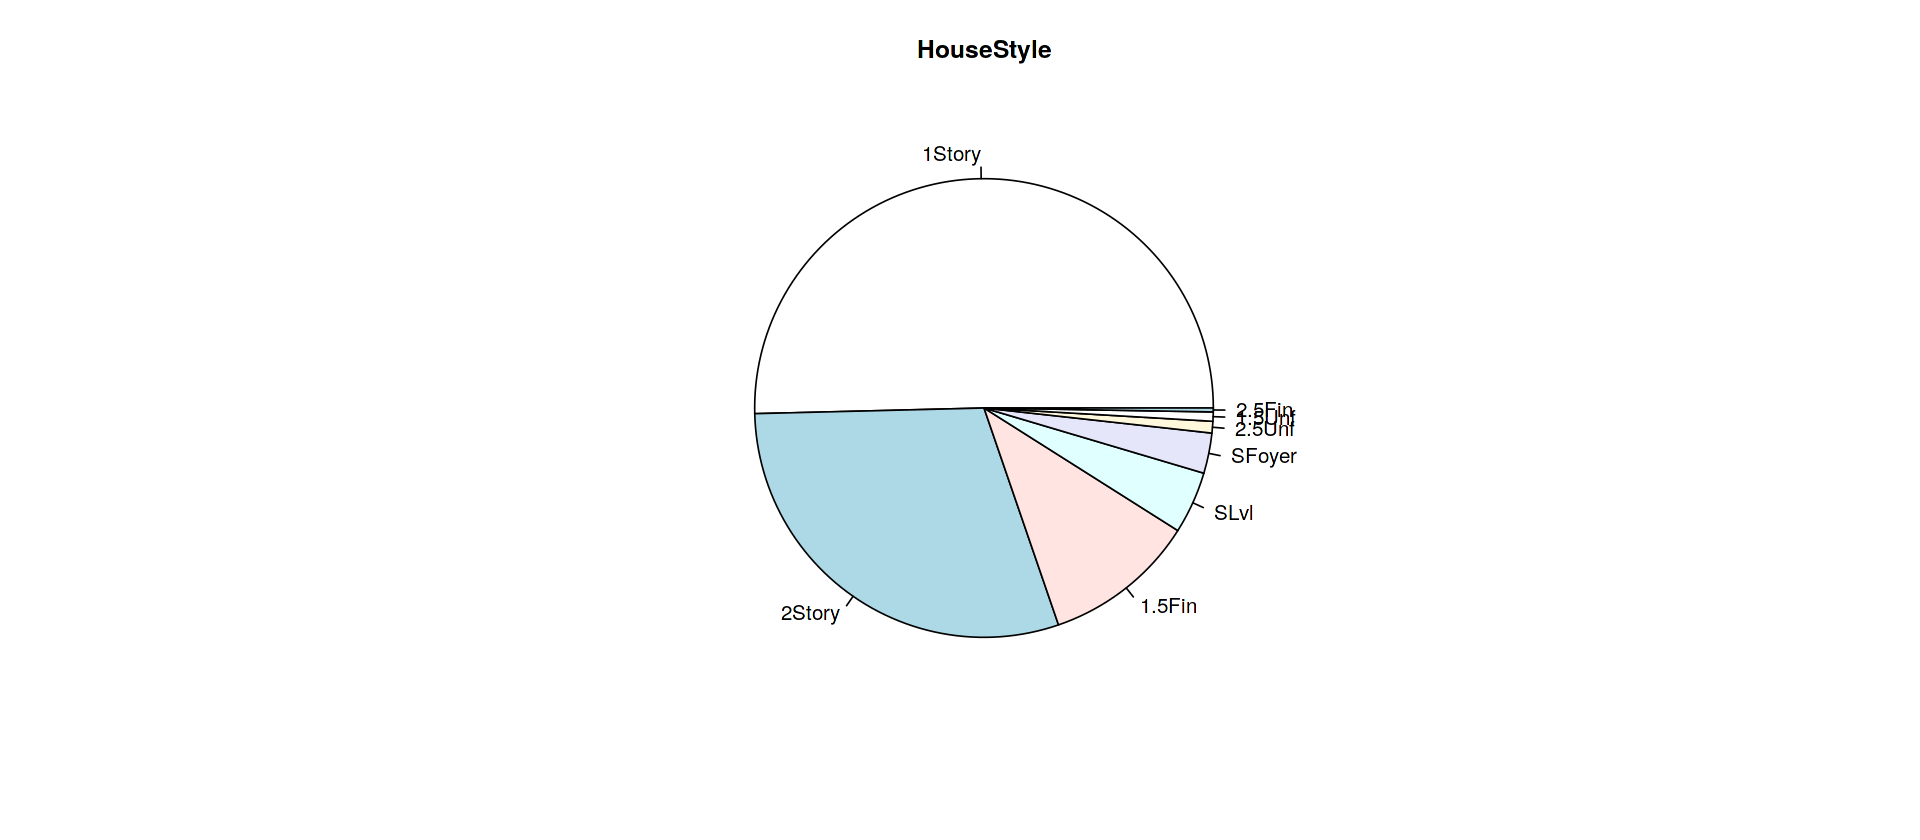

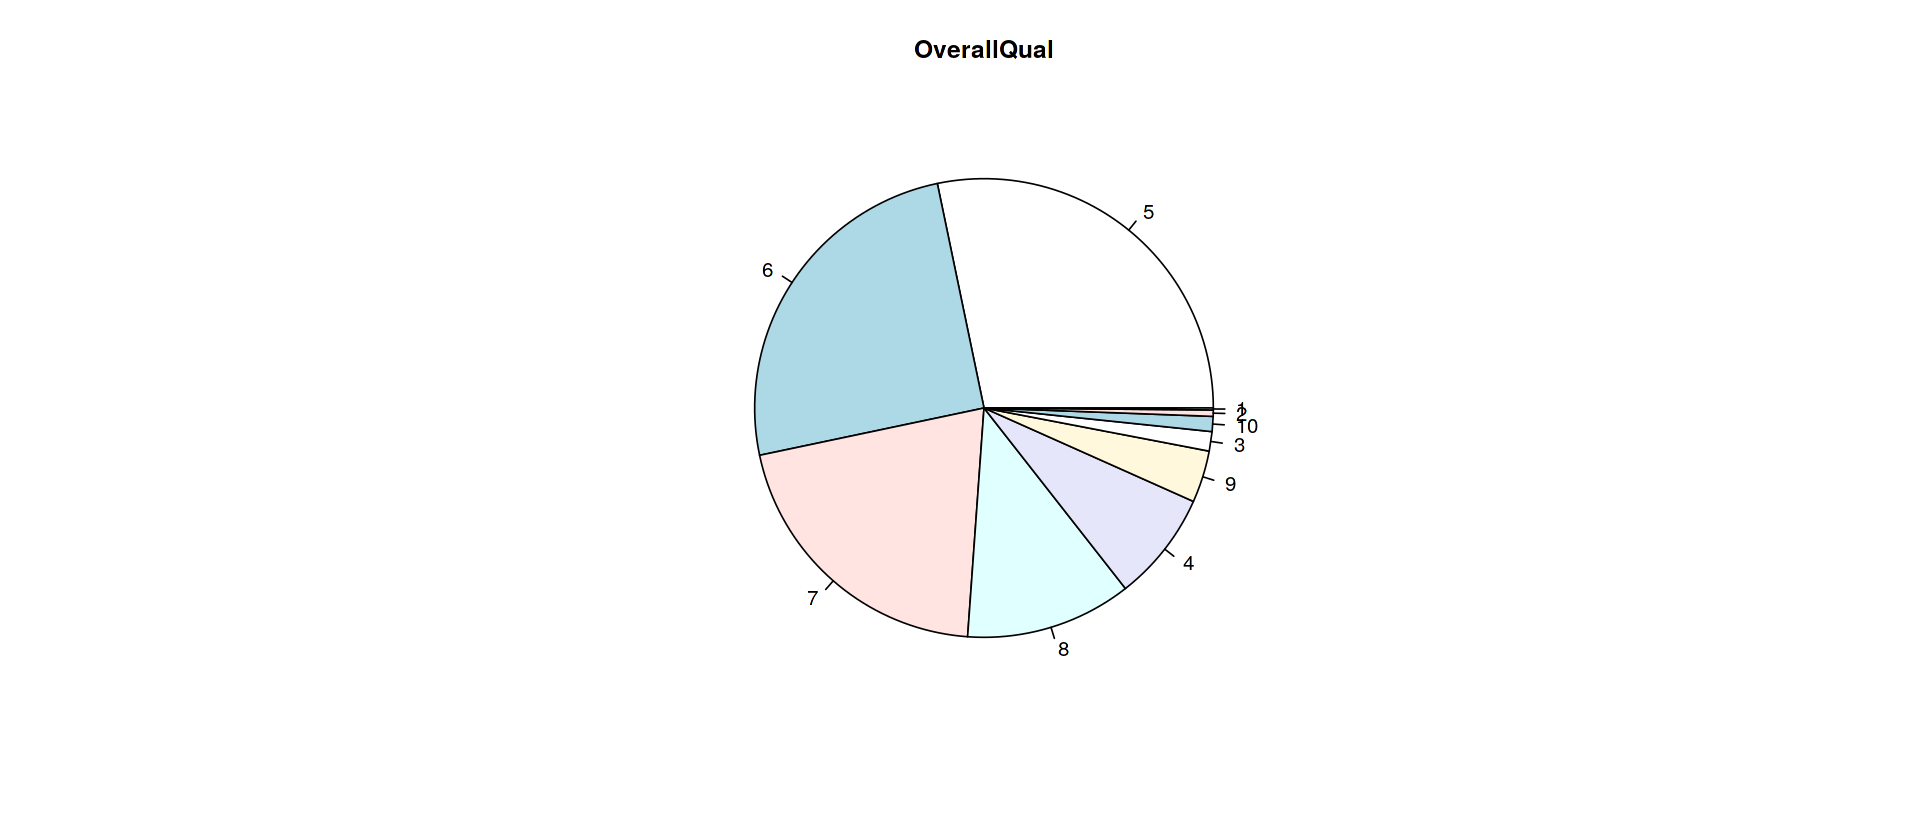

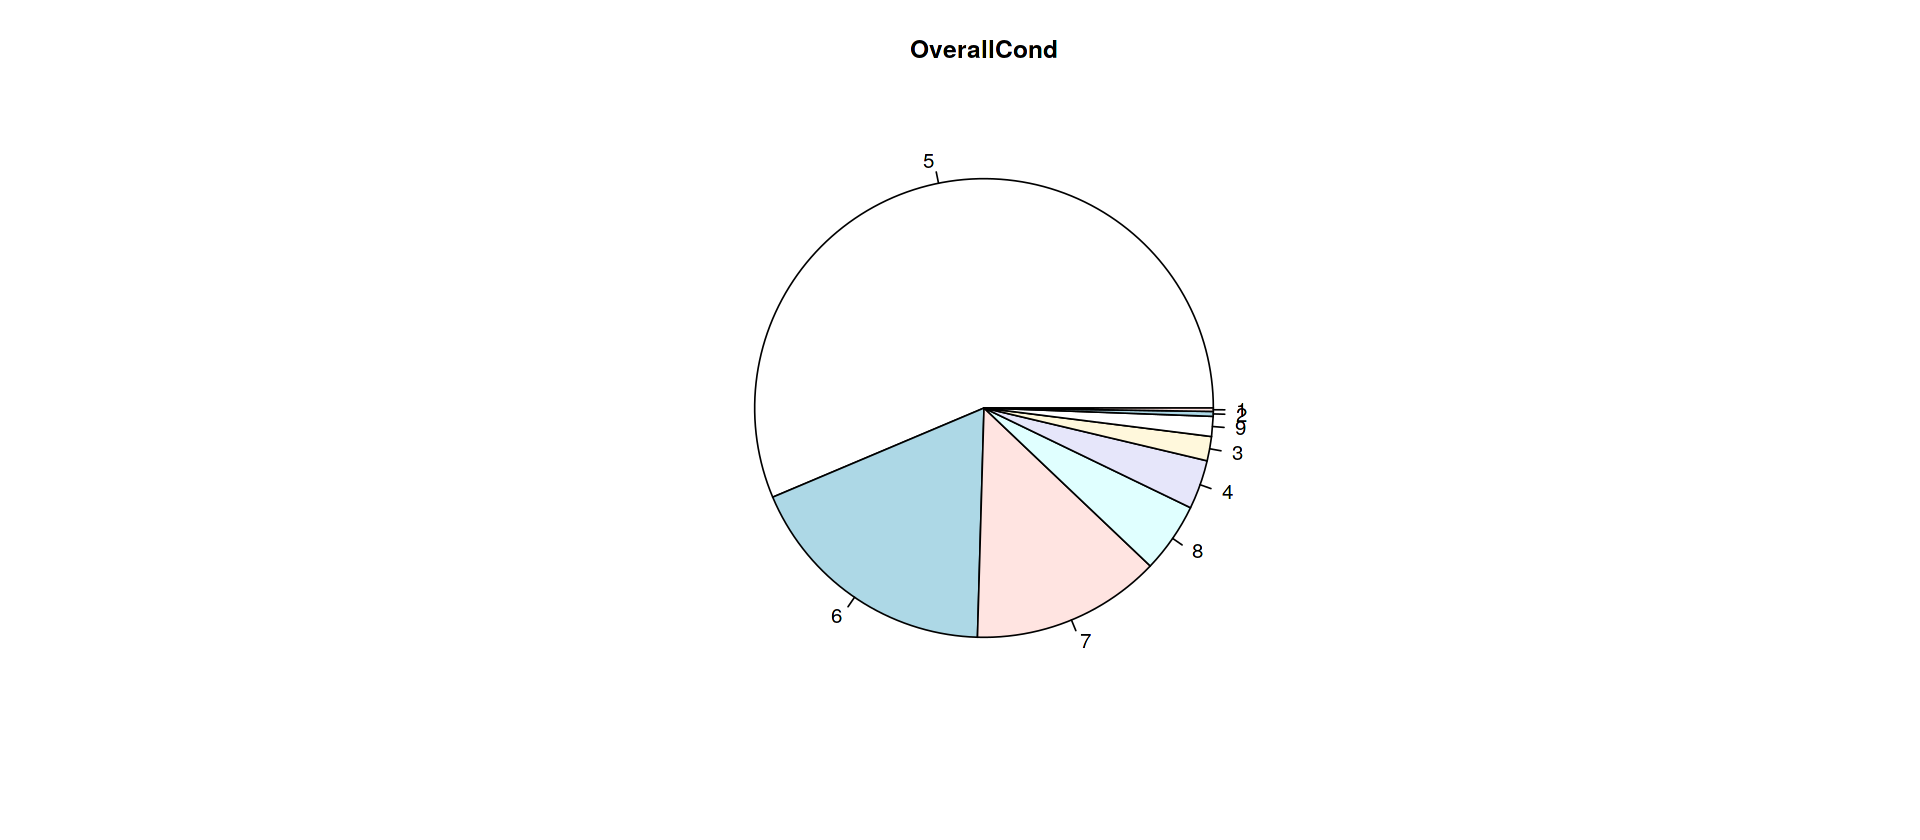

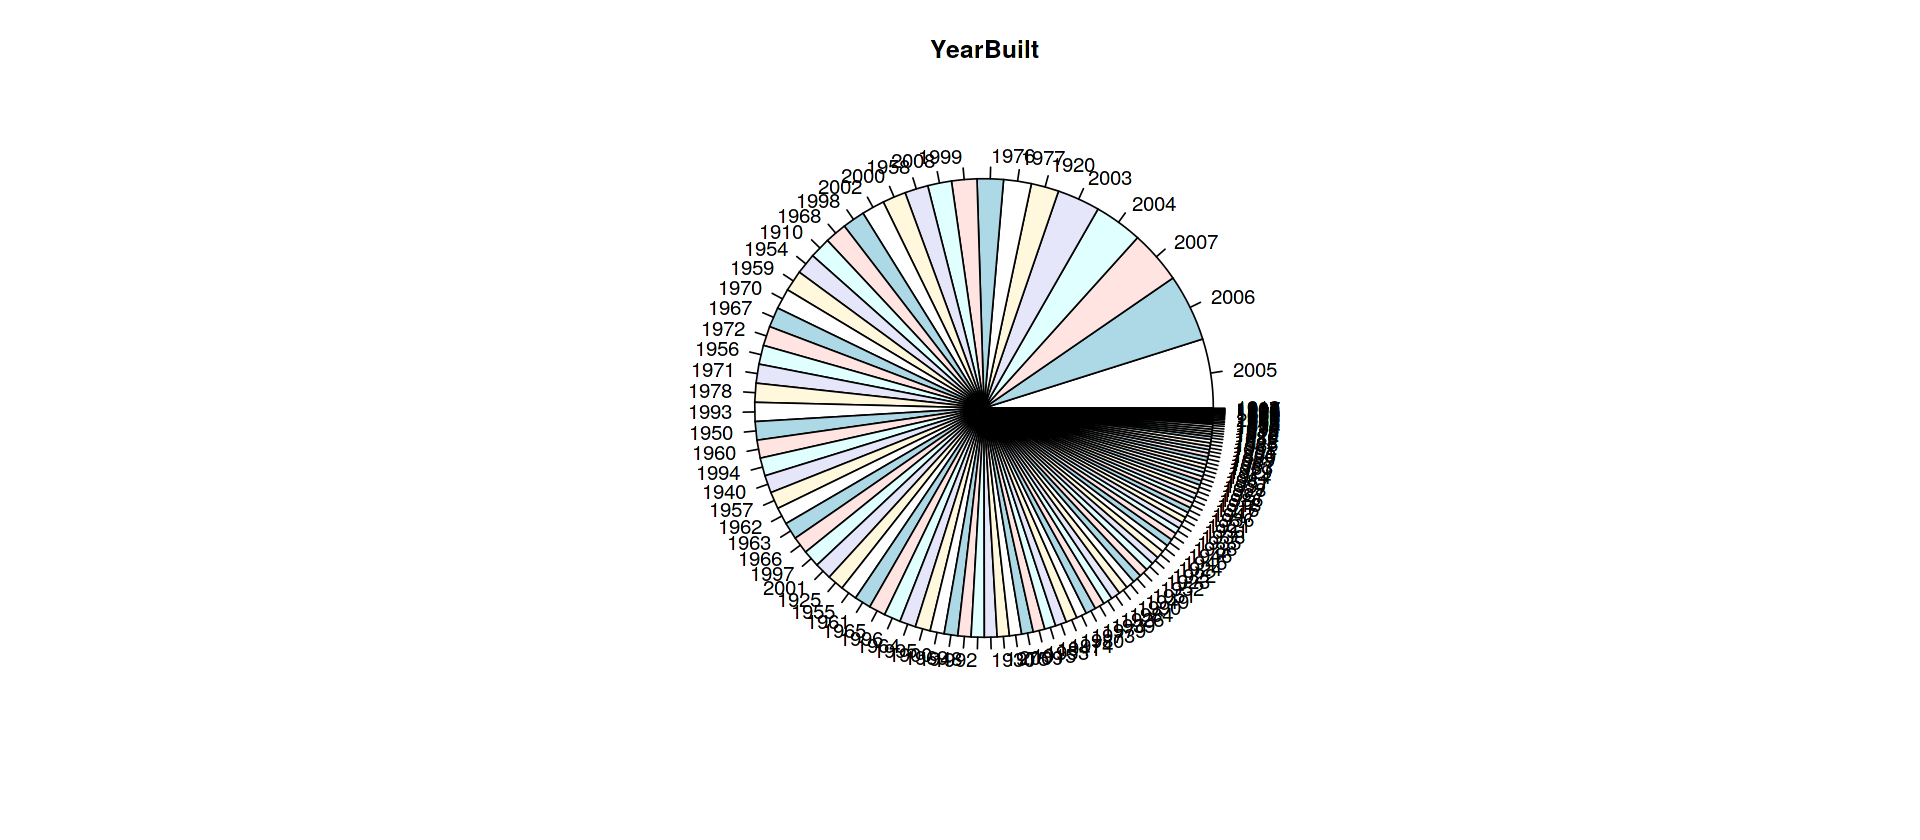

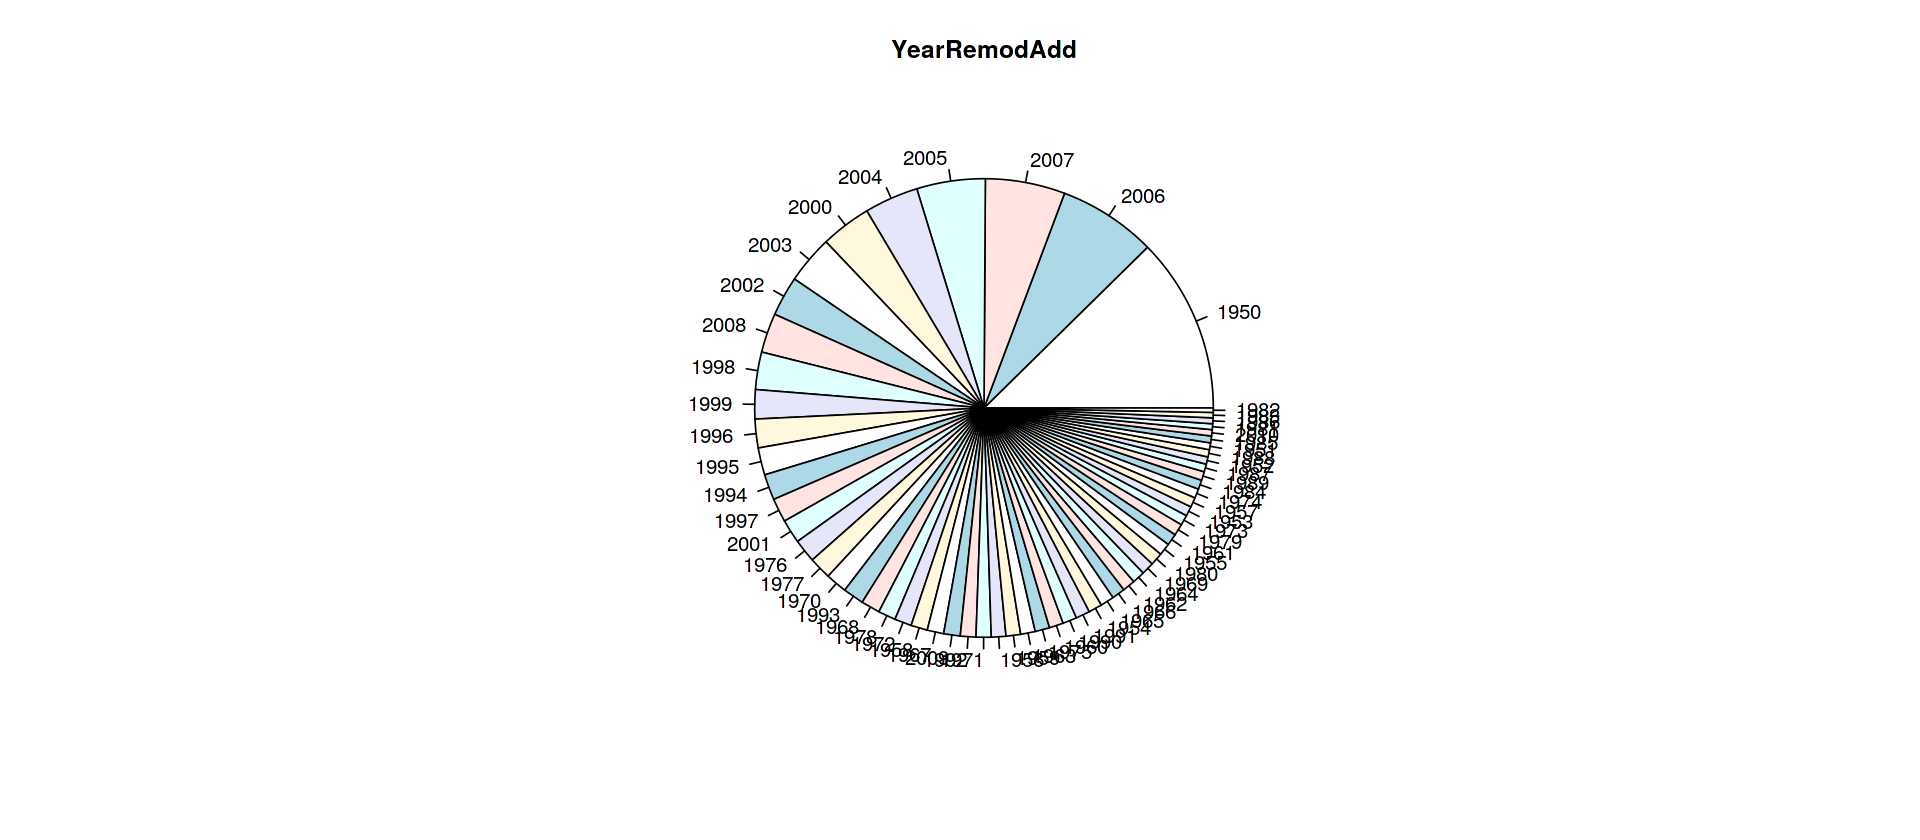

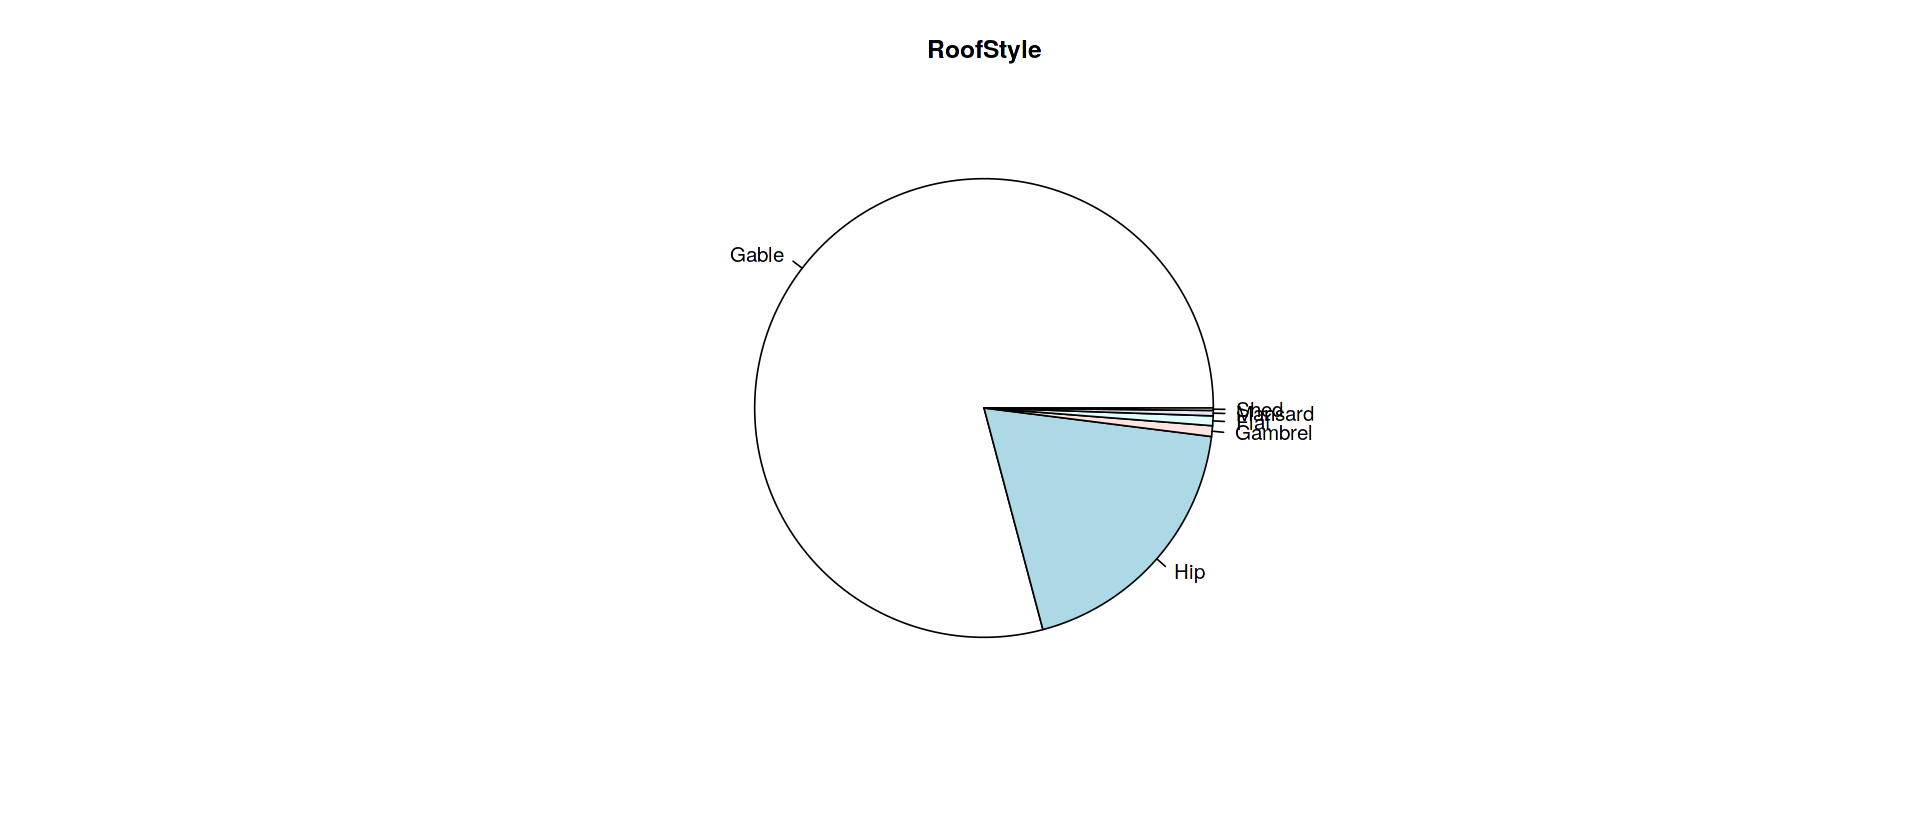

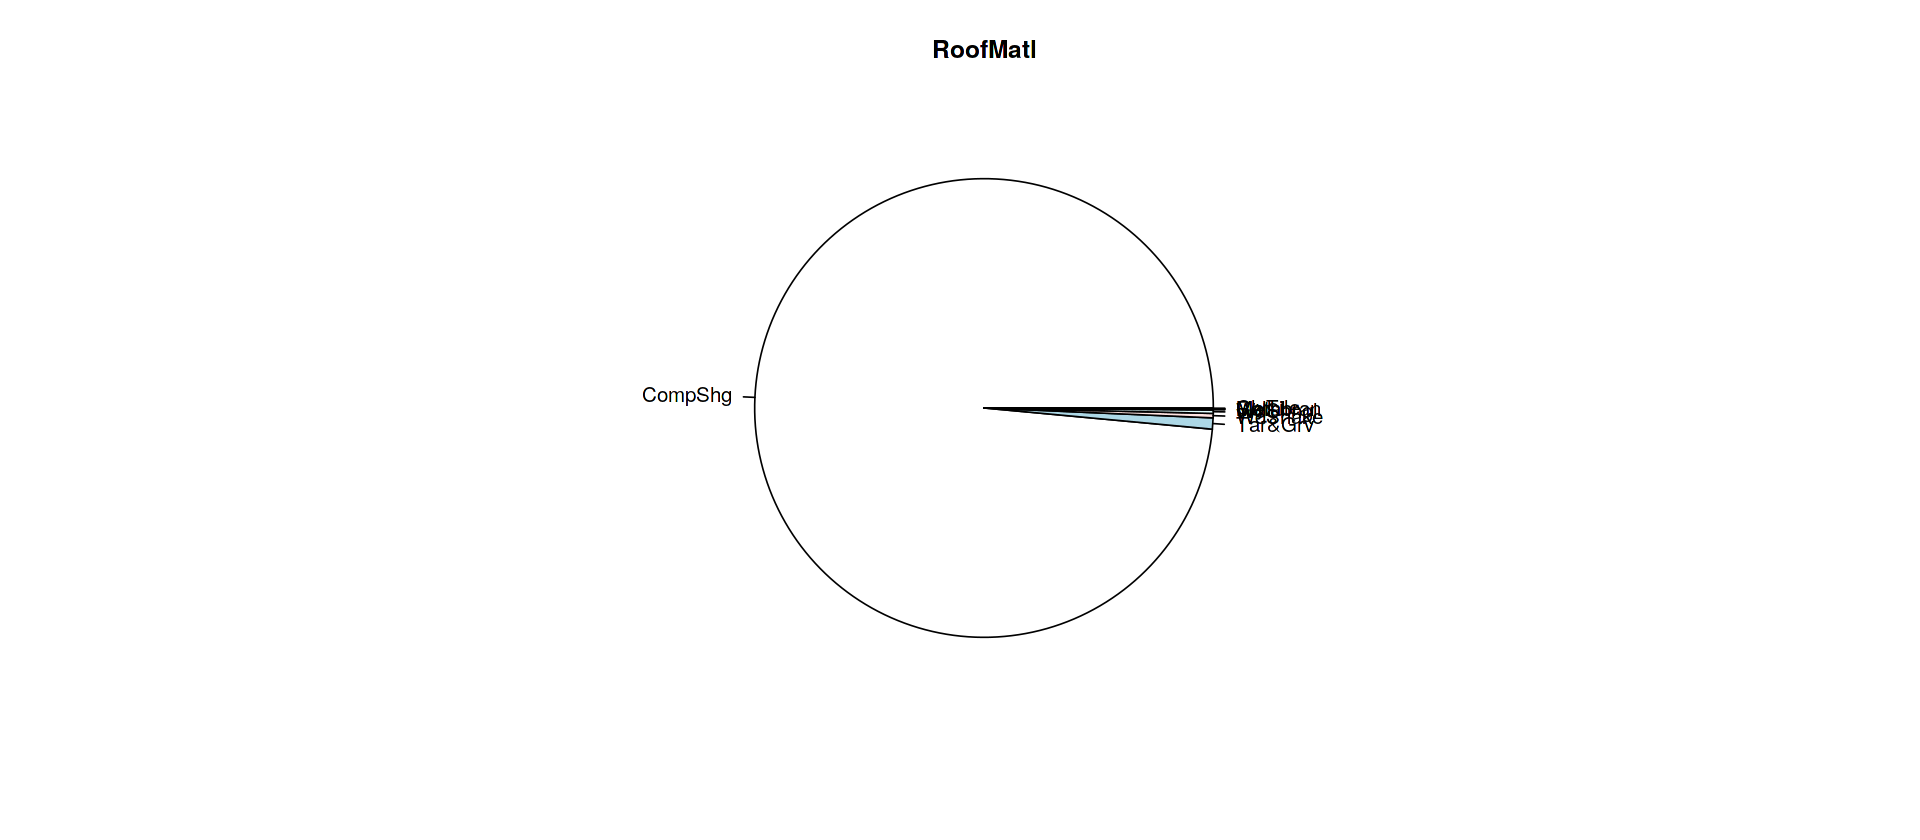

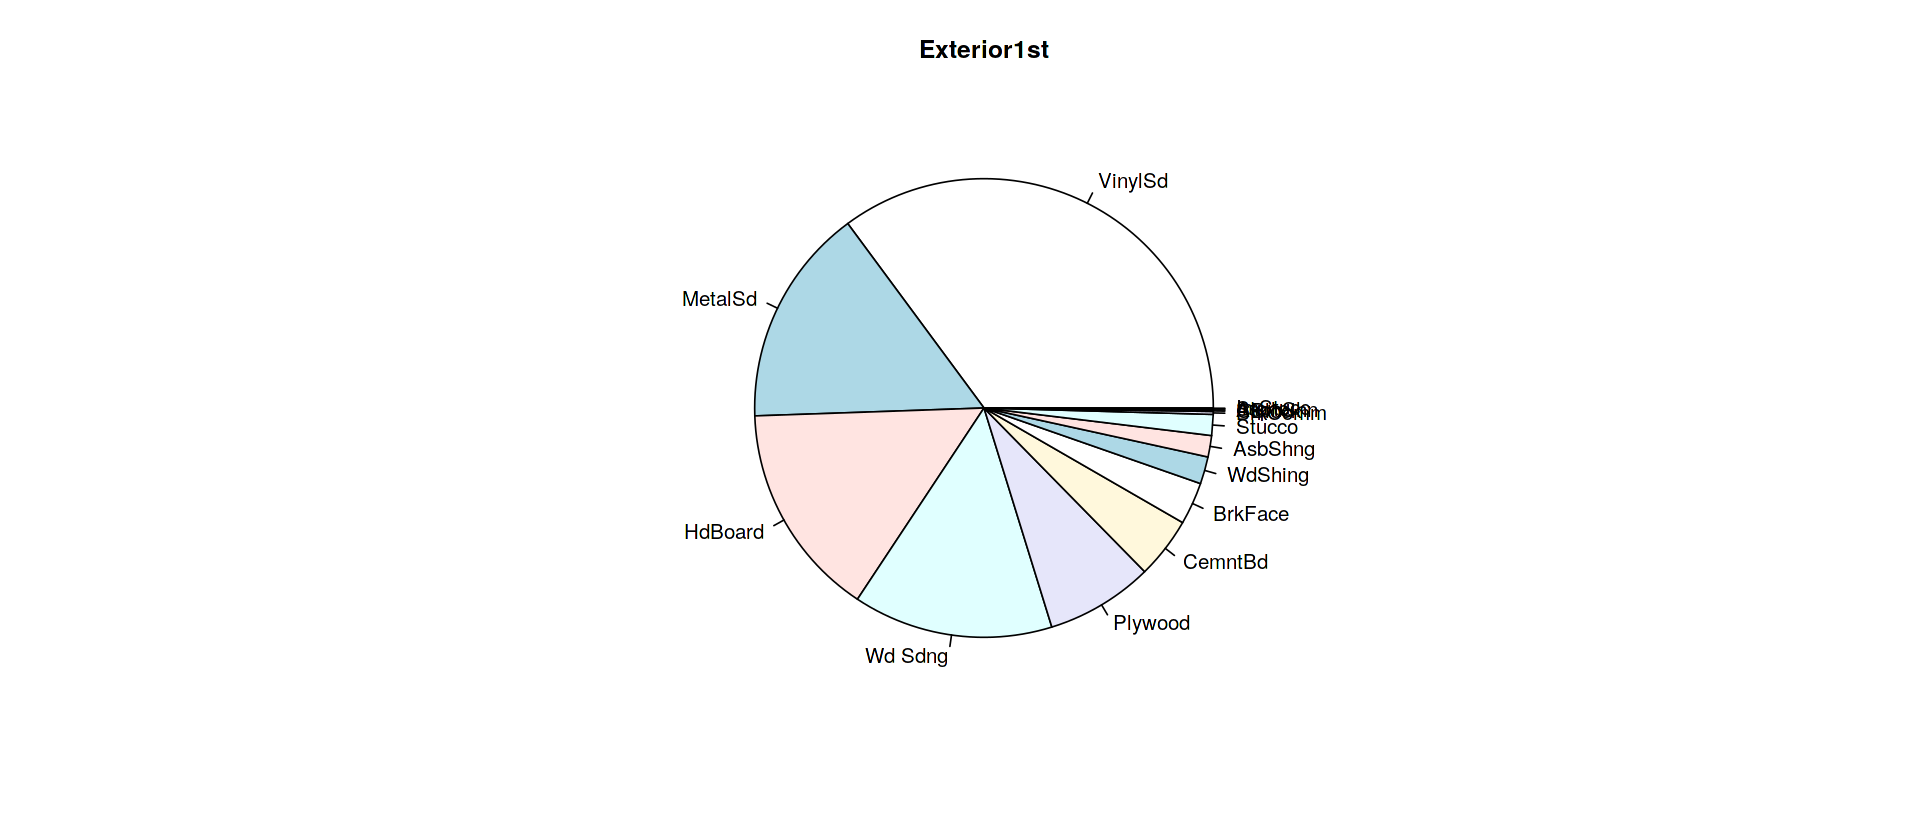

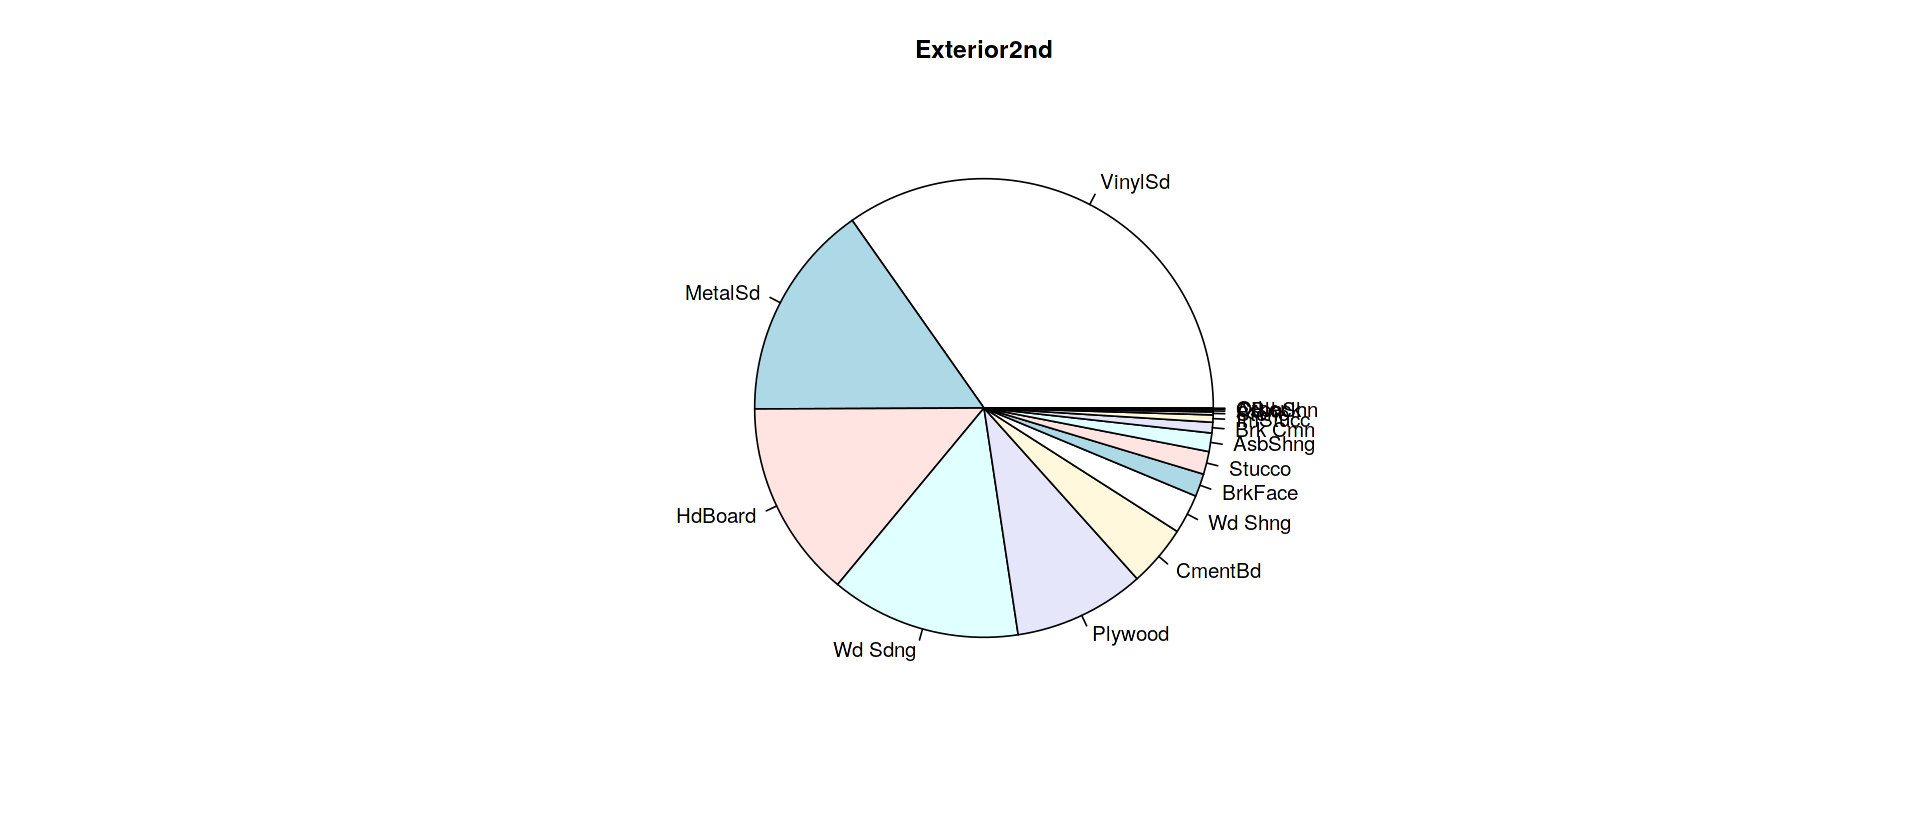

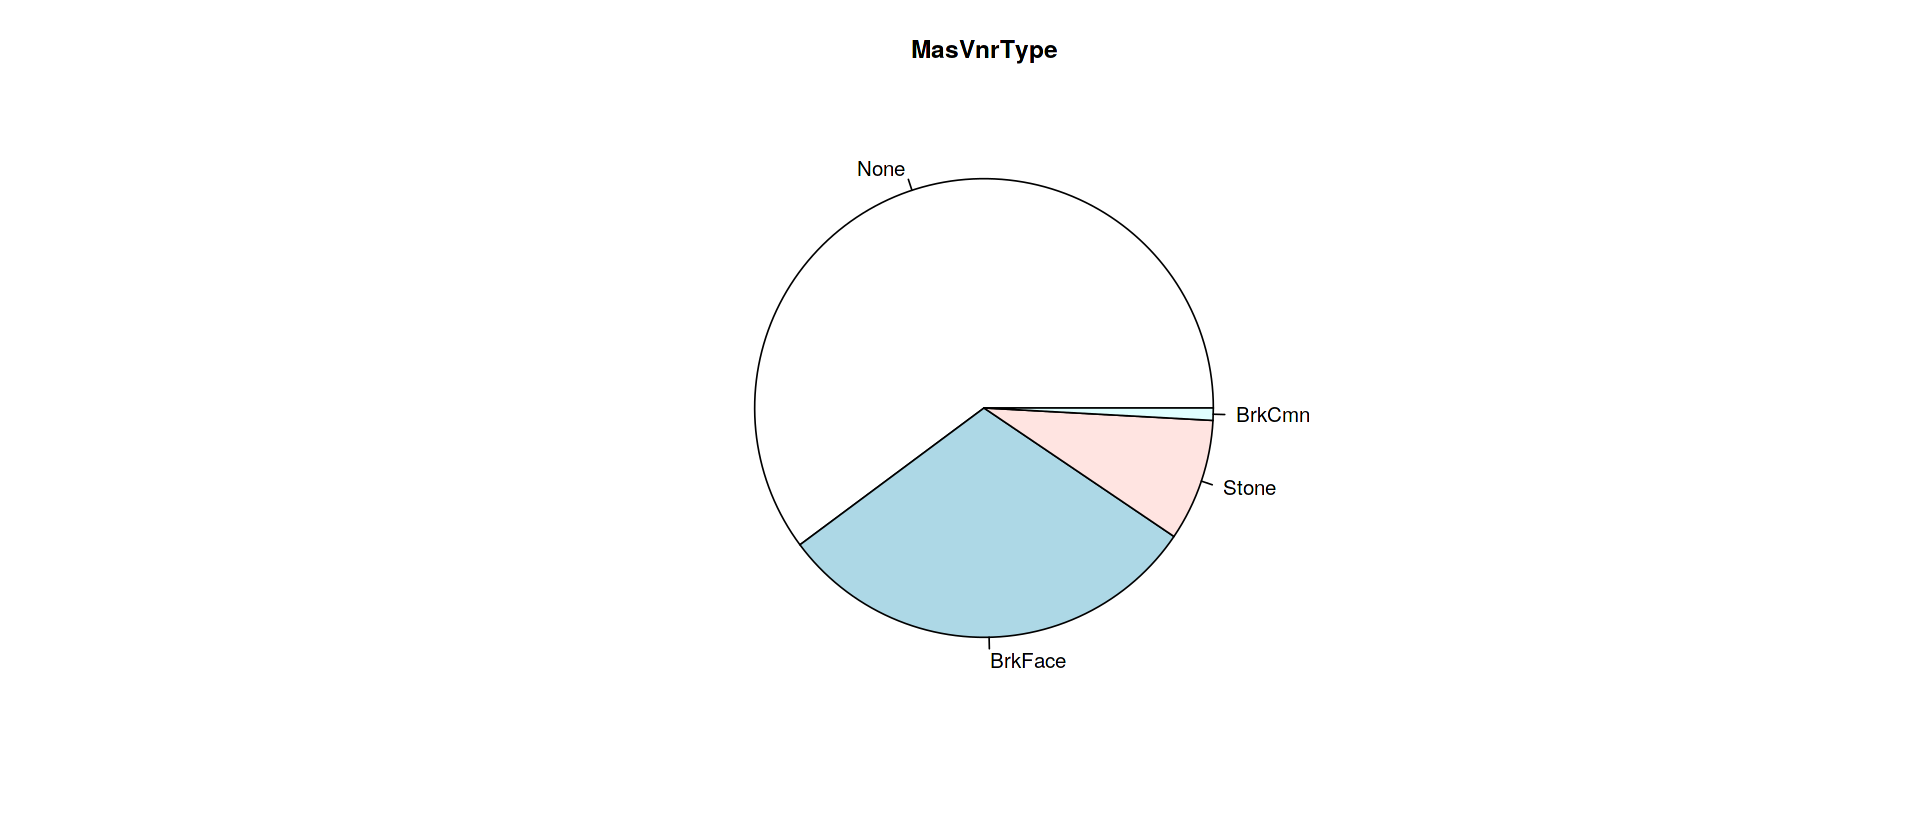

In [33]:
for(i in 1:(length(qualVarsM))){
    pie(prop.table(sort(table(dataMe[qualVarsM][,i]),decreasing = TRUE)) 
        ,main=names(dataMe[qualVarsM])[i])
    options(repr.plot.width = 16, repr.plot.height = 7)
}

In [34]:
library(corrplot)

corrplot 0.84 loaded



## Statistique bivariée

In [35]:
library(RColorBrewer)

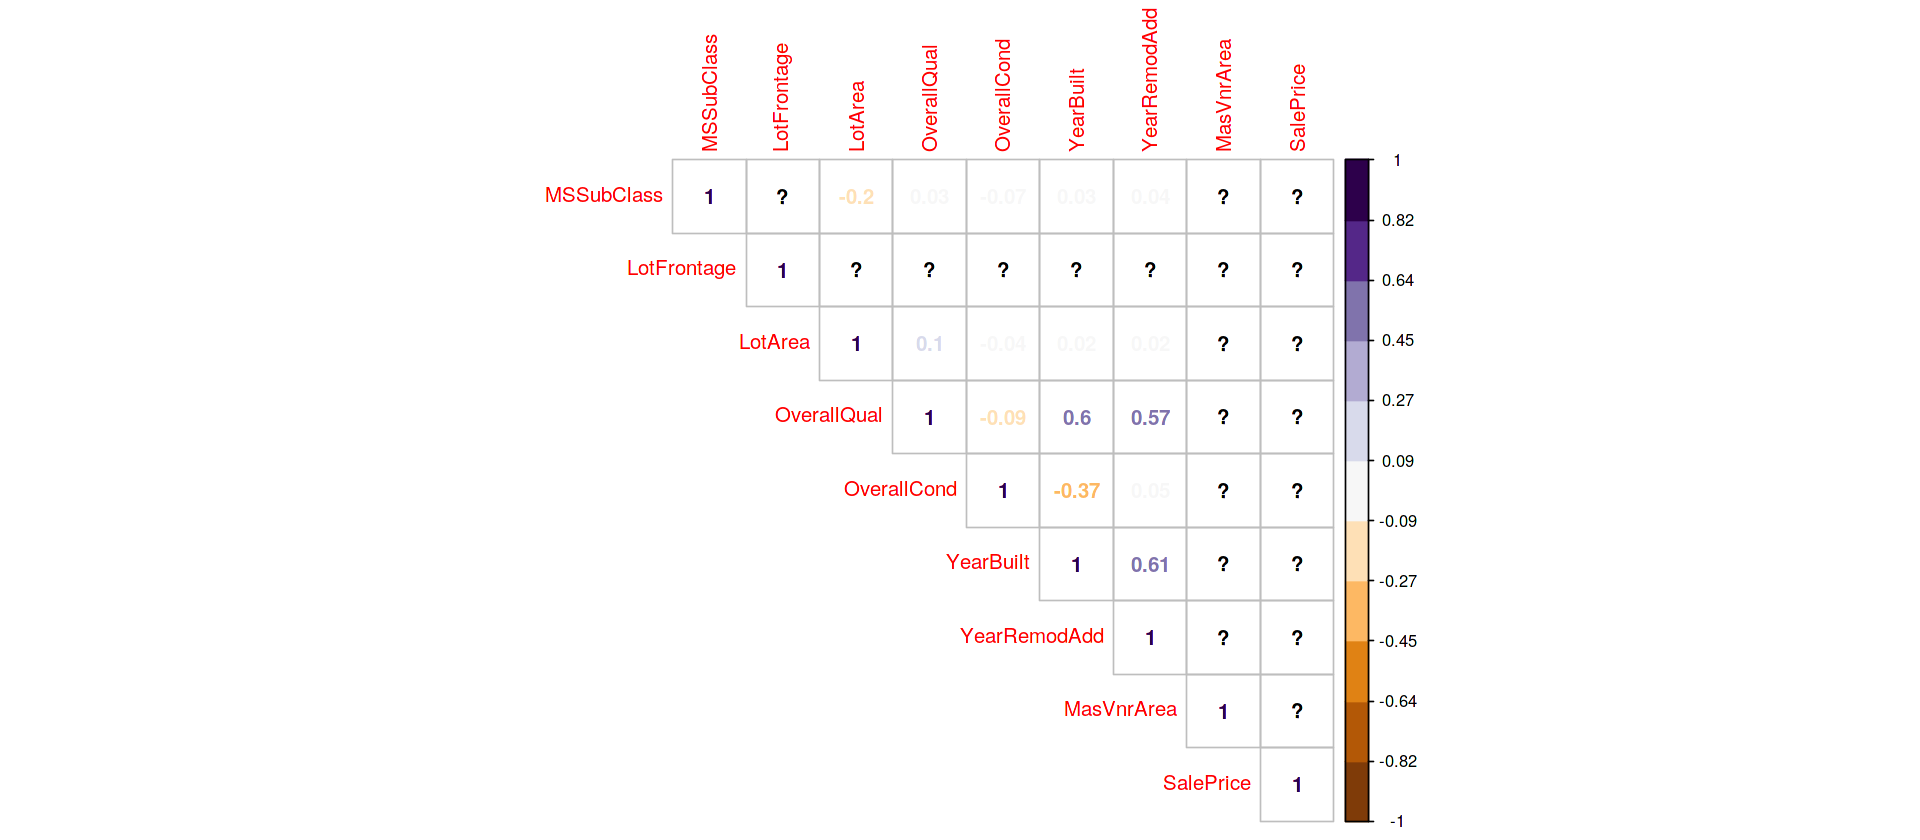

In [36]:
M <- cor(dataMe[, numericVarsM])
corrplot(M, method = "number", type="upper", col=brewer.pal(n=11, name="PuOr"))

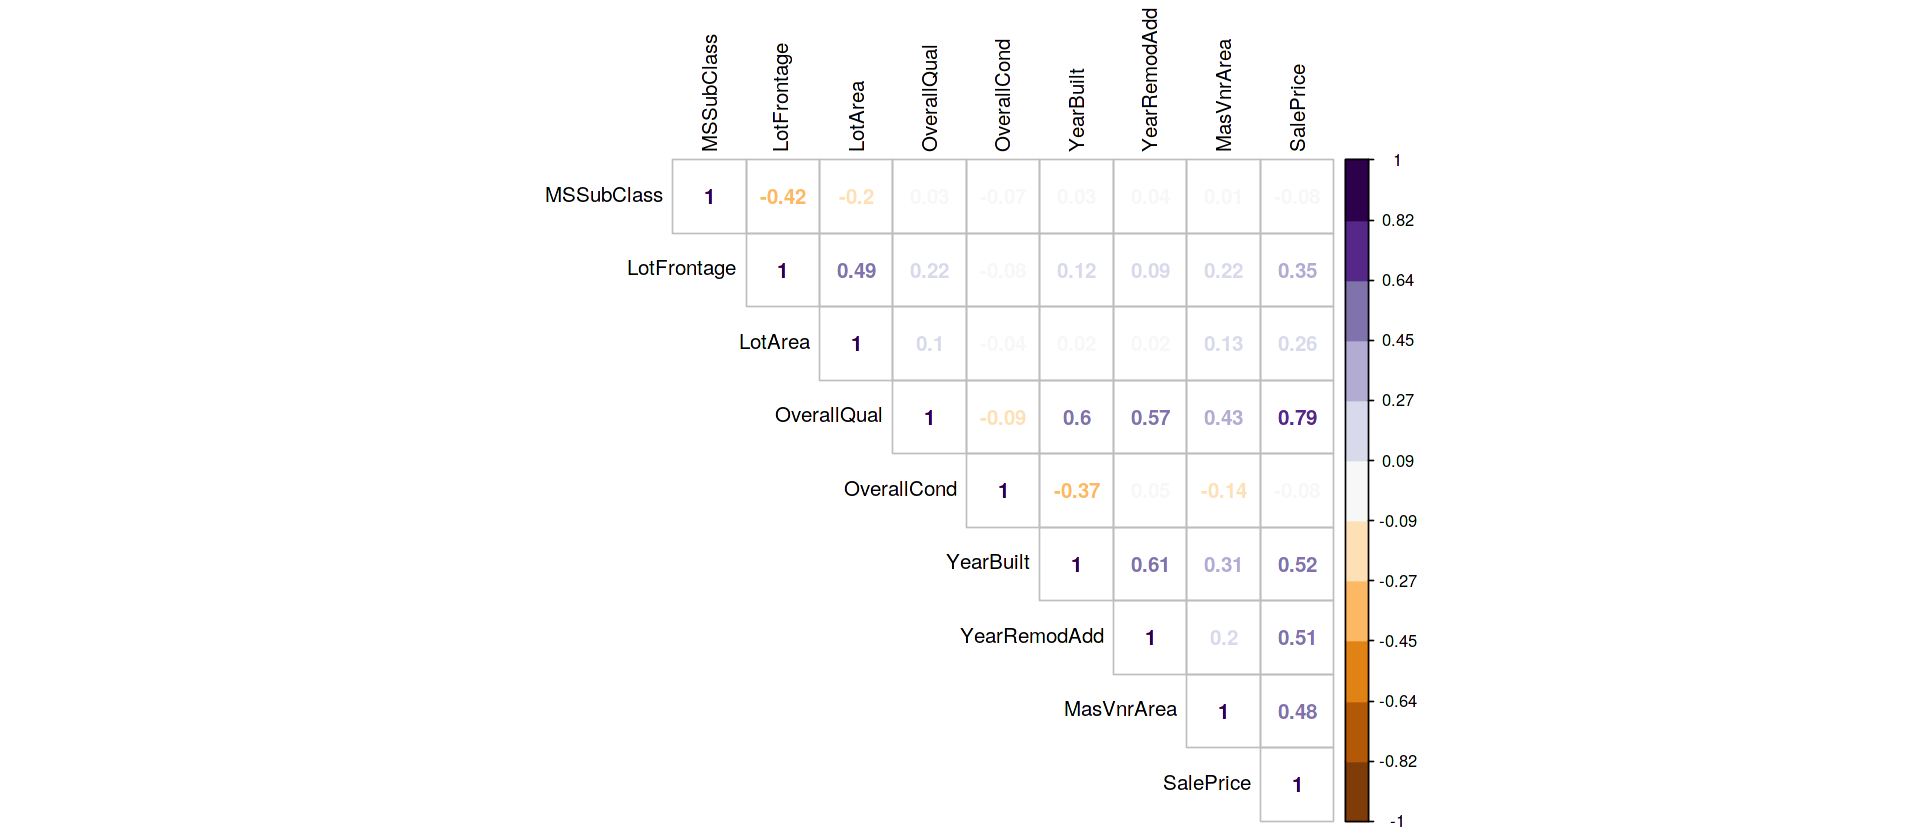

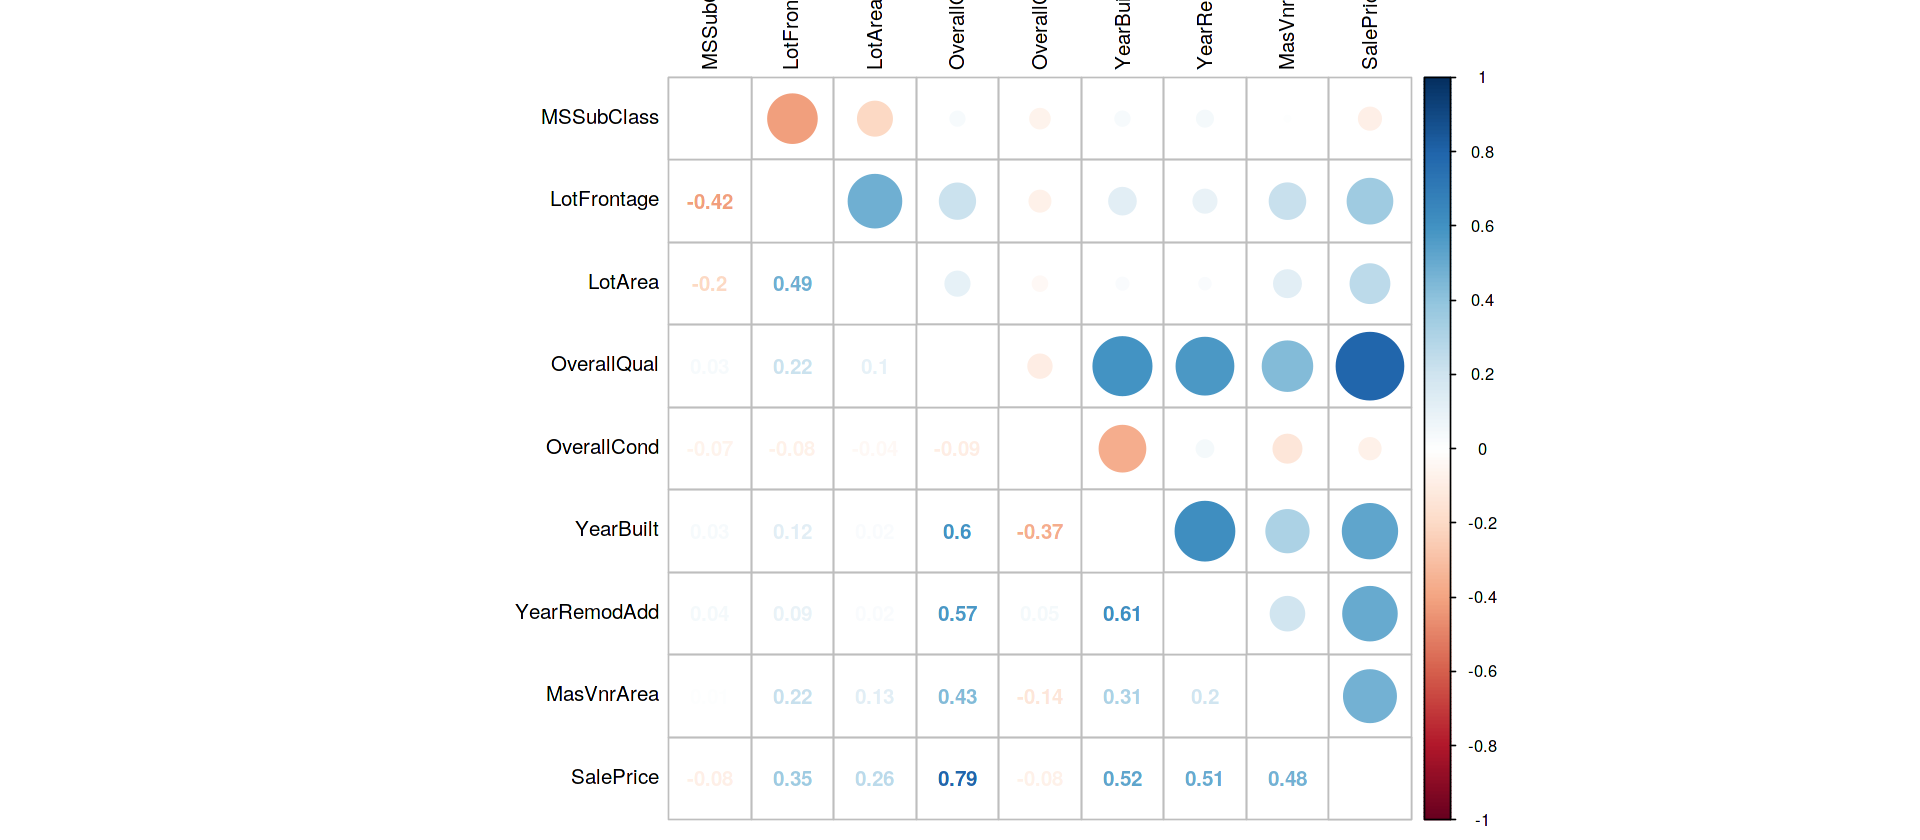

In [37]:
dataMeNum <- dataMe[, numericVarsM]
cor <- cor(dataMeNum, use="pairwise.complete.obs") #corrélations de toutes les variables
corrplot(cor, method = "number", type="upper", tl.col="black", col=brewer.pal(n=11, name="PuOr"))
corrplot.mixed(cor, tl.col="black", tl.pos = "lt")

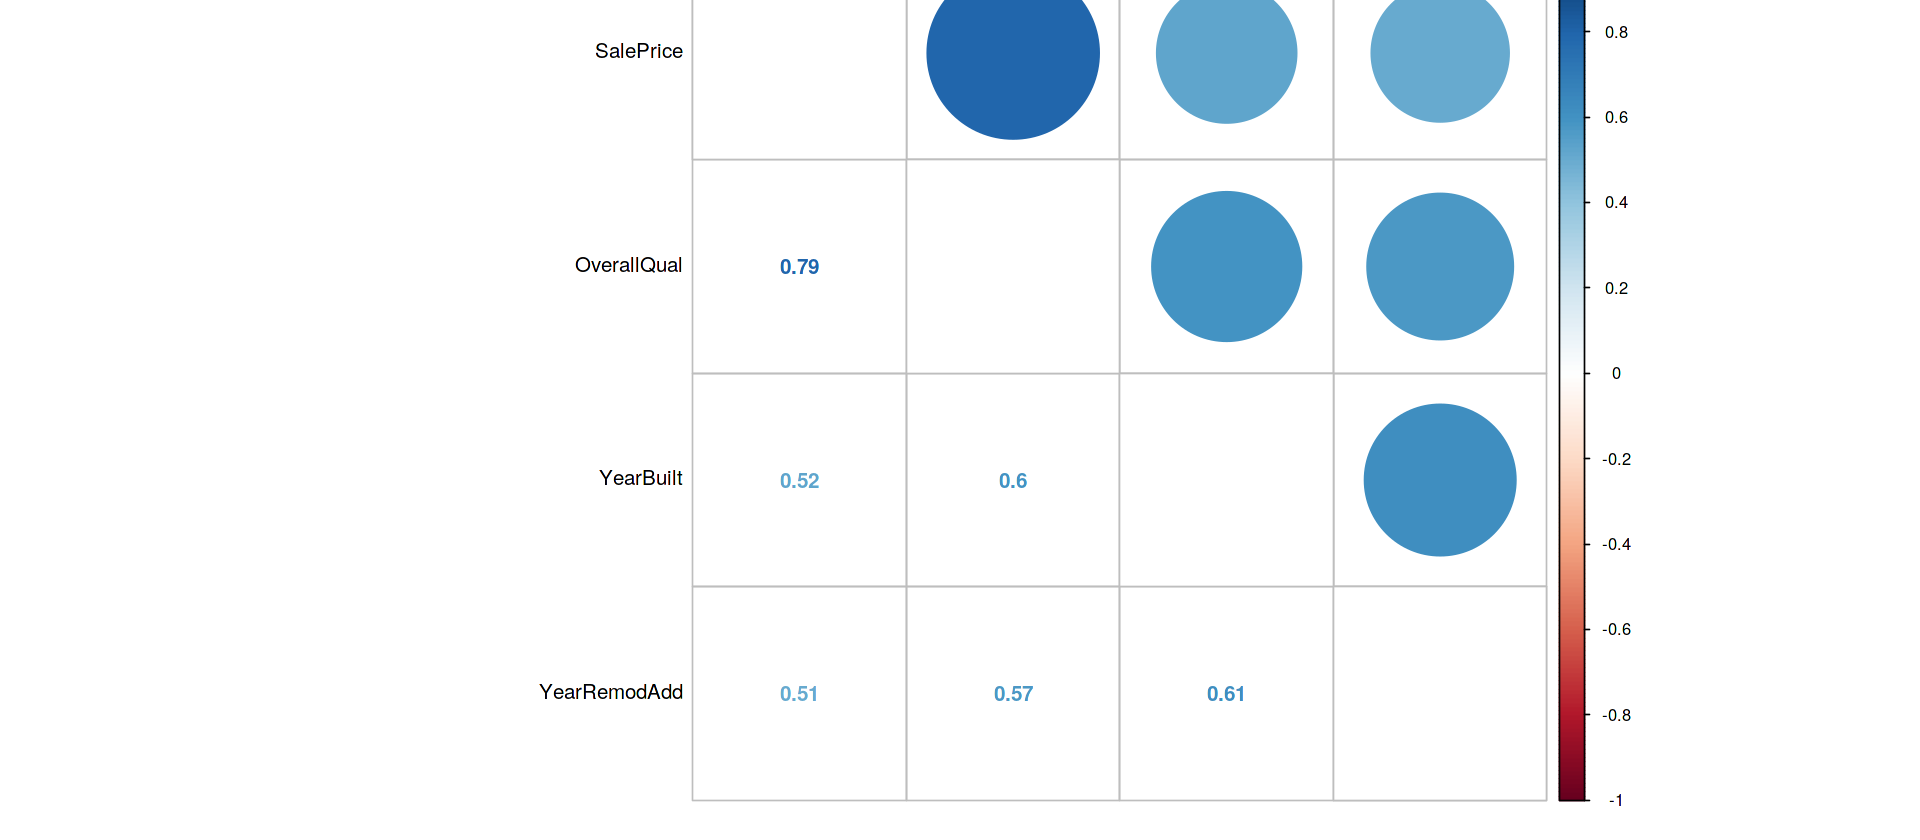

In [38]:
#tri par ordre décroissante des corrélations avec SalePrice
cor_sorted <- as.matrix(sort(cor[,'SalePrice'], decreasing = TRUE))

#sélection uniquement des corrélations élevées (>0.5)
CorHigh <- names(which(apply(cor_sorted, 1, function(x) abs(x)>0.5)))
cor_numVar <- cor[CorHigh, CorHigh]

#options(repr.plot.height = 5)
corrplot.mixed(cor_numVar, tl.col="black", tl.pos = "lt")

La variable OverallQual a une forte corrélation avec SalePrice. Cete variable note la qualité de tous les matériaux utilisés sur la maison sur une échalle de 1 à 10 (10 étant la meilleure qualité).

### OverallQuality

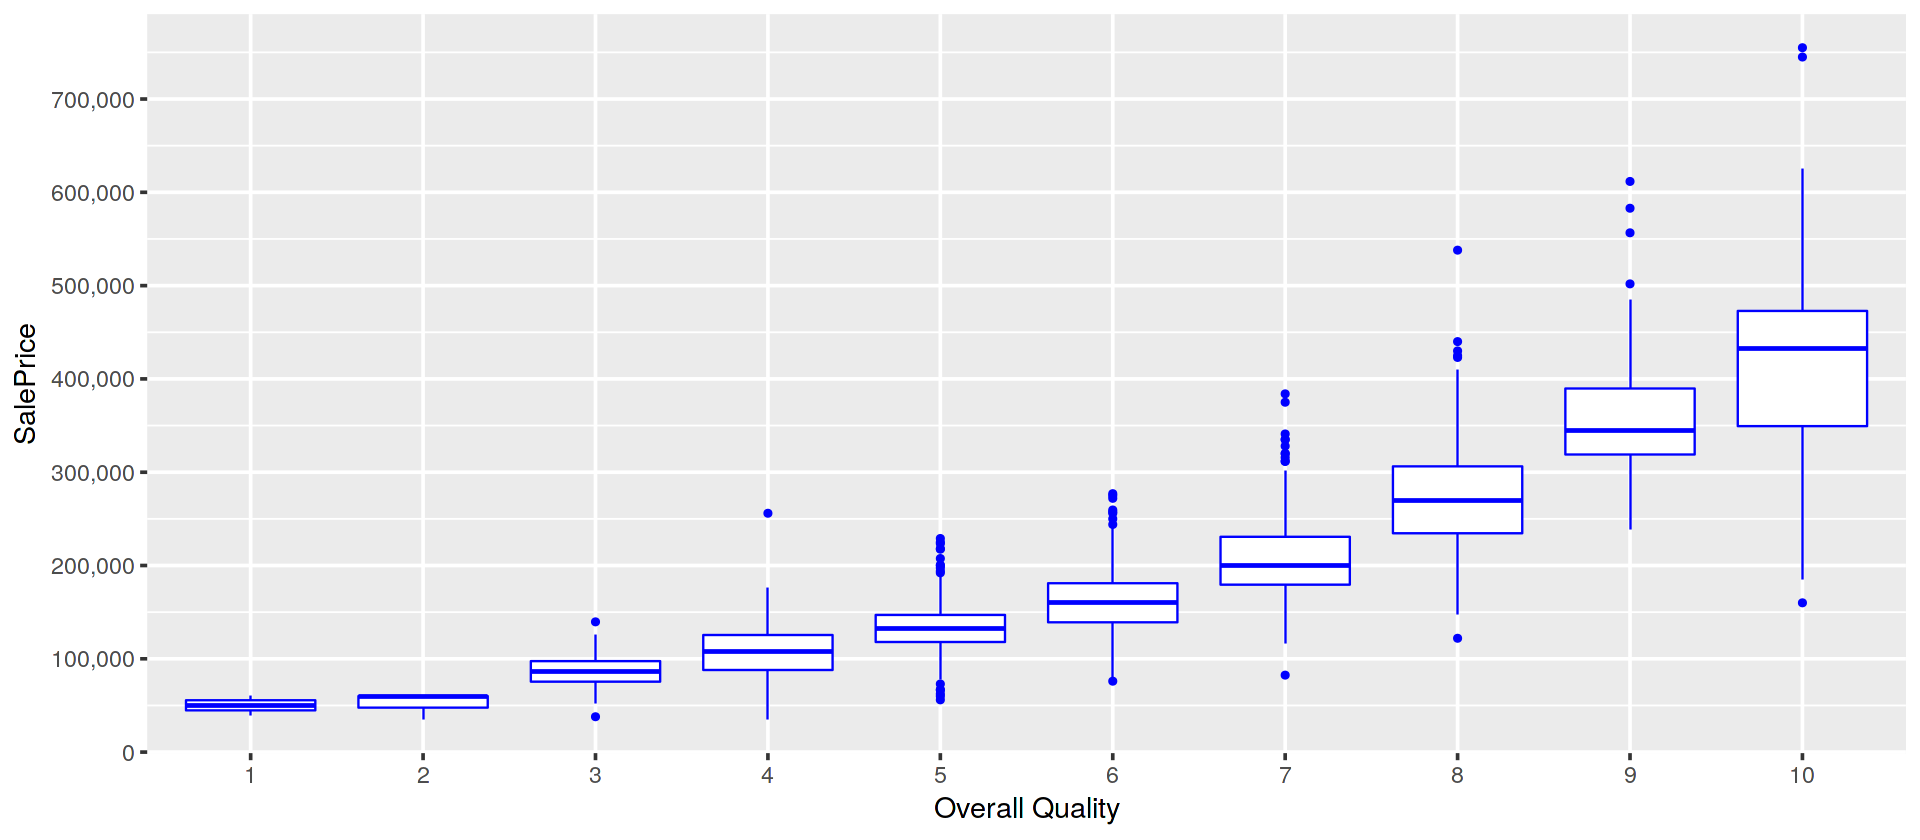

In [39]:
ggplot(data=dataMe[!is.na(dataMe$SalePrice),], aes(x=factor(OverallQual), y=SalePrice))+
        geom_boxplot(col='blue') + labs(x='Overall Quality') +
        scale_y_continuous(breaks= seq(0, 800000, by=100000), labels = scales::comma)

On remarque plus la qualité des matériaux est excellente plus le prix des maisons est élevé, ce qui est cohérent avec la corrélation vu précédemment. A priori, il n'ya pas de données extrêmes. Concernant les valeurs aberrantes, il serait peut-être intéressant de regarder la maison au prix élevé de qualité (OverallQuality) 4 

Warning message:
“Ignoring unknown parameters: fun.y”
No summary function supplied, defaulting to `mean_se()`



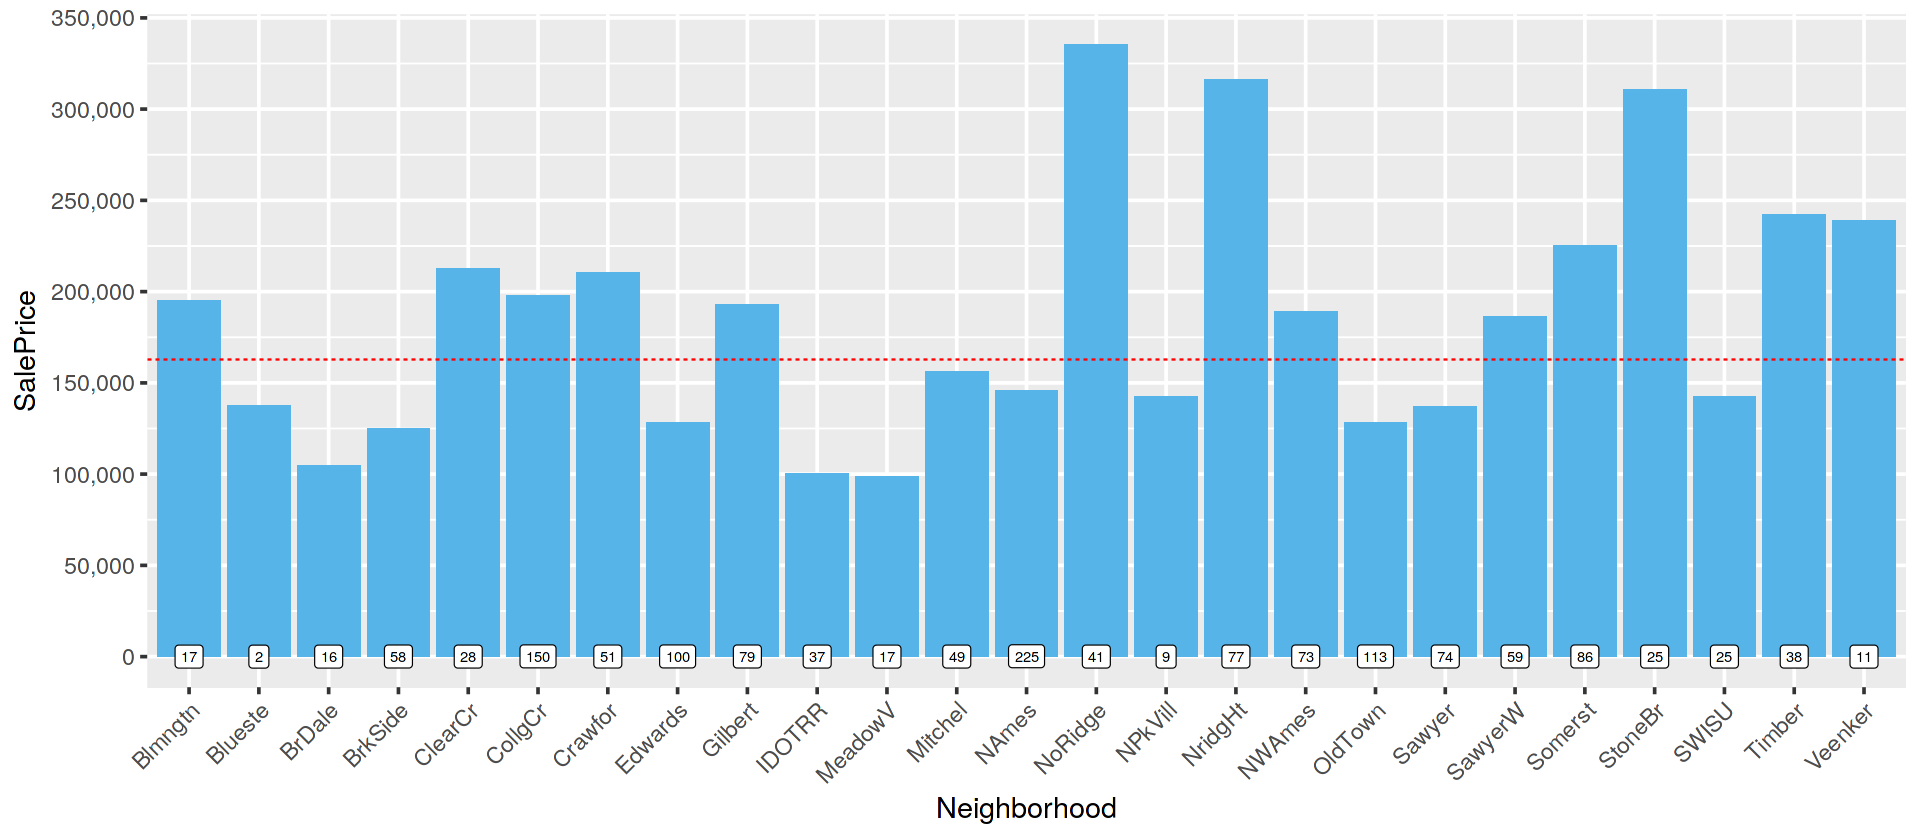

In [40]:
ggplot(dataMe[!is.na(dataMe$SalePrice),], aes(x=Neighborhood, y=SalePrice)) +
    geom_bar(stat='summary', fun.y = "median", fill='#56B4E9') +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    scale_y_continuous(breaks= seq(0, 800000, by=50000), labels = scales::comma) +
    geom_label(stat = "count", aes(label = ..count.., y = ..count..), size=3) +
    geom_hline(yintercept=163000, linetype="dashed", color = "red") #Valeur médiane de SalePrice